# Project - Travel Package Purchase Prediction
---

## Context:

- "Visit with us" is a tourism company and the Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One of the ways to expand the customer base is to introduce a new offering of packages.

- Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

- The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. This time company wants to harness the available data of existing and potential customers to target the right customers.

## Objective:

- The objective is to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

- Following are the Key questions to be solved: 

    1. To predict whether a liability customer will buy a personal loan or not.
    2. Which variables are most significant.
    3. Which segment of customers should be targeted more.


## Data Information

The records contain the Customer's personal information and their travel details & patterns. It also contains Customer interaction information during their sales pitch and their learnings from those sales discussions. 

The detailed data dictionary is given below:

**Customer Details**

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

**Customer Interaction Data**

17. PitchSatisfactionScore: Sales pitch satisfaction score
18. ProductPitched: Product pitched by the salesperson
19. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
20. DurationOfPitch: Duration of the pitch by a salesperson to the customer


---

<a id="summary_home"></a>
## Table of Contents (TOC)


##### - *[Importing Packages](#import)*

##### - *[Unwrapping Customer Information](#unwrap)*
- *[Data Description](#datadesc)*

##### - *[Data Pre-Processing & Sanity Checks](#preprocess)*

##### - *[Summary of Data Analysis](#dataanalysis1)*

##### - *[EDA Analysis](#edaanalysis)*
- *[Insights from Categorical Data](#inCategory1)*
- *[Insights from Numerical Data](#inNumber1)*
- *[Univariate Analysis](#UnivariateAnalysis1)*
- *[Bivariate Analysis](#bivariate)*
    - *[Bivariate Analysis Summary](#BivariateAnalysis1)*
    - *[Categorical Data vs ProductTaken Summary](#BivariateCat)*
    - *[Numberical Data vs ProductTaken Summary](#BivariateNum)*
- *[Multivariate Analysis](#multivariate)*    

##### - *[Customer Profiling - Based on Products](#profile)*
- *[Overall observation](#profile_overall)*
- *[Basic Product Summary](#profile_basic)*
- *[Standard Product Summary](#profile_std)*
- *[Deluxe Product Summary](#profile_deluxe)*
- *[Super Deluxe Product Summary](#profile_sdeluxe)*
- *[King Product Summary](#profile_king)*

##### - *[Model Building](#model)*
- *[Model evaluation criterion](#evaluation1)*

##### - *[Bagging Technique Models](#bagging)*
- *[Bagging Models Summary](#modelbuilding1)*

##### - *[Boosting Technique Models](#boosting)*
- *[Boosting Models Summary](#modelbuilding2)*

##### - *[Stacking Technique Models](#stacking)*
- *[Stacking Models Summary](#modelbuilding3)*

##### - *[Comparison - Bagging vs Boosting vs Stacking ](#modelbuilding4)*

##### - *[Recommendations](#recommend1)*

---

<a id='unwrap'> </a>

## Importing required Packages: 
*[Click to return to TOC](#summary_home)*

---

In [1]:
# Importing the Python Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from IPython.display import Image

# Importing libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Used for Ignore warnings. When we generate the output, then we can use this ignore warning
import warnings

warnings.filterwarnings("ignore")

# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb-black
%reload_ext nb_black

# Command to tell Python to actually display the graphs
%matplotlib inline

# let's start by installing plotly
!pip install plotly

# importing plotly
import plotly.express as px


# Command to hide the 'already satisfied' warnining from displaying
%pip install keras | grep -v 'already satisfied'

# Constant for making bold text
boldText = "\033[1m"

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build Bagging model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# to build Boosting model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("mode.chained_assignment", None)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

In [2]:
# Loading Used Cars Dataset
xls = pd.ExcelFile("../Dataset/Tourism.xlsx")
df_dict = pd.read_excel(xls, "Data Dict")
df = pd.read_excel(xls, "Tourism")
# df = pd.read_excel("../Dataset/Tourism.xlsx", "")

# same random results every time
np.random.seed(1)
df.sample(n=10)

# To copy the data to another object
custData = df.copy()

<IPython.core.display.Javascript object>

---

<a id='unwrap'> </a>

## Unwrapping the Customer Information: 
*[Click to return to TOC](#summary_home)*

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

In [4]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 4888 row samples and 20 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

In [5]:
df.head(5)  # Displaying the fist 10 rows of the Dataset

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

<IPython.core.display.Javascript object>

In [6]:
df.tail(5)  # Displaying the last 10 rows of the Dataset

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

<IPython.core.display.Javascript object>

In [7]:
df.describe(include="all").T

count unique           top  freq          mean  \
CustomerID                4888.0    NaN           NaN   NaN      202443.5   
ProdTaken                 4888.0    NaN           NaN   NaN      0.188216   
Age                       4662.0    NaN           NaN   NaN     37.622265   
TypeofContact               4863      2  Self Enquiry  3444           NaN   
CityTier                  4888.0    NaN           NaN   NaN      1.654255   
DurationOfPitch           4637.0    NaN           NaN   NaN     15.490835   
Occupation                  4888      4      Salaried  2368           NaN   
Gender                      4888      3          Male  2916           NaN   
NumberOfPersonVisiting    4888.0    NaN           NaN   NaN      2.905074   
NumberOfFollowups         4843.0    NaN           NaN   NaN      3.708445   
ProductPitched              4888      5         Basic  1842           NaN   
PreferredPropertyStar     4862.0    NaN           NaN   NaN      3.581037   
MaritalStatus               4888      4       Married  2340           NaN   
NumberOfTrips             4748.0    NaN           NaN   NaN      3.236521   
Passport                  4888.0    NaN           NaN   NaN      0.290917   
PitchSatisfactionScore    4888.0    NaN           NaN   NaN      3.078151   
OwnCar                    4888.0    NaN           NaN   NaN      0.620295   
NumberOfChildrenVisiting  4822.0    NaN           NaN   NaN      1.187267   
Designation                 4888      5     Executive  1842           NaN   
MonthlyIncome             4655.0    NaN           NaN   NaN  23619.853491   

                                  std       min        25%       50%  \
CustomerID                1411.188388  200000.0  201221.75  202443.5   
ProdTaken                    0.390925       0.0        0.0       0.0   
Age                          9.316387      18.0       31.0      36.0   
TypeofContact                     NaN       NaN        NaN       NaN   
CityTier                     0.916583       1.0        1.0       1.0   
DurationOfPitch              8.519643       5.0        9.0      13.0   
Occupation                        NaN       NaN        NaN       NaN   
Gender                            NaN       NaN        NaN       NaN   
NumberOfPersonVisiting       0.724891       1.0        2.0       3.0   
NumberOfFollowups            1.002509       1.0        3.0       4.0   
ProductPitched                    NaN       NaN        NaN       NaN   
PreferredPropertyStar        0.798009       3.0        3.0       3.0   
MaritalStatus                     NaN       NaN        NaN       NaN   
NumberOfTrips                1.849019       1.0        2.0       3.0   
Passport                     0.454232       0.0        0.0       0.0   
PitchSatisfactionScore       1.365792       1.0        2.0       3.0   
OwnCar                       0.485363       0.0        0.0       1.0   
NumberOfChildrenVisiting     0.857861       0.0        1.0       1.0   
Designation                       NaN       NaN        NaN       NaN   
MonthlyIncome             5380.698361    1000.0    20346.0   22347.0   

                                75%       max  
CustomerID                203665.25  204887.0  
ProdTaken                       0.0       1.0  
Age                            44.0      61.0  
TypeofContact                   NaN       NaN  
CityTier                        3.0       3.0  
DurationOfPitch                20.0     127.0  
Occupation                      NaN       NaN  
Gender                          NaN       NaN  
NumberOfPersonVisiting          3.0       5.0  
NumberOfFollowups               4.0       6.0  
ProductPitched                  NaN       NaN  
PreferredPropertyStar           4.0       5.0  
MaritalStatus                   NaN       NaN  
NumberOfTrips                   4.0      22.0  
Passport                        1.0       1.0  
PitchSatisfactionScore          4.0       5.0  
OwnCar                          1.0       1.0  
NumberOfChildrenVisiting        

<IPython.core.display.Javascript object>

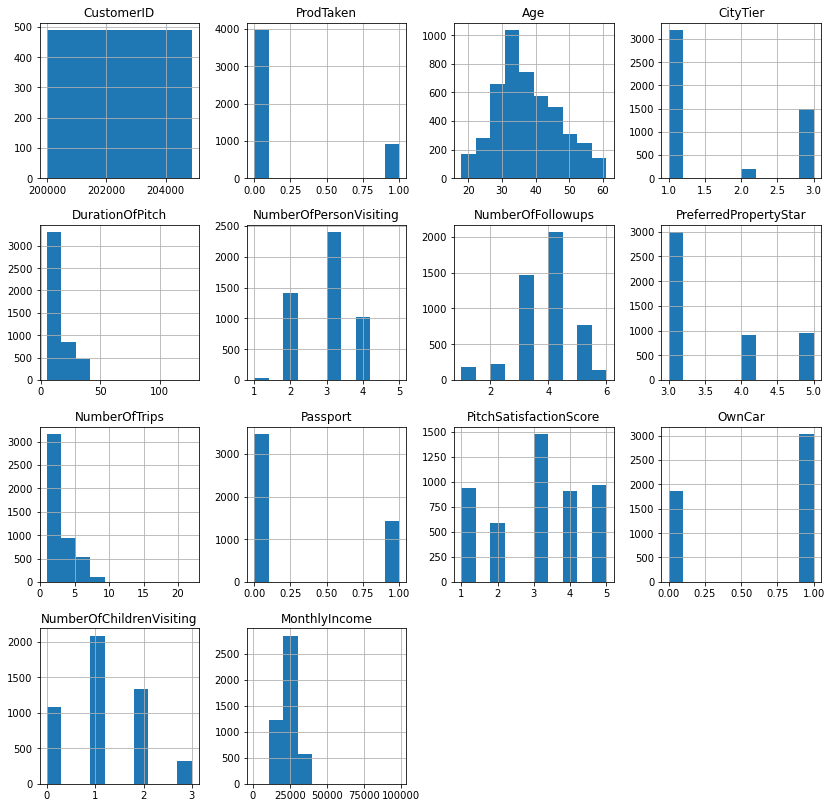

<IPython.core.display.Javascript object>

In [8]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

<a id="datadesc"> </a>

**Data Description:**  *[Click to return to TOC](#summary_home)*

* ProdTaken - There are only two unique values for Products taken, possibly as flags if the product was taken by the Customer. Mostly the products have not be taken yet. This column can be considered as a category type
* Age - 50% of the customers are at an averegae age of 37. The mean & Median are very close to each other and there are missing values that needs to be treated
* Type of Contact - There are only two unique values for Type of contacts, with 'Self Inquiry' being the most. This column can be considered as a category type and there are missing values that needs to be treated
* City Tier - 50% of the customers are part of Tier 1 cities. This column can be considered as a category type
* Duration of Pitch - On an average, 15 hours of time is being spent on the pitch discussions. There is a considerable gap in the data post 75% with some high spikes which needs to be investigated and there are missing values that needs to be treated
* Occupation - There are four different types of Occupation with 'Salaries' being the most. This column can be considered as a category type
* Gender - There are only two unique values, with 'Male'customers being the most. This column can be considered as a category type
* Number of Persons visiting - On an average, there are 3 people visiting and the median value is at 2 persons
* Number of Followups - There are 4 followups are done on an average and overall there are 6 unique values. This column can be considered as a category type and there are some missing values
* Product pitched - There are 5 types of products with Basic being the top. This can be a category type column
* Property Star - There are 3 types of star ratings with Star "3" being the top. This can be a category type column and there are few mising values
* Marital Status - There are 4 types of marital status with Star "3" being the top. This can be a category type column
* Number of Trips - On an average, 3 trips are being done. There is a considerable gap in the data post 75% with some high spikes which needs to be investigated and there are missing values that needs to be treated
* Passport, Pitch Satisfaction score & Own Car are cateogrical values and can be converted to Category type
* Number of Children visiting - There are 4 values with 1 being the top
* Designation - There are 5 types of values with 'Executive' being the most. 
* Monthly Income - On an average 23.6K is the income with peak of 98.7K. The average income is very close to the median income of the customers 


---

<a id="preprocess"> </a>

## Data Preprocessing & Sanity Checks
*[Click to return to TOC](#summary_home)*

---

#### Dropping the Customer ID Column

In [9]:
# Dropping the 'ID' columns since its not required
df.drop(["CustomerID"], axis=1, inplace=True)
print("Dropped the 'Customer ID' attribute since its not required")

Dropped the 'Customer ID' attribute since its not required


<IPython.core.display.Javascript object>

In [10]:
# Checking for duplicated rows in the dataset
duplicateSum = df.duplicated().sum()
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    df.drop_duplicates(inplace=True)
    print(
        f"- There are {str(df.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    df.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    df.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

- There are 141 duplicated row(s) in the dataset
- There are 0 duplicated row(s) in the dataset post cleaning


<IPython.core.display.Javascript object>

In [11]:
df.isnull().sum()

ProdTaken                     0
Age                         216
TypeofContact                25
CityTier                      0
DurationOfPitch             246
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            44
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               138
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     60
Designation                   0
MonthlyIncome               224
dtype: int64

<IPython.core.display.Javascript object>

* There are data missing in couple of columns which needs to be addressed

**Age**

In [12]:
df["Age"].value_counts(dropna=False)

35.0    231
36.0    223
NaN     216
34.0    203
30.0    193
32.0    190
31.0    189
37.0    182
33.0    182
29.0    177
38.0    172
41.0    150
39.0    148
40.0    143
28.0    143
42.0    137
27.0    135
43.0    125
46.0    117
45.0    110
26.0    104
44.0     99
51.0     88
47.0     87
50.0     84
25.0     73
52.0     68
49.0     65
48.0     64
53.0     64
55.0     63
54.0     59
24.0     56
56.0     55
23.0     46
22.0     46
59.0     42
21.0     41
20.0     38
19.0     32
58.0     30
57.0     28
60.0     27
18.0     14
61.0      8
Name: Age, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# Filling the default values with Median values
df["Age"].fillna(value=df["Age"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [14]:
# Defining bins for splitting the age to groups and creating a new column
bins = [10, 20, 30, 40, 50, 60, 70]
labels = [
    "Less_than_20",
    "Less_than_30",
    "Less_than_40",
    "Less_than_50",
    "Less_than_60",
    "Less_than_70",
]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["AgeGroup"] = df["AgeGroup"].astype("category")

df["AgeGroup"].value_counts(dropna=False)

Less_than_40    2129
Less_than_50    1097
Less_than_30     859
Less_than_60     581
Less_than_20      46
Less_than_70      35
Name: AgeGroup, dtype: int64

<IPython.core.display.Javascript object>

**Duration of Pitch**

In [15]:
df["DurationOfPitch"].value_counts(dropna=False)

9.0      466
7.0      334
8.0      324
6.0      299
16.0     270
15.0     262
NaN      246
14.0     245
10.0     234
13.0     213
11.0     196
12.0     187
17.0     169
30.0      90
22.0      88
31.0      80
23.0      77
18.0      73
27.0      72
25.0      72
32.0      72
26.0      71
29.0      71
21.0      70
24.0      69
35.0      65
28.0      61
20.0      61
33.0      56
19.0      55
34.0      50
36.0      41
5.0        6
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# Filling the default values with Median values
df["DurationOfPitch"].fillna(value=df["DurationOfPitch"].median(), inplace=True)

<IPython.core.display.Javascript object>

**Monthly Income**

In [17]:
df["MonthlyIncome"].value_counts(dropna=False)

NaN        224
21020.0      7
17342.0      7
21288.0      7
20855.0      7
          ... 
23463.0      1
28757.0      1
17742.0      1
20486.0      1
21471.0      1
Name: MonthlyIncome, Length: 2476, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# Filling the default values with Median values
df["MonthlyIncome"].fillna(value=df["MonthlyIncome"].median(), inplace=True)

<IPython.core.display.Javascript object>

**Type of Contact**

In [19]:
df["TypeofContact"].value_counts(dropna=False)

Self Enquiry       3350
Company Invited    1372
NaN                  25
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# Filling the default values with Self Enquiry since its the most occurence in the dataset
df["TypeofContact"].fillna("Self Enquiry", inplace=True)

<IPython.core.display.Javascript object>

In [21]:
df["TypeofContact"] = df["TypeofContact"].astype("category")
df["TypeofContact"].value_counts(dropna=False)

Self Enquiry       3375
Company Invited    1372
Name: TypeofContact, dtype: int64

<IPython.core.display.Javascript object>

**Number of Followups**

In [22]:
df["NumberOfFollowups"].value_counts(dropna=False)

4.0    1999
3.0    1421
5.0     745
2.0     228
1.0     175
6.0     135
NaN      44
Name: NumberOfFollowups, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
# Filling the default values with Median values
df["NumberOfFollowups"].fillna(value=df["NumberOfFollowups"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [24]:
# df["NumberOfFollowups"] = df["NumberOfFollowups"].astype("category")
df["NumberOfFollowups"].value_counts(dropna=False)

4.0    2043
3.0    1421
5.0     745
2.0     228
1.0     175
6.0     135
Name: NumberOfFollowups, dtype: int64

<IPython.core.display.Javascript object>

**Prefferred Property Star**

In [25]:
df["PreferredPropertyStar"].value_counts(dropna=False)

3.0    2905
5.0     938
4.0     878
NaN      26
Name: PreferredPropertyStar, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
# Filling the default values with Median values
df["PreferredPropertyStar"].fillna(
    value=df["PreferredPropertyStar"].median(), inplace=True
)

<IPython.core.display.Javascript object>

In [27]:
# df["PreferredPropertyStar"] = df["PreferredPropertyStar"].astype("category")
df["PreferredPropertyStar"].value_counts(dropna=False)

3.0    2931
5.0     938
4.0     878
Name: PreferredPropertyStar, dtype: int64

<IPython.core.display.Javascript object>

**Number of Trips**

In [28]:
df["NumberOfTrips"].value_counts(dropna=False)

2.0     1422
3.0     1051
1.0      601
4.0      468
5.0      443
6.0      307
7.0      211
NaN      138
8.0      102
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
# Filling the default values with Median values
df["NumberOfTrips"].fillna(value=df["NumberOfTrips"].median(), inplace=True)

<IPython.core.display.Javascript object>

In [30]:
df["NumberOfTrips"].value_counts(dropna=False)

2.0     1422
3.0     1189
1.0      601
4.0      468
5.0      443
6.0      307
7.0      211
8.0      102
19.0       1
21.0       1
20.0       1
22.0       1
Name: NumberOfTrips, dtype: int64

<IPython.core.display.Javascript object>

**Number of Children Visiting**

In [31]:
df["NumberOfChildrenVisiting"].value_counts(dropna=False)

1.0    2014
2.0    1304
0.0    1045
3.0     324
NaN      60
Name: NumberOfChildrenVisiting, dtype: int64

<IPython.core.display.Javascript object>

In [32]:
# Filling the default values with Median values
df["NumberOfChildrenVisiting"].fillna(
    value=df["NumberOfChildrenVisiting"].median(), inplace=True
)

<IPython.core.display.Javascript object>

In [33]:
df["NumberOfChildrenVisiting"].value_counts(dropna=False)

1.0    2074
2.0    1304
0.0    1045
3.0     324
Name: NumberOfChildrenVisiting, dtype: int64

<IPython.core.display.Javascript object>

**Gender**

In [34]:
df["Gender"].value_counts(dropna=False)

Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
# Correcting the data with incorrect text to "Female"
df["Gender"] = df["Gender"].str.replace("Fe Male", "Female")

<IPython.core.display.Javascript object>

In [36]:
df["Gender"] = df["Gender"].astype("category")
df["Gender"].value_counts(dropna=False)

Male      2835
Female    1912
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

**Converting columns that has Categorical values to a category type**

In [37]:
# Converting columns that has Categorical variables to a Category type.
df["Occupation"] = df["Occupation"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["ProductPitched"] = df["ProductPitched"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")
df["Designation"] = df["Designation"].astype("category")

<IPython.core.display.Javascript object>

In [38]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
AgeGroup                    0
dtype: int64

<IPython.core.display.Javascript object>

* All missing values have been addressed

In [39]:
# Checking for duplicated rows in the dataset
duplicateSum = df.duplicated().sum()
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    df.drop_duplicates(inplace=True)
    print(
        f"- There are {str(df.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    df.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    df.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

- There are no duplicated row(s) in the dataset


<IPython.core.display.Javascript object>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4747 non-null   int64   
 1   Age                       4747 non-null   float64 
 2   TypeofContact             4747 non-null   category
 3   CityTier                  4747 non-null   int64   
 4   DurationOfPitch           4747 non-null   float64 
 5   Occupation                4747 non-null   category
 6   Gender                    4747 non-null   category
 7   NumberOfPersonVisiting    4747 non-null   int64   
 8   NumberOfFollowups         4747 non-null   float64 
 9   ProductPitched            4747 non-null   category
 10  PreferredPropertyStar     4747 non-null   float64 
 11  MaritalStatus             4747 non-null   category
 12  NumberOfTrips             4747 non-null   float64 
 13  Passport                  4747 non-null   int64 

<IPython.core.display.Javascript object>

In [41]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 4747 row samples and 20 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

In [42]:
category_columnNames = df.describe(include=["category"]).columns
category_columnNames

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation', 'AgeGroup'],
      dtype='object')

<IPython.core.display.Javascript object>

In [43]:
number_columnNames = (
    df.describe(include=["int64"]).columns.tolist()
    + df.describe(include=["float64"]).columns.tolist()
)
number_columnNames

['ProdTaken',
 'CityTier',
 'NumberOfPersonVisiting',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

<IPython.core.display.Javascript object>

In [44]:
catnumber_cols = df[
    [
        "CityTier",
        "NumberOfPersonVisiting",
        "Passport",
        "PitchSatisfactionScore",
        "OwnCar",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfChildrenVisiting",
    ]
].columns.tolist()

<IPython.core.display.Javascript object>

---

In [45]:
df.describe(include="all").T

count unique           top  freq          mean  \
ProdTaken                 4747.0    NaN           NaN   NaN      0.188329   
Age                       4747.0    NaN           NaN   NaN     37.513377   
TypeofContact               4747      2  Self Enquiry  3375           NaN   
CityTier                  4747.0    NaN           NaN   NaN      1.655151   
DurationOfPitch           4747.0    NaN           NaN   NaN     15.380872   
Occupation                  4747      4      Salaried  2293           NaN   
Gender                      4747      2          Male  2835           NaN   
NumberOfPersonVisiting    4747.0    NaN           NaN   NaN      2.911734   
NumberOfFollowups         4747.0    NaN           NaN   NaN      3.707815   
ProductPitched              4747      5         Basic  1800           NaN   
PreferredPropertyStar     4747.0    NaN           NaN   NaN      3.580156   
MaritalStatus               4747      4       Married  2279           NaN   
NumberOfTrips             4747.0    NaN           NaN   NaN      3.226459   
Passport                  4747.0    NaN           NaN   NaN      0.289657   
PitchSatisfactionScore    4747.0    NaN           NaN   NaN      3.051612   
OwnCar                    4747.0    NaN           NaN   NaN      0.617653   
NumberOfChildrenVisiting  4747.0    NaN           NaN   NaN      1.191068   
Designation                 4747      5     Executive  1800           NaN   
MonthlyIncome             4747.0    NaN           NaN   NaN  23541.308827   
AgeGroup                    4747      6  Less_than_40  2129           NaN   

                                 std     min      25%      50%      75%  \
ProdTaken                   0.391016     0.0      0.0      0.0      0.0   
Age                         9.119956    18.0     31.0     36.0     43.0   
TypeofContact                    NaN     NaN      NaN      NaN      NaN   
CityTier                    0.917416     1.0      1.0      1.0      3.0   
DurationOfPitch             8.330097     5.0      9.0     13.0     19.0   
Occupation                       NaN     NaN      NaN      NaN      NaN   
Gender                           NaN     NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.72404     1.0      2.0      3.0      3.0   
NumberOfFollowups           1.004388     1.0      3.0      4.0      4.0   
ProductPitched                   NaN     NaN      NaN      NaN      NaN   
PreferredPropertyStar       0.799316     3.0      3.0      3.0      4.0   
MaritalStatus                    NaN     NaN      NaN      NaN      NaN   
NumberOfTrips                1.82121     1.0      2.0      3.0      4.0   
Passport                    0.453651     0.0      0.0      0.0      1.0   
PitchSatisfactionScore      1.369584     1.0      2.0      3.0      4.0   
OwnCar                      0.486012     0.0      0.0      1.0      1.0   
NumberOfChildrenVisiting    0.855278     0.0      1.0      1.0      2.0   
Designation                      NaN     NaN      NaN      NaN      NaN   
MonthlyIncome             5264.00234  1000.0  20474.5  22311.0  25389.0   
AgeGroup                         NaN     NaN      NaN      NaN      NaN   

                              max  
ProdTaken                     1.0  
Age                          61.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch             127.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        5.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                22.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             98678.0  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

<a id='dataanalysis1'></a>

### Summary of Data Analysis

*[Click to return to TOC](#summary_home)*

**Data Structure:**

* Dependent variable is the ProdTaken which is of categorical data type.
* There are 4747 row samples and 20 attributes of information collected in this dataset post removing the duplicates
* There are Category(7), float64(7), int64(6) features in the dataset

**Data Cleaning:**

* Customer ID attribute is not required and the column was dropped
* The missing values in the dataset have been addressed using imputation of mean/median
* Gender values with incorrect text "Fe Male" has been updated to "Female", similar to the other type
* Some of the columns with categorical values where converted to Category type

**Data Description:**
* Only 20% of the customers have taken the product and there are 80% still to be reached
* Almost 50% of the customers are within a mean & median age of 36-37
* Almost 50% of the customers have approached through "Self Enquiry" and from teir 1 cities
* On an average 15 mins of product pitch is being done to discuss with customers to purchase a product
* The dataset contains more of Male customers and also max salaried
* Number of people visiting is within the range of 1-5 with an average mean & median of 3 persons
* On an average 4 followups are being done and mostly the "Basic" product is the one marketed for purchase
* Customers have travelled on an average 2 trips but most of them dont have passports
* The Pitch satisfaction score has an average score of 3
* Most of the Customers own a car and at Executivve designation 
* On an average, 50% of the customers have a monthly inclome of 22-23K


---

### Common Functions


In [46]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hueCol=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 7))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hueCol,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
        # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [47]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [48]:
# Creating a common function to draw a Boxplot & a Histogram for each of the analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [49]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col, lower=0.25, upper=0.75, mul=1.5):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(lower)  # 25th quantile
    Q3 = df[col].quantile(upper)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - (mul * IQR)
    Upper_Whisker = Q3 + (mul * IQR)

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list, lower=0.25, upper=0.75, mul=1.5):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c, lower, upper, mul)

    return df

<IPython.core.display.Javascript object>

---

<a id="edaanalysis"> </a>

## EDA Analysis - Analyzing respective attributes to understand the data pattern
*[Click to return to TOC](#summary_home)*

---

In [50]:
# Summary of data
df.describe(include="all").T

count unique           top  freq          mean  \
ProdTaken                 4747.0    NaN           NaN   NaN      0.188329   
Age                       4747.0    NaN           NaN   NaN     37.513377   
TypeofContact               4747      2  Self Enquiry  3375           NaN   
CityTier                  4747.0    NaN           NaN   NaN      1.655151   
DurationOfPitch           4747.0    NaN           NaN   NaN     15.380872   
Occupation                  4747      4      Salaried  2293           NaN   
Gender                      4747      2          Male  2835           NaN   
NumberOfPersonVisiting    4747.0    NaN           NaN   NaN      2.911734   
NumberOfFollowups         4747.0    NaN           NaN   NaN      3.707815   
ProductPitched              4747      5         Basic  1800           NaN   
PreferredPropertyStar     4747.0    NaN           NaN   NaN      3.580156   
MaritalStatus               4747      4       Married  2279           NaN   
NumberOfTrips             4747.0    NaN           NaN   NaN      3.226459   
Passport                  4747.0    NaN           NaN   NaN      0.289657   
PitchSatisfactionScore    4747.0    NaN           NaN   NaN      3.051612   
OwnCar                    4747.0    NaN           NaN   NaN      0.617653   
NumberOfChildrenVisiting  4747.0    NaN           NaN   NaN      1.191068   
Designation                 4747      5     Executive  1800           NaN   
MonthlyIncome             4747.0    NaN           NaN   NaN  23541.308827   
AgeGroup                    4747      6  Less_than_40  2129           NaN   

                                 std     min      25%      50%      75%  \
ProdTaken                   0.391016     0.0      0.0      0.0      0.0   
Age                         9.119956    18.0     31.0     36.0     43.0   
TypeofContact                    NaN     NaN      NaN      NaN      NaN   
CityTier                    0.917416     1.0      1.0      1.0      3.0   
DurationOfPitch             8.330097     5.0      9.0     13.0     19.0   
Occupation                       NaN     NaN      NaN      NaN      NaN   
Gender                           NaN     NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.72404     1.0      2.0      3.0      3.0   
NumberOfFollowups           1.004388     1.0      3.0      4.0      4.0   
ProductPitched                   NaN     NaN      NaN      NaN      NaN   
PreferredPropertyStar       0.799316     3.0      3.0      3.0      4.0   
MaritalStatus                    NaN     NaN      NaN      NaN      NaN   
NumberOfTrips                1.82121     1.0      2.0      3.0      4.0   
Passport                    0.453651     0.0      0.0      0.0      1.0   
PitchSatisfactionScore      1.369584     1.0      2.0      3.0      4.0   
OwnCar                      0.486012     0.0      0.0      1.0      1.0   
NumberOfChildrenVisiting    0.855278     0.0      1.0      1.0      2.0   
Designation                      NaN     NaN      NaN      NaN      NaN   
MonthlyIncome             5264.00234  1000.0  20474.5  22311.0  25389.0   
AgeGroup                         NaN     NaN      NaN      NaN      NaN   

                              max  
ProdTaken                     1.0  
Age                          61.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch             127.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        5.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                22.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             98678.0  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

#### Analyzing the count and percentage of Categorical attributes using a bar chart

Unique values in TypeofContact are :
Self Enquiry       3375
Company Invited    1372
Name: TypeofContact, dtype: int64


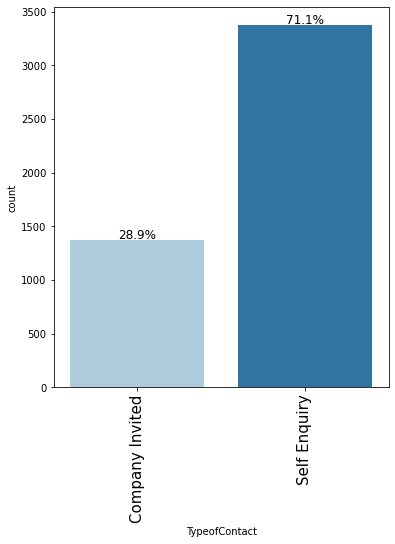

--------------------------------------------------
 
Unique values in Occupation are :
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64


<Figure size 432x288 with 0 Axes>

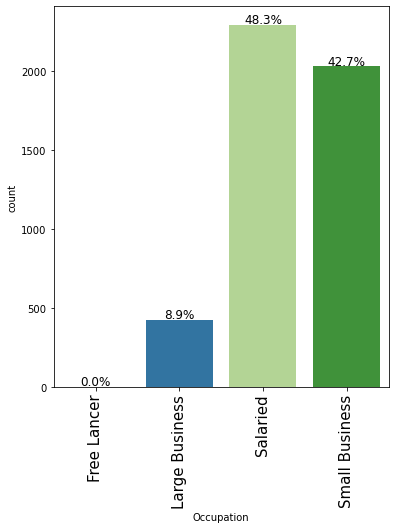

--------------------------------------------------
 
Unique values in Gender are :
Male      2835
Female    1912
Name: Gender, dtype: int64


<Figure size 432x288 with 0 Axes>

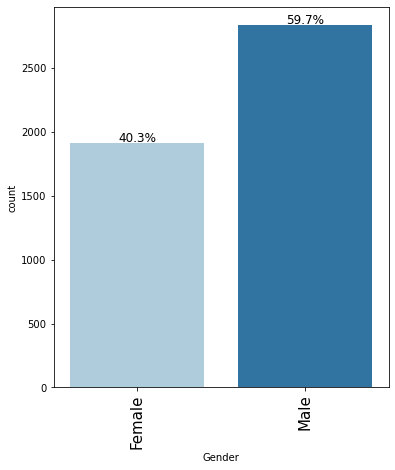

--------------------------------------------------
 
Unique values in ProductPitched are :
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64


<Figure size 432x288 with 0 Axes>

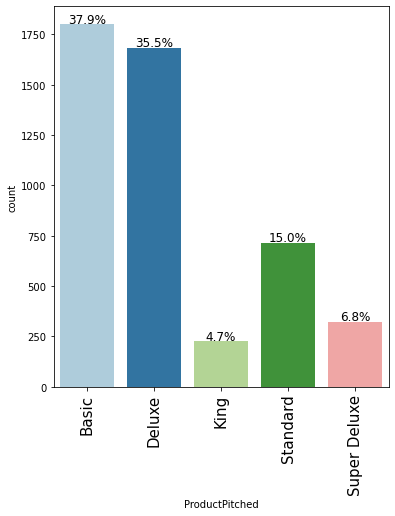

--------------------------------------------------
 
Unique values in MaritalStatus are :
Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64


<Figure size 432x288 with 0 Axes>

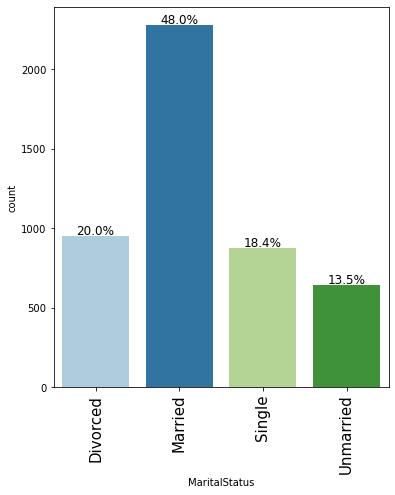

--------------------------------------------------
 
Unique values in Designation are :
Executive         1800
Manager           1684
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64


<Figure size 432x288 with 0 Axes>

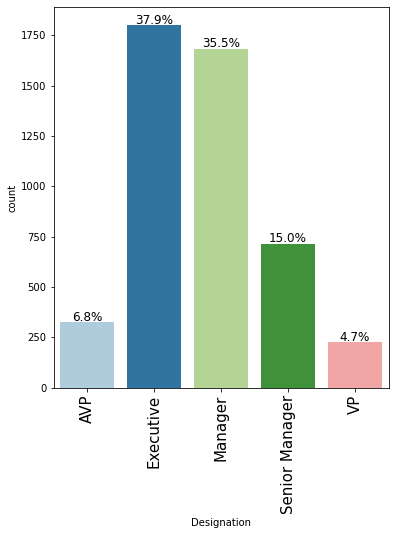

--------------------------------------------------
 
Unique values in AgeGroup are :
Less_than_40    2129
Less_than_50    1097
Less_than_30     859
Less_than_60     581
Less_than_20      46
Less_than_70      35
Name: AgeGroup, dtype: int64


<Figure size 432x288 with 0 Axes>

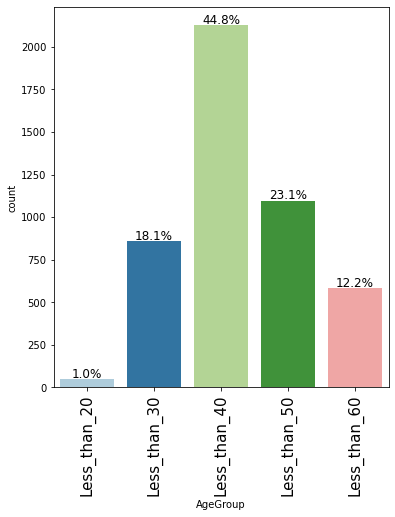

--------------------------------------------------
 


<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [51]:
# printing the number of occurrences of each unique value in each categorical column
num_to_display = 15
for column in category_columnNames:
    val_counts = df[column].value_counts(
        dropna=False
    )  # Kept dropNA to False to see the NA value count as well
    val_countsP = df[column].value_counts(dropna=False, normalize=True)
    print("Unique values in", column, "are :")
    print(val_counts[:num_to_display])
    # print(val_countsP[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    labeled_barplot(df, column, perc=True, n=5)
    plt.tight_layout()

    print("-" * 50)
    print(" ")


<a id='inCategory1'> </a>

### Insights from Categorical Data
*[Click to return to TOC](#summary_home)*


**Observations:**

* 81% of the customers have not taken the Product while 19% have purchased it
* Almost 71% of customers had approached using Self Inquiry, remaining where company initiated
* Most of them are Salaried 48% & Small Business 43% customers, followed by Large Business and Free Lancers
* 60% of them are Male customers and 40% are Female
* Basic Product (37.9%) was pitched more than the other products, followed by Deluxe, Standard, Super Deluxe & King products
* 48% of the customers are Married, followed by 20% Divorced
* 38% of the customers were Executives, 35& were Managers, 15% Senior Managers, followed by AVP & VP
* Almost 44.8% of the customers are within the range on 30-40

---

#### Analyzing the Numerical attributes using Histogram and Box Plots

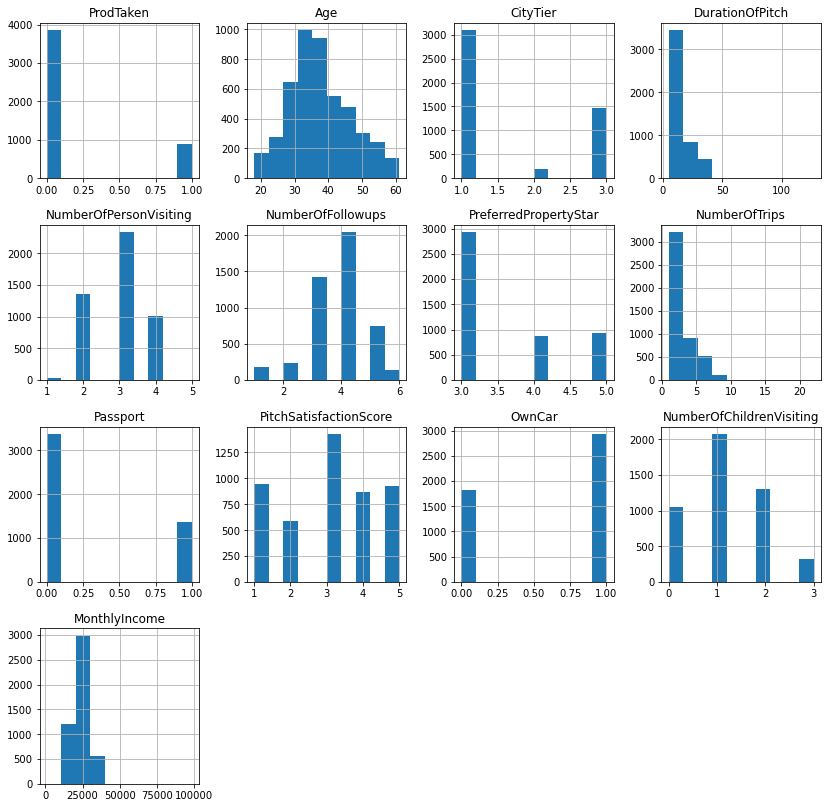

<IPython.core.display.Javascript object>

In [52]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

In [53]:
# Summary of numeric data
df.describe().T

count          mean          std     min      25%  \
ProdTaken                 4747.0      0.188329     0.391016     0.0      0.0   
Age                       4747.0     37.513377     9.119956    18.0     31.0   
CityTier                  4747.0      1.655151     0.917416     1.0      1.0   
DurationOfPitch           4747.0     15.380872     8.330097     5.0      9.0   
NumberOfPersonVisiting    4747.0      2.911734     0.724040     1.0      2.0   
NumberOfFollowups         4747.0      3.707815     1.004388     1.0      3.0   
PreferredPropertyStar     4747.0      3.580156     0.799316     3.0      3.0   
NumberOfTrips             4747.0      3.226459     1.821210     1.0      2.0   
Passport                  4747.0      0.289657     0.453651     0.0      0.0   
PitchSatisfactionScore    4747.0      3.051612     1.369584     1.0      2.0   
OwnCar                    4747.0      0.617653     0.486012     0.0      0.0   
NumberOfChildrenVisiting  4747.0      1.191068     0.855278     0.0      1.0   
MonthlyIncome             4747.0  23541.308827  5264.002340  1000.0  20474.5   

                              50%      75%      max  
ProdTaken                     0.0      0.0      1.0  
Age                          36.0     43.0     61.0  
CityTier                      1.0      3.0      3.0  
DurationOfPitch              13.0     19.0    127.0  
NumberOfPersonVisiting        3.0      3.0      5.0  
NumberOfFollowups             4.0      4.0      6.0  
PreferredPropertyStar         3.0      4.0      5.0  
NumberOfTrips                 3.0      4.0     22.0  
Passport                      0.0      1.0      1.0  
PitchSatisfactionScore        3.0      4.0      5.0  
OwnCar                        1.0      1.0      1.0  
NumberOfChildrenVisiting      1.0      2.0      3.0  
MonthlyIncome             22311.0  25389.0  98678.0

<IPython.core.display.Javascript object>

<a id='inNumber1'> </a>

### <a id='inNumber2'>Insights from Numerical Data</a>
*[Click to return to TOC](#summary_home)*


**Observations:**

* Customers are ranging from 18 to max of 61, with 50% of the customers less than 36 which is almost the average mean
* City Tier seems to have 3 values (1, 2, 3) with almost 50% of them belonging to Tier 1
* Duration of Pitch is ranging between 5 - 127. Considering the mean is 15 and almost 75% of the duration time is 19, there are possible outliers/exceptions that need to be treated
* Number of Person visiting ranges from a min of 1 to 5 max and on an average 3 people are visiting
* Almost 4 followups were done for 50% of customers with mean & median almost closer
* Preferred Property Star seems to have 3 values (3, 4, 5) which almost 50% of them belonging to score of 3
* Number of trips is from 1-22 with almost 75% of them doing only 4 trips. There are possible outliers in the data
* Passport has only 2 values - 0-No, 1-Yes with almost 50% of the customers not having a passport
* Pitch Satisfaction score seems to have a range of 1-5 with almost 50% of them having a score of 3
* OwnCar has only 2 values - 0 - No, 1-Yes with almost 50% of them owning a car
* Number of Children visiting is ranging from 1-3 with a mean of 1 children visiting
* Monthly income is ranging from 20K to 99K with mean and median almost at 23K


<a id='UnivariateAnalysis1'> </a>

### Univariate Analysis
*[Click to return to TOC](#summary_home)*


#### Aalyzing the Age of the Customers

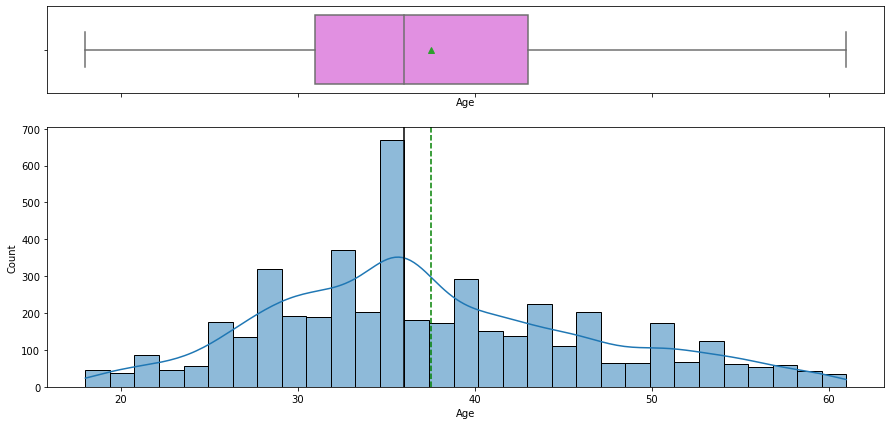

<IPython.core.display.Javascript object>

In [54]:
histogram_boxplot(df, "Age")

**Observations:**
* Age has a normal distribution with most of the Customers around the age of 20 - 60 
* The Mean & Median are closer to each other
* There are no outliers identified in this attribute

#### Analyzing the Duration of Pitch

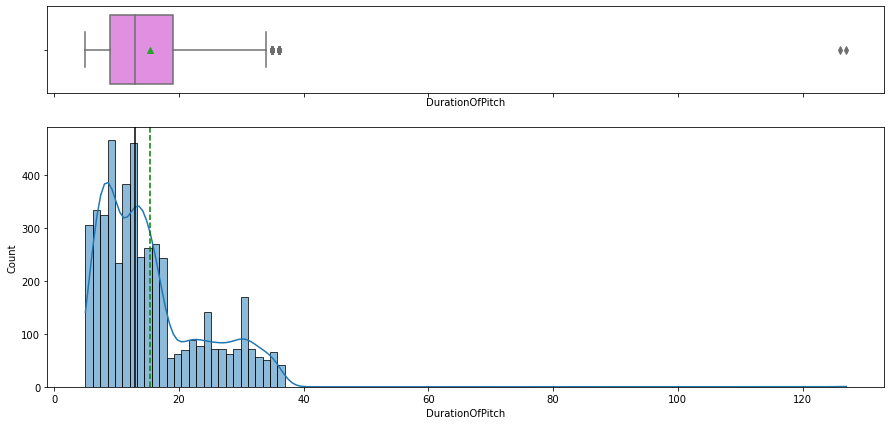

<IPython.core.display.Javascript object>

In [55]:
histogram_boxplot(df, "DurationOfPitch")

**Observations:**
* Mean & Median are almost close to each other
* It has a positive skew with outliers identified and needs to be treated
* Customers are having around 9 years to 35 years of work experience

In [56]:
df[df.DurationOfPitch > 36]["DurationOfPitch"].describe()

count      2.000000
mean     126.500000
std        0.707107
min      126.000000
25%      126.250000
50%      126.500000
75%      126.750000
max      127.000000
Name: DurationOfPitch, dtype: float64

<IPython.core.display.Javascript object>

* Considering only 2 data points are more than 36, we will drop the 2 rows

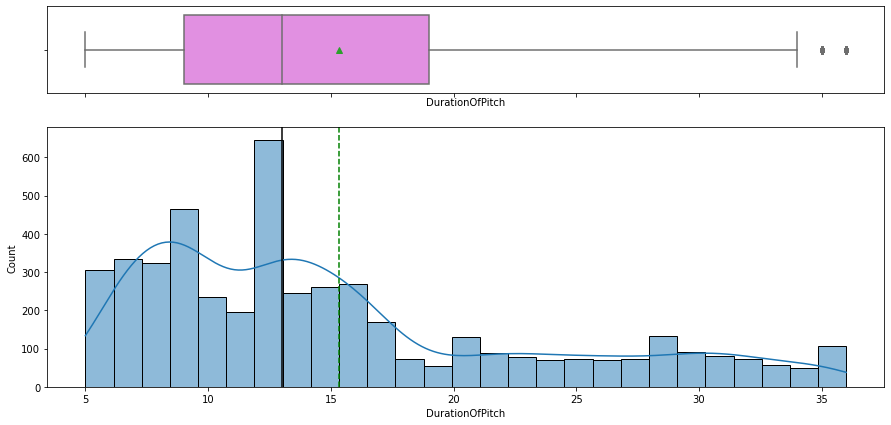

<IPython.core.display.Javascript object>

In [57]:
# Dropping the outliers that are more than the 4IQR
df.drop(df[df.DurationOfPitch > 36].index, inplace=True)
df.reset_index(drop=True, inplace=True)
histogram_boxplot(df, "DurationOfPitch")

* The Median is less than the Mean
* The dirtribution is now standardized though with a positive skew pattern
* Considering we have significant data points for the exception rows, we will consider it as a valid data point to proceed

#### Analyzing the Number of Persons Visiting 

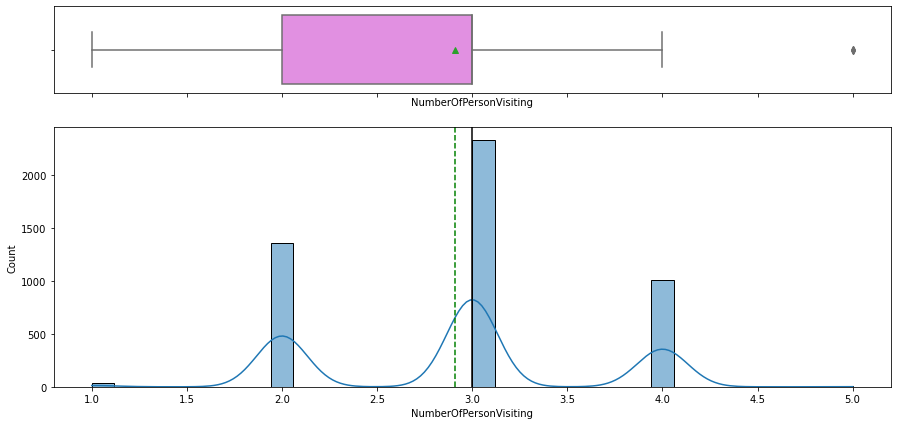

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(df, "NumberOfPersonVisiting")

In [59]:
df[df.NumberOfPersonVisiting > 4]["NumberOfPersonVisiting"].describe()

count    3.0
mean     5.0
std      0.0
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: NumberOfPersonVisiting, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
* Distribution is uniform without much outliers
* The Median is closer to the Mean

#### Analyzing the Number of Trips  

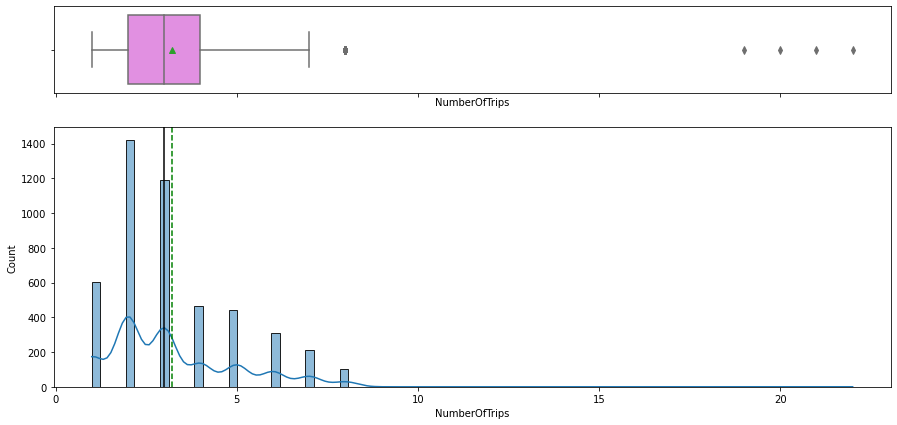

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, "NumberOfTrips")

In [61]:
df[df.NumberOfTrips > 9]["NumberOfTrips"].describe()

count     4.000000
mean     20.500000
std       1.290994
min      19.000000
25%      19.750000
50%      20.500000
75%      21.250000
max      22.000000
Name: NumberOfTrips, dtype: float64

<IPython.core.display.Javascript object>

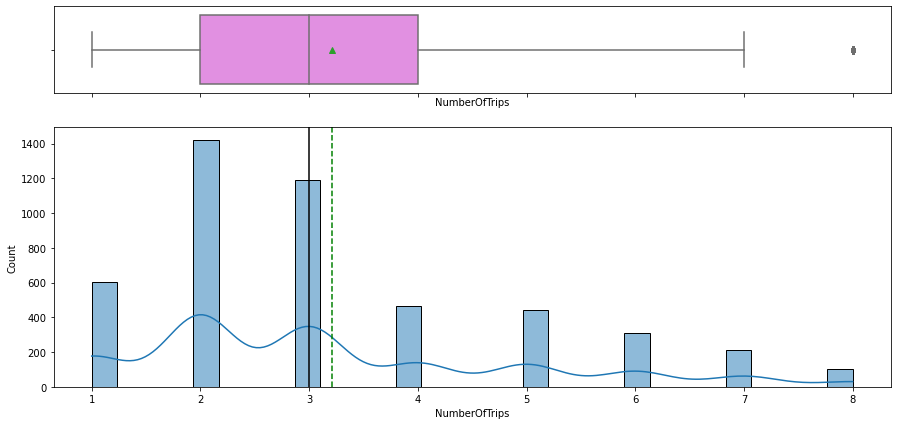

<IPython.core.display.Javascript object>

In [62]:
# Dropping the outliers that are more than the 4IQR
df.drop(df[df.NumberOfTrips > 8].index, inplace=True)
df.reset_index(drop=True, inplace=True)
histogram_boxplot(df, "NumberOfTrips")

**Observations:**
* Distribution is still positvely skewed but the extreme outliers have been addressed
* The Median is closer to the Mean

#### Analyzing the number of children visiting

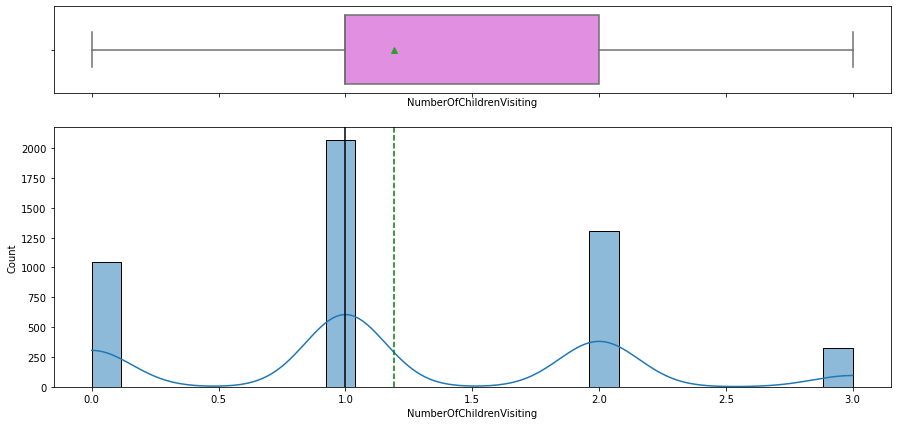

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(df, "NumberOfChildrenVisiting")

**Observations:**
* Distribution is uniform without much outliers
* The Median is lesser than the Mean value

#### Analyzing the Monthly income of the Customers

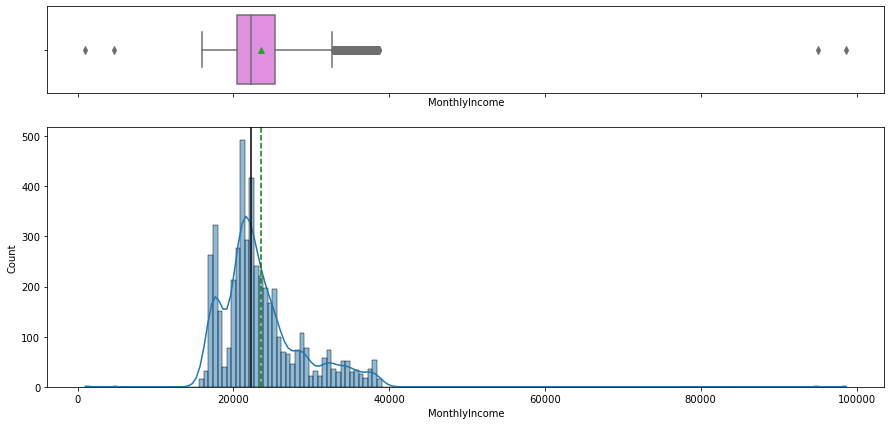

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(df, "MonthlyIncome")

**Observations:**
* The distribution seems to be highly skewed with lot of outliers

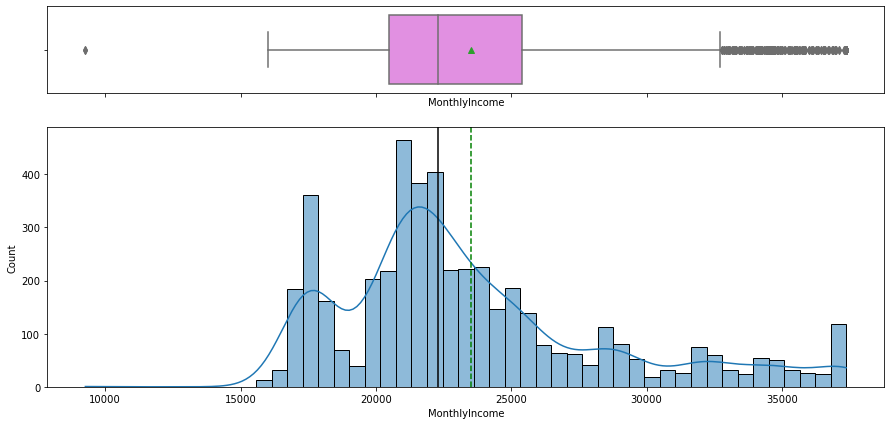

<IPython.core.display.Javascript object>

In [65]:
df = treat_outliers(df, "MonthlyIncome", 0.2, 0.8, 1.5)
histogram_boxplot(df, "MonthlyIncome")

* The Distribution is uniform now
* The outliers post trimming are in lign with the data and can be considered for the analysis

<a id="bivariate"> </a>
 
### Bivariate Analysis
*[Click to return to TOC](#summary_home)*


<AxesSubplot:>

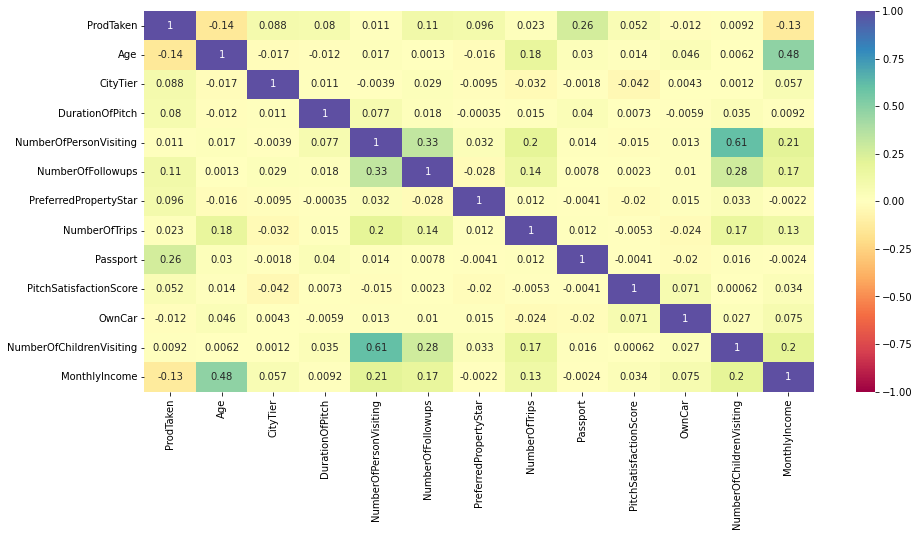

<IPython.core.display.Javascript object>

In [66]:
# Plotting Heatmap by creating a 2-D Matrix with correlation plots
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Spectral")

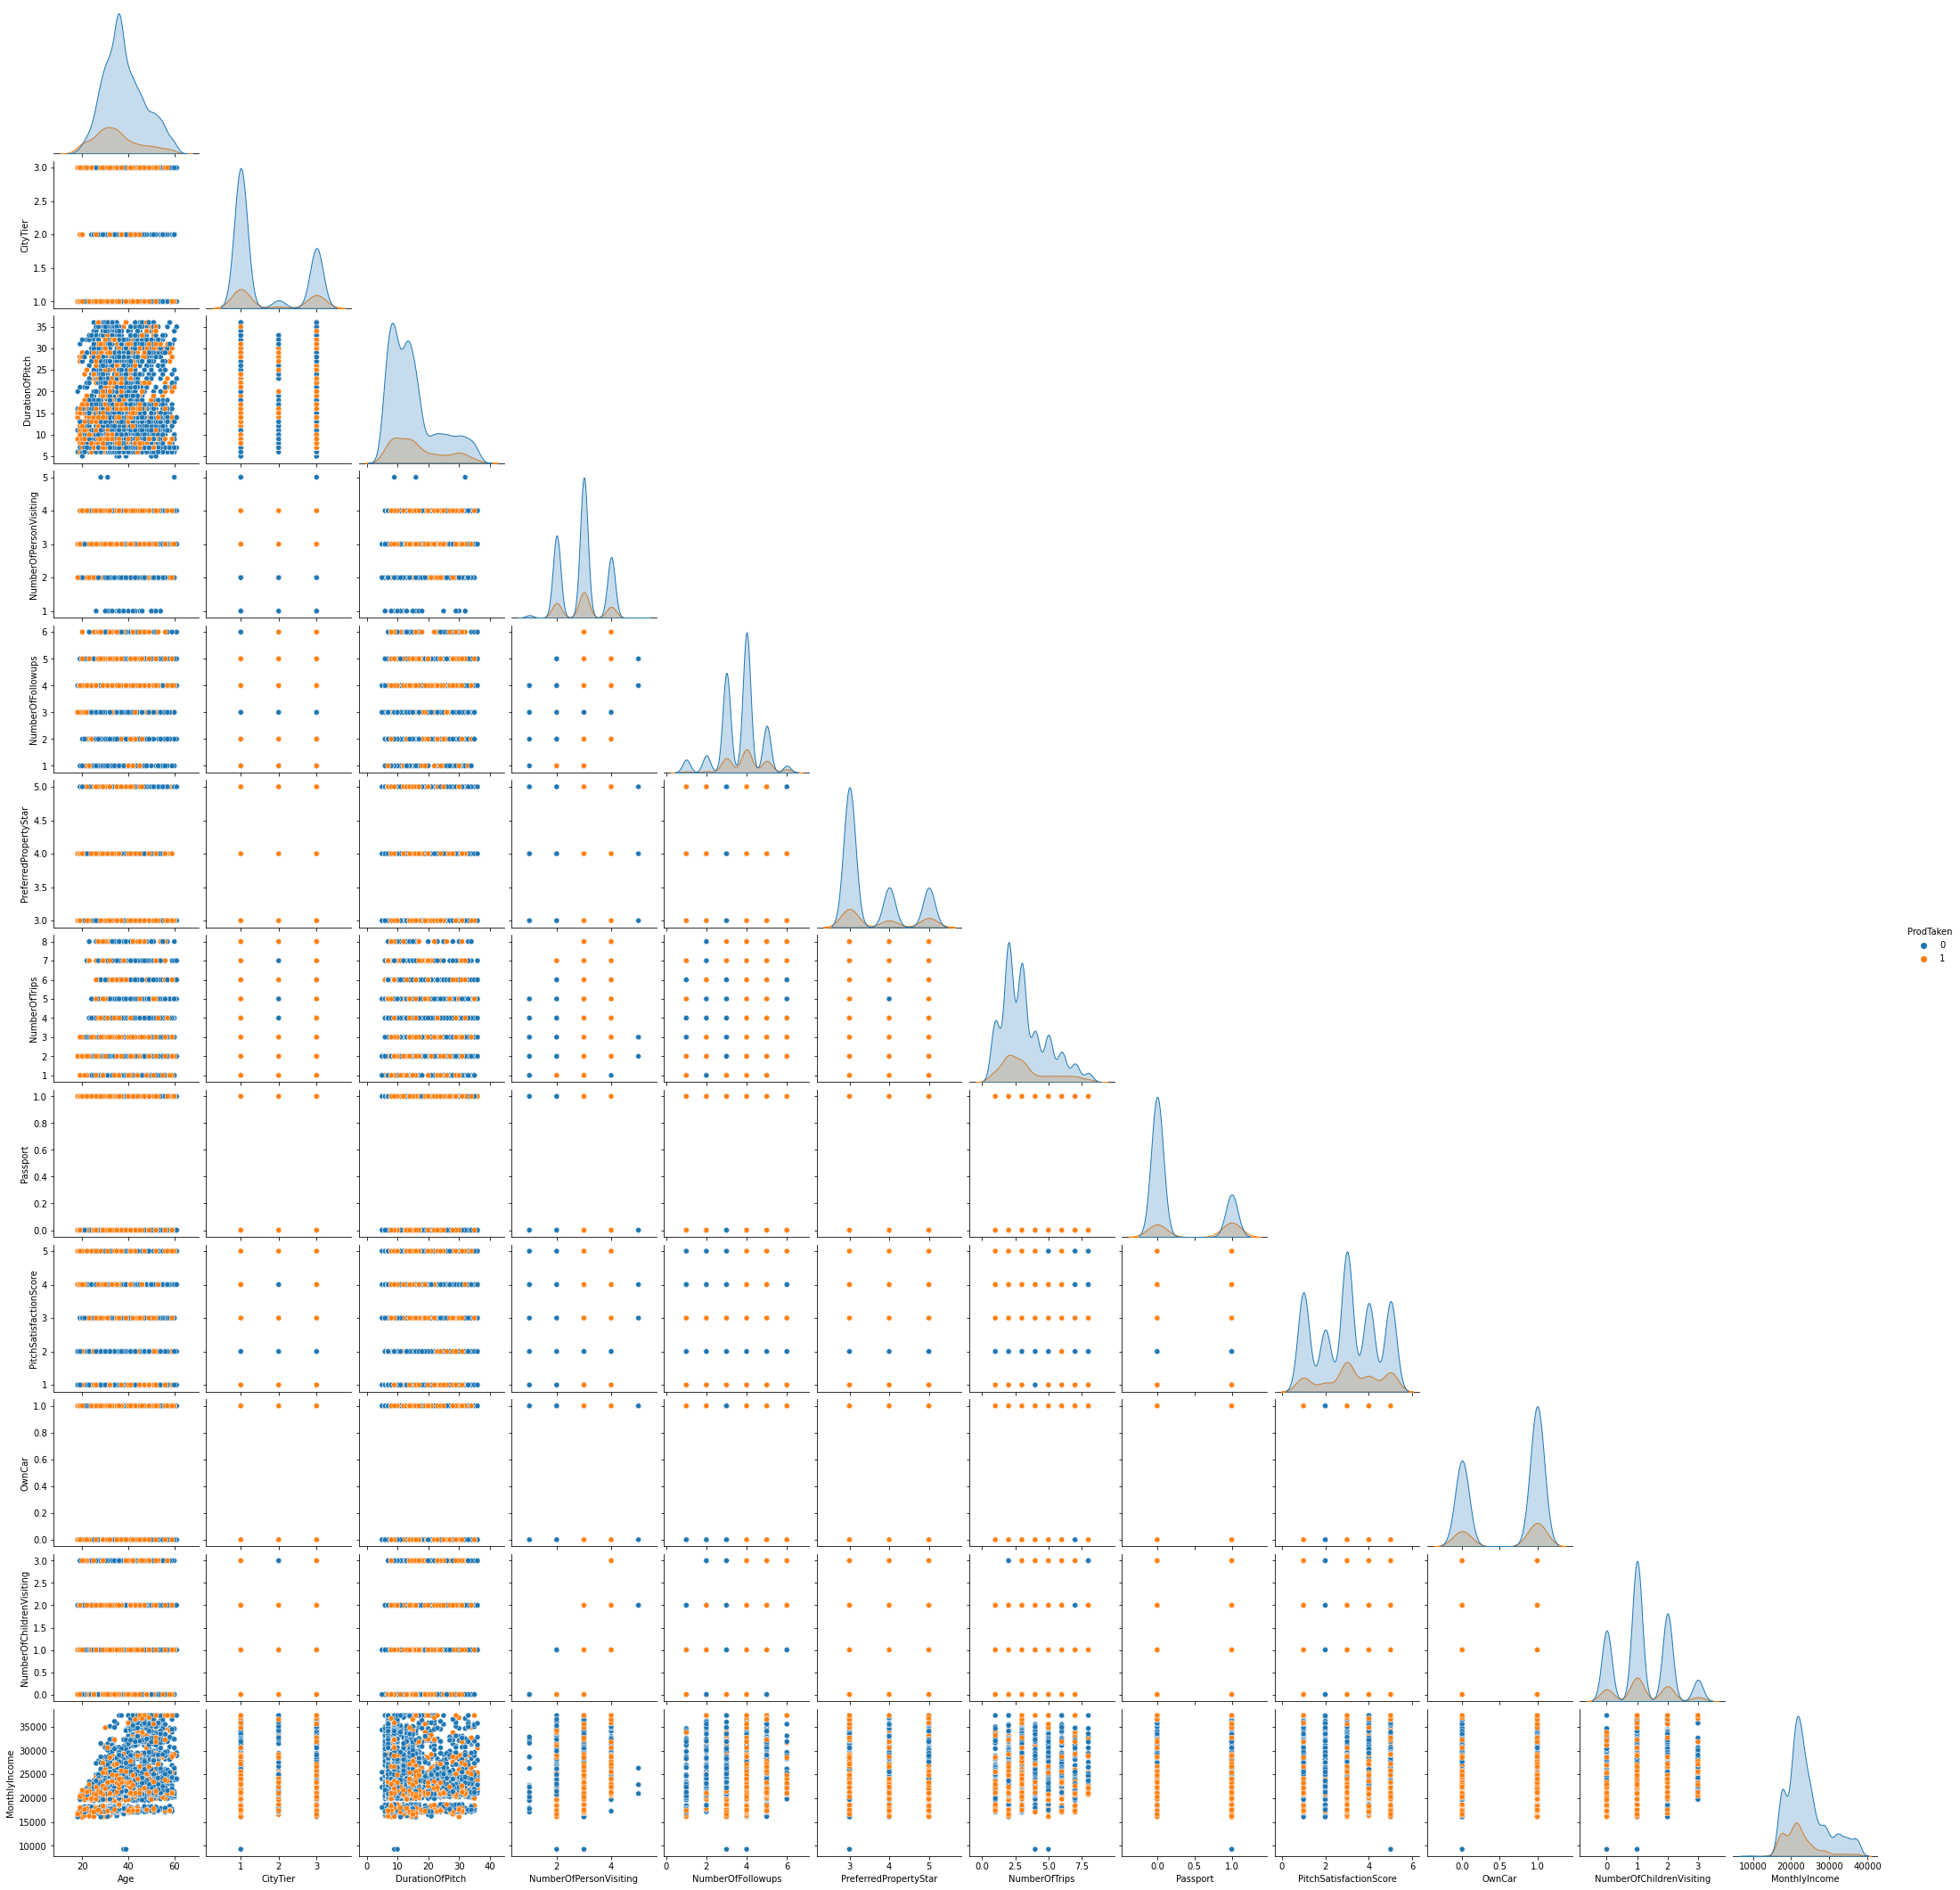

<IPython.core.display.Javascript object>

In [67]:
sns.pairplot(df, corner=True, hue="ProdTaken")

<a id='BivariateAnalysis1'></a>

**Observations:**

*[Click to return to TOC](#summary_home)*


* ProdTaken has a high correlation with Passport showing a pattern that there is a high chance of them travelling
* Age & Monthly Income are corelated which is true. Monthly Income increases with Age as experience increases. Other than Monthly Income, Age does not have much correlations. With respect to Duration of Pitch, Age has a negative correlation   
* Number of Children visiting and Number of Person visiting are highly correlated
* Number of Person visiting, Number of Children visiting & Number of trips also has a correlation with Monthly income. Based on the increase in Monthly income, more number of travellers are travelling and number of trips increases
* Number of Followups are related to monthly income. More followups are done for as income level increases
* Number of Followups also has a high relation with Number of Persons visiting as the more number of followups increases the chance of person travelling
* The other features doesnt seem to have much correlation with each other


### Visualise variables association with Product Taken & its correlation


#### Analyzing the Categorial attributes with Product Taken

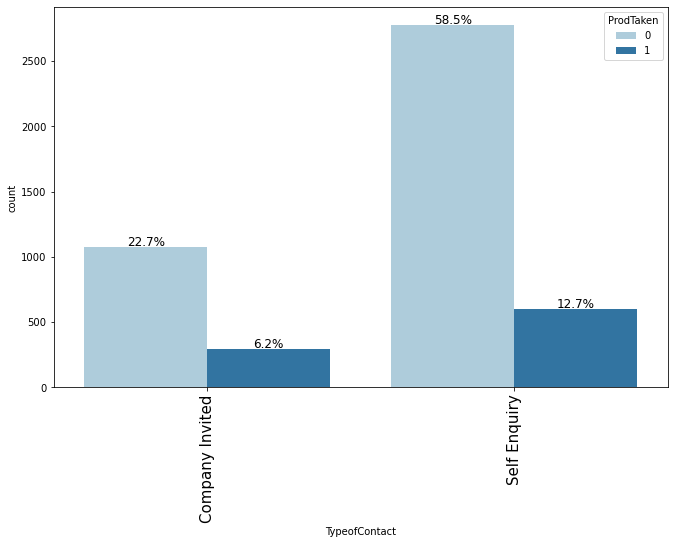

<Figure size 432x288 with 0 Axes>

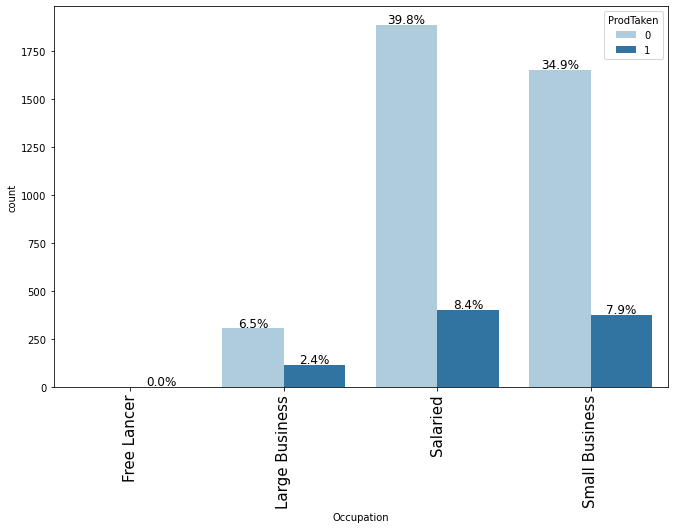

<Figure size 432x288 with 0 Axes>

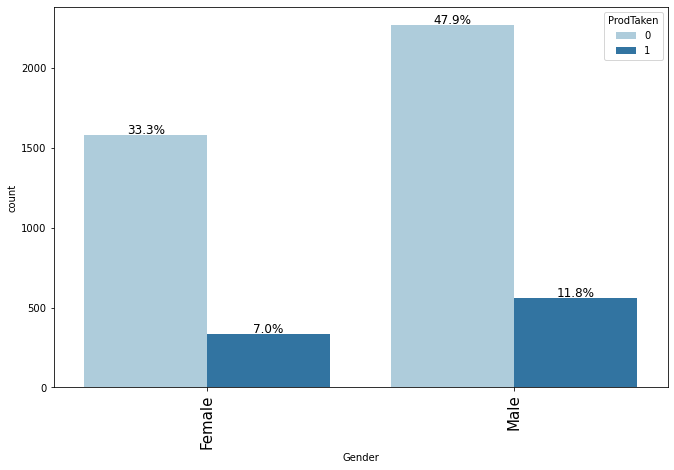

<Figure size 432x288 with 0 Axes>

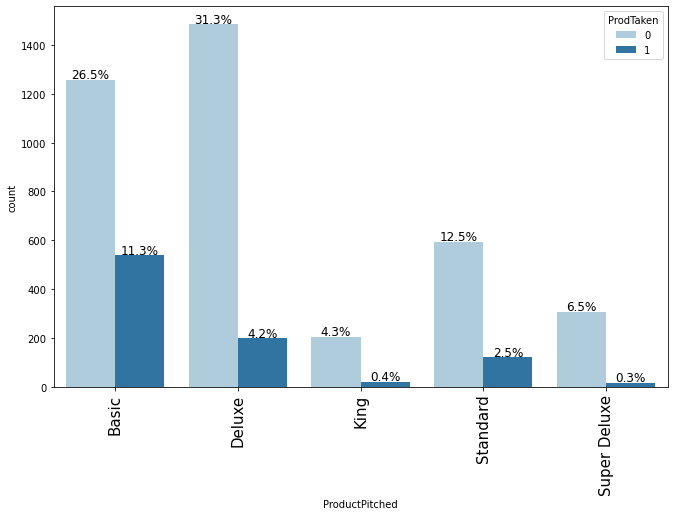

<Figure size 432x288 with 0 Axes>

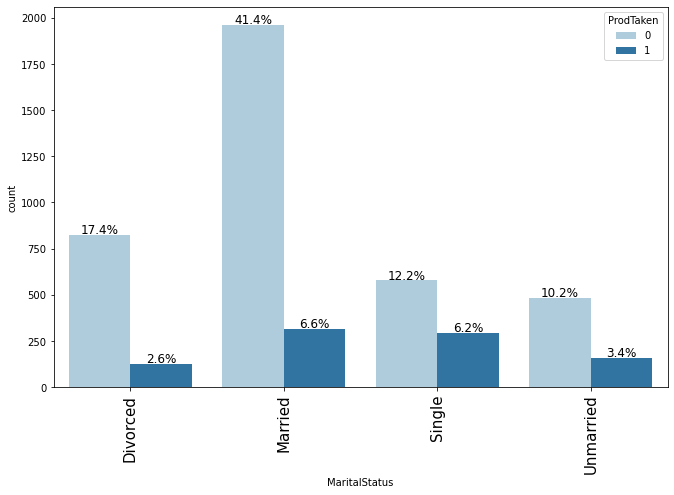

<Figure size 432x288 with 0 Axes>

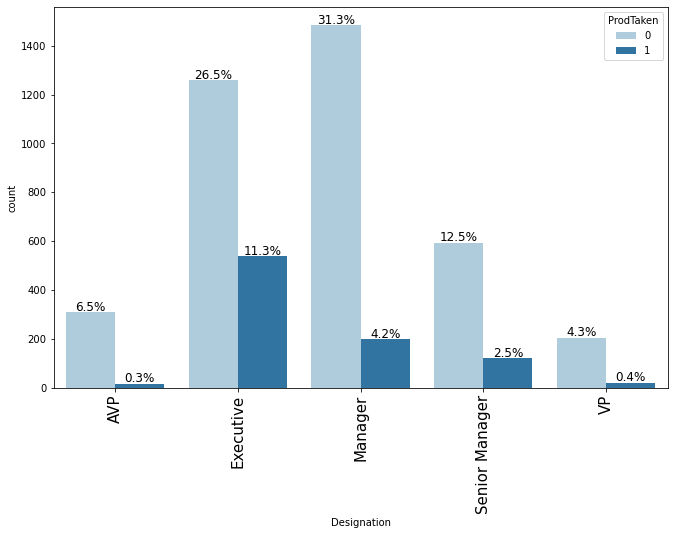

<Figure size 432x288 with 0 Axes>

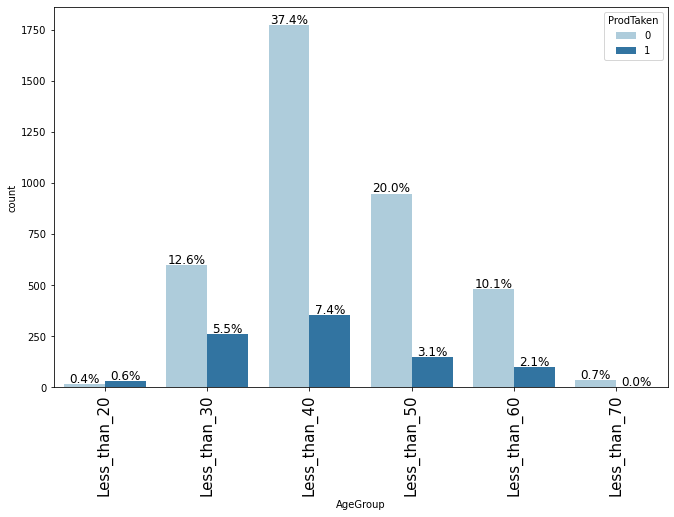

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [68]:
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df, cols, perc=True, n=10, hueCol="ProdTaken")
    plt.tight_layout()


<a id='BivariateCat'> </a>

**Observation:**

*[Click to return to TOC](#summary_home)*


* Most of the type of contacts where Self Inquiry when compared with Company initiated
* Salaried 8.4% and Small Business 7.9% customers have purchased the products that the Large Business and Free Lance customers
* Male 11.8% has availed the products when compared with Female 7.0%
* Basic product seems to be the higher product when compared with others, followed by Deluxe
* Married & Single status seems to be the max number of customers who have taken the products
* Customers at Executive designation seem to be the highest number of people availaing the products


#### Analyzing the Numerical attributes with Product Taken

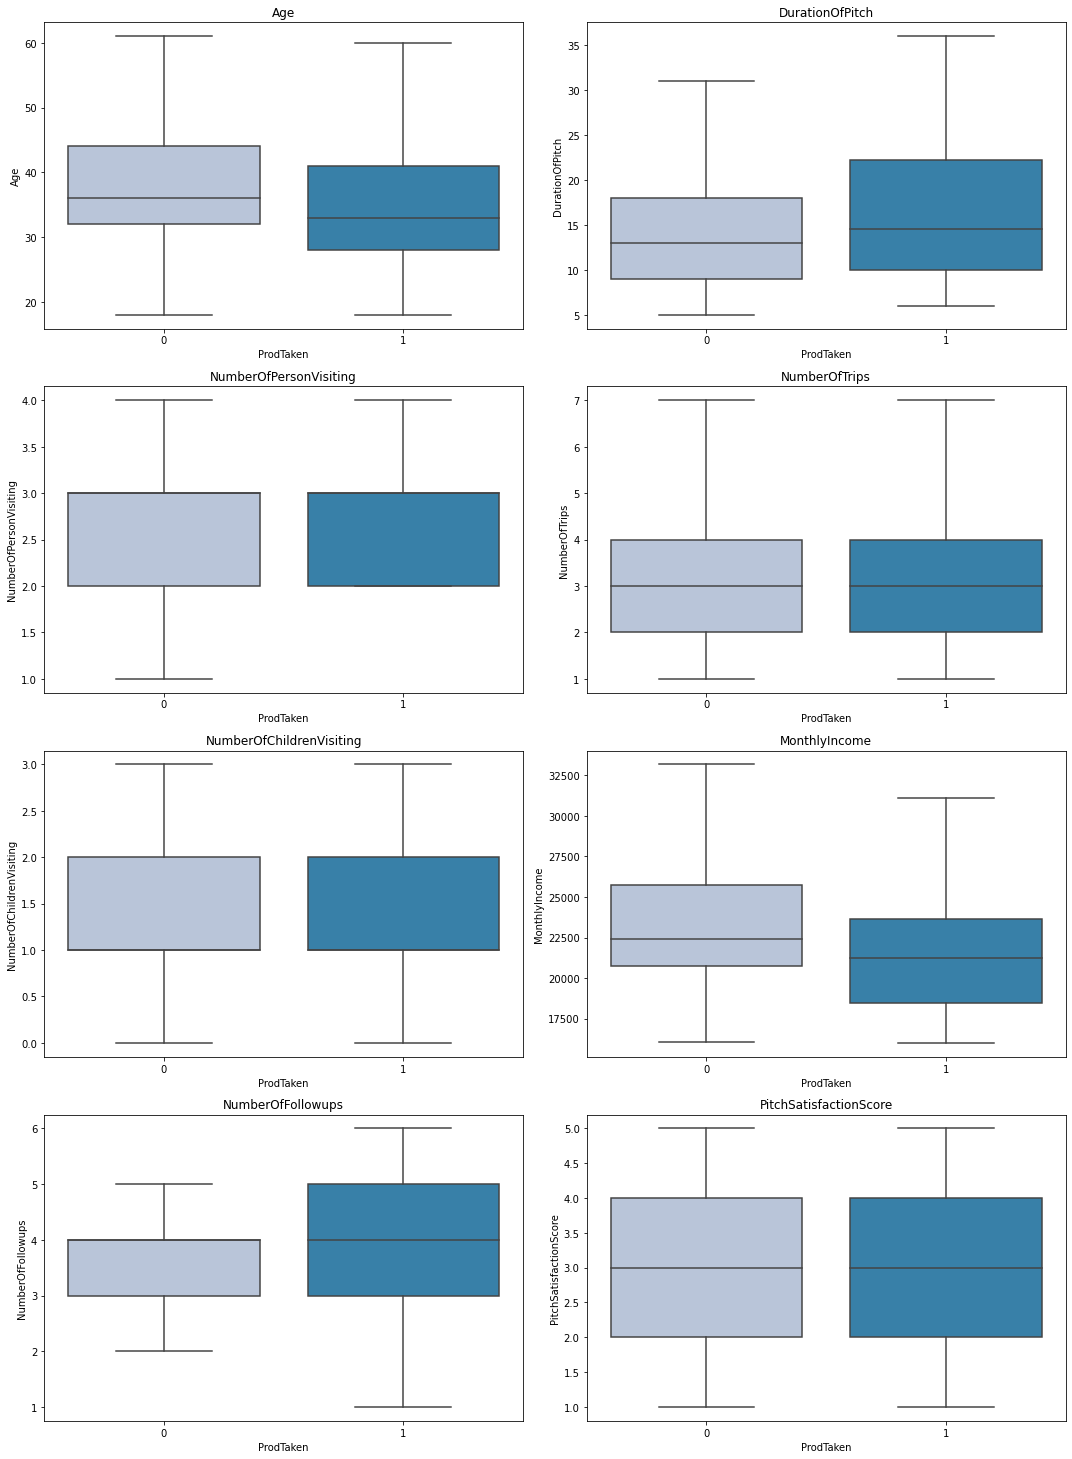

<IPython.core.display.Javascript object>

In [69]:
cols = df[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfPersonVisiting",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
        "NumberOfFollowups",
        "PitchSatisfactionScore",
    ]
].columns.tolist()
plt.figure(figsize=(15, 25))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(df["ProdTaken"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

<a id='BivariateNum'> </a>

**Observation:**

*[Click to return to TOC](#summary_home)*


**Observation:**

* Customers within the range of 28-40 seems to be purchasing the product than other ages
* Customer who have had a pitch discussion more than 15 mins have an higher chance of taking the product. Range of successful pitch duration is around 12-22 
* Customer who have not availed the product have also travelled 2-4 trips
* Lower income customers have had a higher chance of taking the product when compared with higher income customers
* Chance of Customers availaing the Product are more when the number of followups are 4 or more

<a id="multivariate" > </a>

### Multivariate Analysis - Visualise association with Product Taken & correlation between other Features
*[Click to return to TOC](#summary_home)*

---

**`Age Group` vs `Product Taken`**

------------------------------  Volume  ------------------------------
ProdTaken        0    1   All
AgeGroup                     
All           3849  892  4741
Less_than_40  1773  352  2125
Less_than_30   597  262   859
Less_than_50   948  148  1096
Less_than_60   480  100   580
Less_than_20    17   29    46
Less_than_70    34    1    35
------------------------------  Percentage %  ------------------------------
ProdTaken            0         1
AgeGroup                        
Less_than_20  0.369565  0.630435
Less_than_30  0.694994  0.305006
All           0.811854  0.188146
Less_than_60  0.827586  0.172414
Less_than_40  0.834353  0.165647
Less_than_50  0.864964  0.135036
Less_than_70  0.971429  0.028571
------------------------------------------------------------------------------------------------------------------------


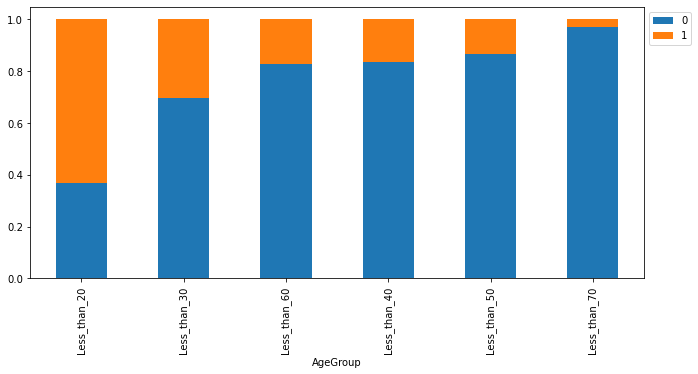

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(df, "AgeGroup", "ProdTaken")

**Observations:**

* The chances of customers taking the product is more for lower age groups
* 60% of customers less than 20 age group have availed the product and the pattern decreases as age group increases

**`TypeofContract` vs `Product Taken`**

------------------------------  Volume  ------------------------------
ProdTaken           0    1   All
TypeofContact                   
All              3849  892  4741
Self Enquiry     2775  600  3375
Company Invited  1074  292  1366
------------------------------  Percentage %  ------------------------------
ProdTaken               0         1
TypeofContact                      
Company Invited  0.786237  0.213763
All              0.811854  0.188146
Self Enquiry     0.822222  0.177778
------------------------------------------------------------------------------------------------------------------------


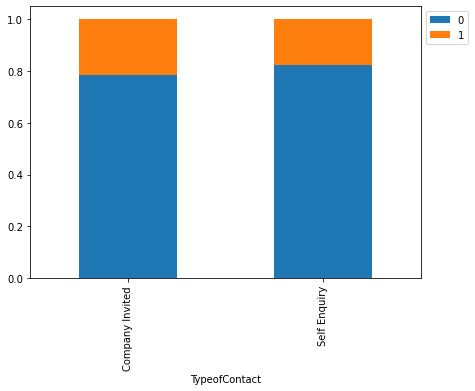

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(df, "TypeofContact", "ProdTaken")

**Observations:**
* Both the type of contacts doesnt have much influence in the chance os Product taken

**`City Tier` vs `Personal Loan`**

------------------------------  Volume  ------------------------------
ProdTaken     0    1   All
CityTier                  
All        3849  892  4741
1          2590  504  3094
3          1113  346  1459
2           146   42   188
------------------------------  Percentage %  ------------------------------
ProdTaken         0         1
CityTier                     
3          0.762851  0.237149
2          0.776596  0.223404
All        0.811854  0.188146
1          0.837104  0.162896
------------------------------------------------------------------------------------------------------------------------


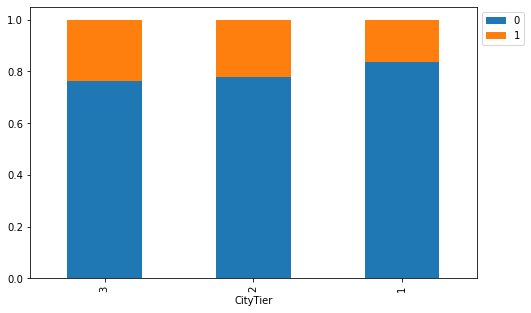

<IPython.core.display.Javascript object>

In [72]:
stacked_barplot(df, "CityTier", "ProdTaken")

**Observations:**
* 24% of the Tier 3 customers have taken the product, followed by 22% of Tier 2 customers
* 16% of the Tier 1 cites have availed the product

**`Occupation` vs `Prodcut Taken`**

------------------------------  Volume  ------------------------------
ProdTaken          0    1   All
Occupation                     
All             3849  892  4741
Salaried        1889  400  2289
Small Business  1654  374  2028
Large Business   306  116   422
Free Lancer        0    2     2
------------------------------  Percentage %  ------------------------------
ProdTaken              0         1
Occupation                        
Free Lancer     0.000000  1.000000
Large Business  0.725118  0.274882
All             0.811854  0.188146
Small Business  0.815582  0.184418
Salaried        0.825251  0.174749
------------------------------------------------------------------------------------------------------------------------


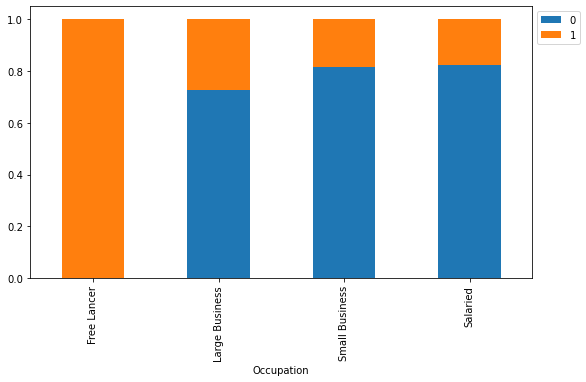

<IPython.core.display.Javascript object>

In [73]:
stacked_barplot(df, "Occupation", "ProdTaken")

**Observations:**
* 27% of the Large Business customers, 18% of Small Business & 17% of salaried have taken the product from the dataset of customers collected

**`Gender` vs `Prod Taken`**

------------------------------  Volume  ------------------------------
ProdTaken     0    1   All
Gender                    
All        3849  892  4741
Male       2269  560  2829
Female     1580  332  1912
------------------------------  Percentage %  ------------------------------
ProdTaken         0         1
Gender                       
Male       0.802050  0.197950
All        0.811854  0.188146
Female     0.826360  0.173640
------------------------------------------------------------------------------------------------------------------------


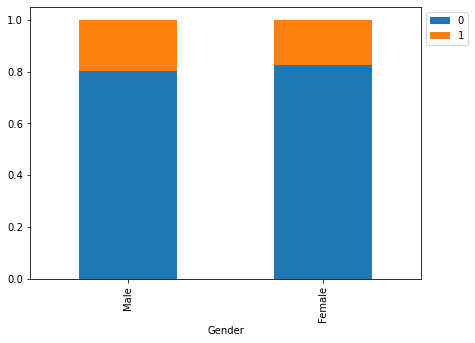

<IPython.core.display.Javascript object>

In [74]:
stacked_barplot(df, "Gender", "ProdTaken")

**Observations:**
* 20% of the Male customers & 17% of the Female customers have taken the product from the overall population

**`Marital Status` vs `Prod Taken`**

------------------------------  Volume  ------------------------------
ProdTaken         0    1   All
MaritalStatus                 
All            3849  892  4741
Married        1963  314  2277
Single          578  295   873
Unmarried       482  159   641
Divorced        826  124   950
------------------------------  Percentage %  ------------------------------
ProdTaken             0         1
MaritalStatus                    
Single         0.662085  0.337915
Unmarried      0.751950  0.248050
All            0.811854  0.188146
Married        0.862099  0.137901
Divorced       0.869474  0.130526
------------------------------------------------------------------------------------------------------------------------


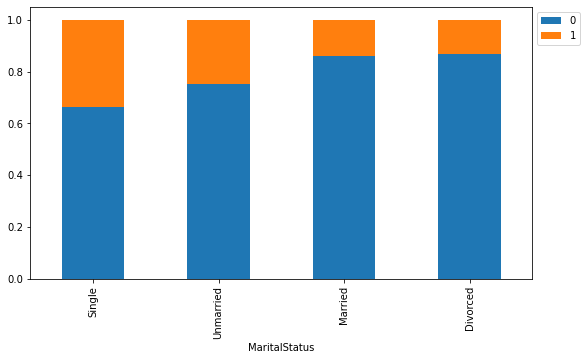

<IPython.core.display.Javascript object>

In [75]:
stacked_barplot(df, "MaritalStatus", "ProdTaken")

**Observations:**
* 34% of Single customers have taken the products when compared with the remaining Single popualtion
* 25% of the Unmarried customers have taken the product 
* 14% of Married customers

**`CityTier` vs `Type of Contact` vs `Prod Taken`**

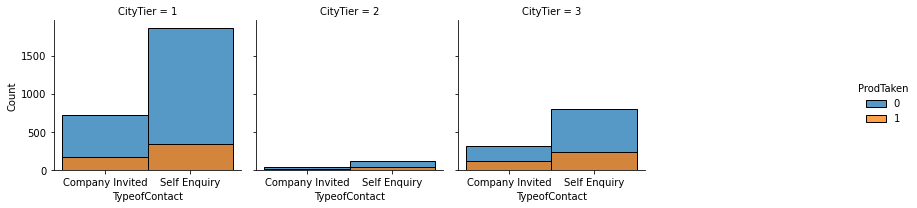

<IPython.core.display.Javascript object>

In [76]:
g = sns.FacetGrid(df, col="CityTier", hue="ProdTaken", col_wrap=4, margin_titles=True)
g.map(sns.histplot, "TypeofContact")
g.add_legend()

**Observations:**
* City tier 1 & City Tier 3 has higher number of Self Inquiry customers taking the product
* Tier 2 customers have a very less chance of taking the product

**`CityTier` vs `Gender` vs `Prod Taken`**

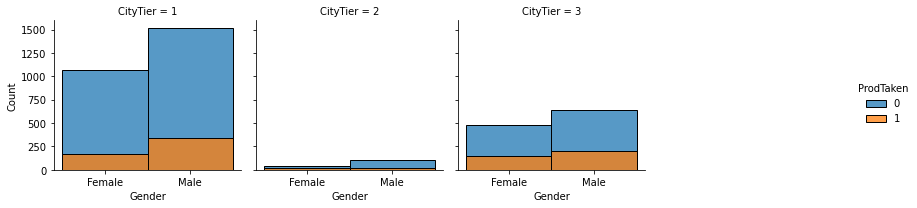

<IPython.core.display.Javascript object>

In [77]:
g = sns.FacetGrid(df, col="CityTier", hue="ProdTaken", col_wrap=4, margin_titles=True)
g.map(sns.histplot, "Gender")
g.add_legend()

**Observations:**
* Wherever there are high Income customers, we see an increase on the number of Personal loan customers. The Group < 94500 seems to have a lot of high income users availing personal loans

**`Number of Followups` vs `Income` vs `Prod Taken`**

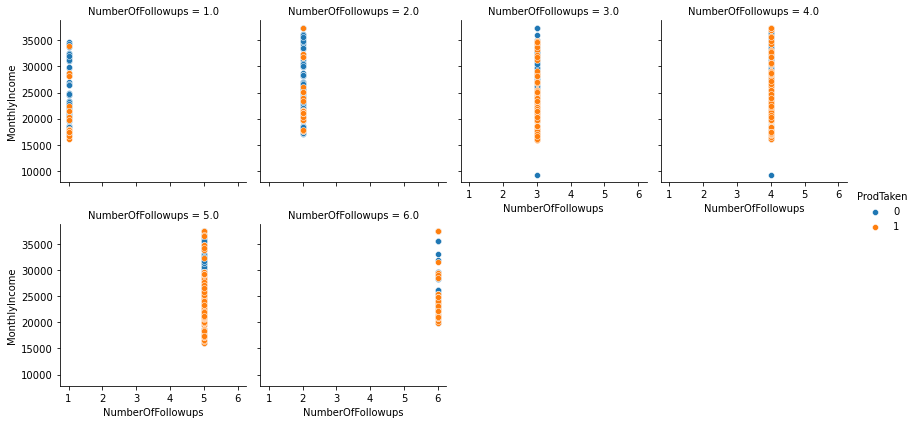

<IPython.core.display.Javascript object>

In [78]:
g = sns.FacetGrid(
    df, col="NumberOfFollowups", hue="ProdTaken", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "NumberOfFollowups", "MonthlyIncome")
g.add_legend()

**Observations:**
* As the number of followups increase with the average income, the chances of having the product taken increases

**`Number of Followups` vs `Duration of Pitch` vs `Product Pitched` vs `Prod Taken`**

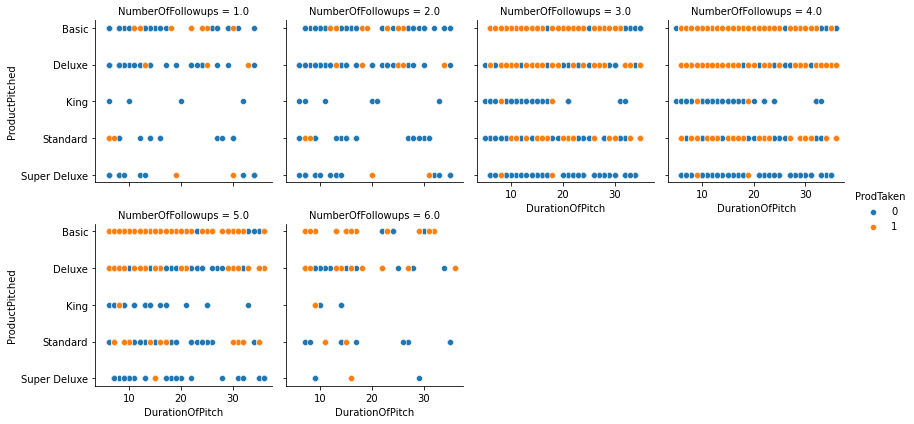

<IPython.core.display.Javascript object>

In [79]:
g = sns.FacetGrid(
    df, col="NumberOfFollowups", hue="ProdTaken", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "DurationOfPitch", "ProductPitched")
g.add_legend()

**Observations:**
* The conversion rate is more when the number of follow ups are more than 3
* For Basic & Deluxe products, the conversion rate increases with 3 followups but at a very less duration of pitch
* For Standard products, the numer of followups are 4 or more

**`Income` vs `Education` vs `Personal Loan`**

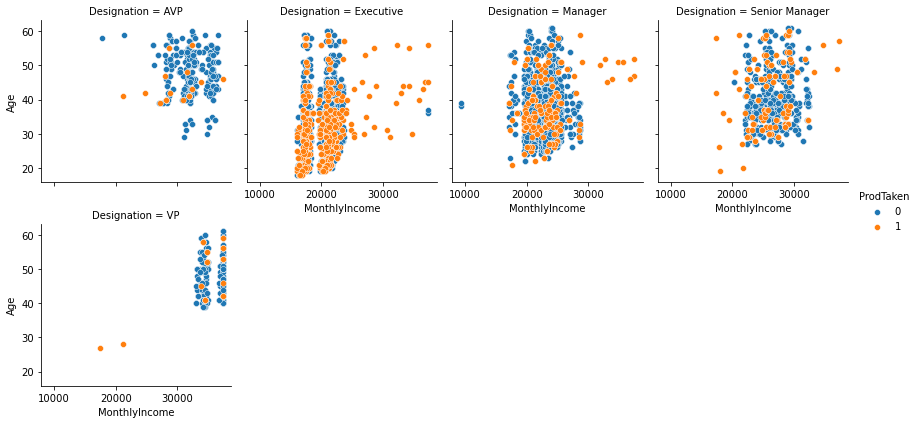

<IPython.core.display.Javascript object>

In [80]:
g = sns.FacetGrid(
    df, col="Designation", hue="ProdTaken", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "MonthlyIncome", "Age")
g.add_legend()

**Observations**
* Executives in the range of 15K-25K have a higher chance of taking the product
* Managers at the range of 20-25K have a higher chance of taking the product
* Senior Managers seems to have a distributed distribution

**`PitchSatisfactionScore` vs `Duration of Pitch` vs `Product Pitched`**

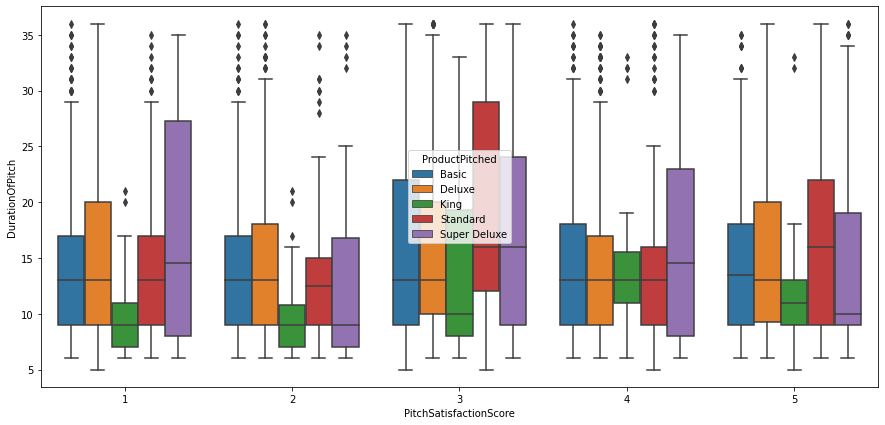

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    x="PitchSatisfactionScore", y="DurationOfPitch", data=df, hue="ProductPitched"
)
plt.show()

**Observations**
* Super Deluxe product requires a higher level of pitch duration and in most cases getting a score of 1
* Standard product has high ratings of 3 or more in most cases
* Basic & Deluxe requires very less pitch duration 

---

<a id="profile"> </a>

## Profiling of Customers - Based on Product
*[Click to return to TOC](#summary_home)*

---

### Profiling of Customers who have taken the Product - Overall

In [82]:
df_ProdTaken = df[df["ProdTaken"].astype("int") == 1]

<IPython.core.display.Javascript object>

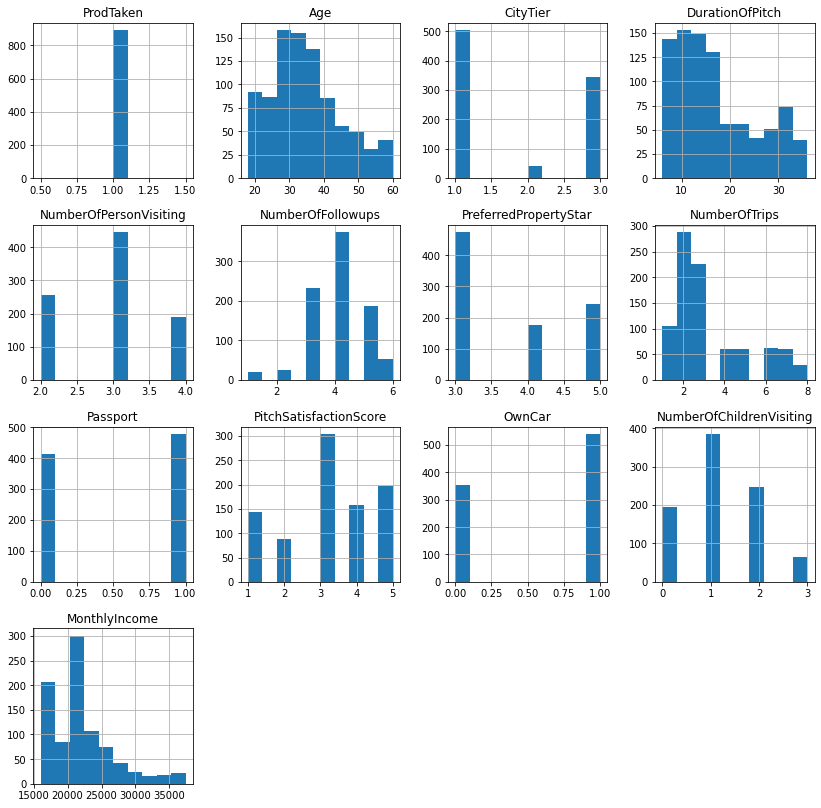

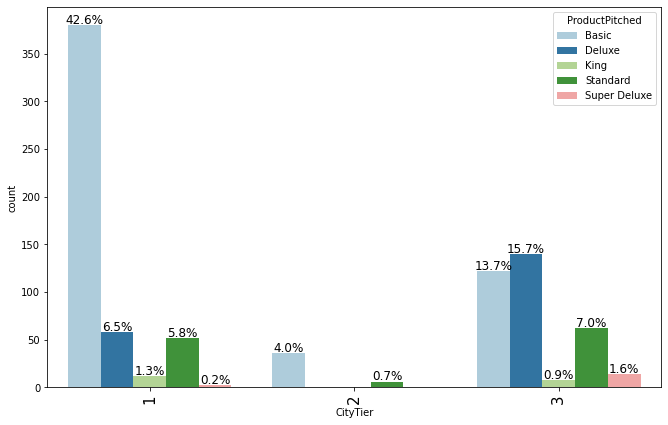

<Figure size 432x288 with 0 Axes>

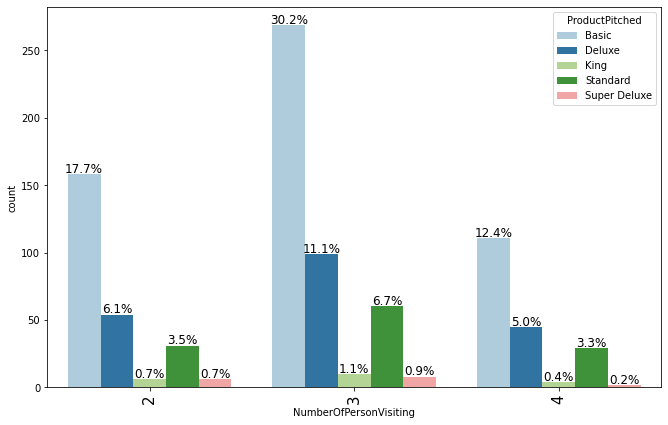

<Figure size 432x288 with 0 Axes>

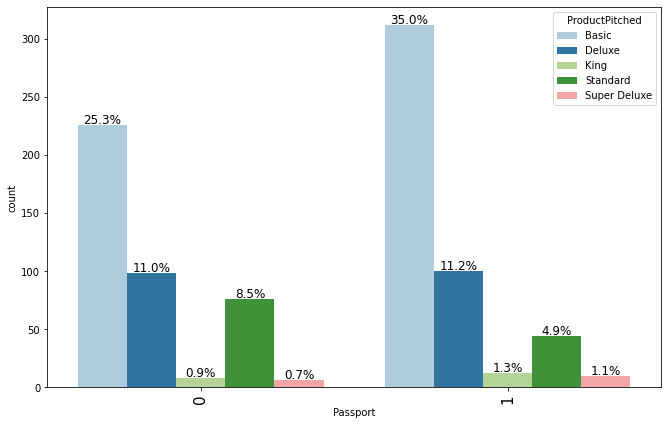

<Figure size 432x288 with 0 Axes>

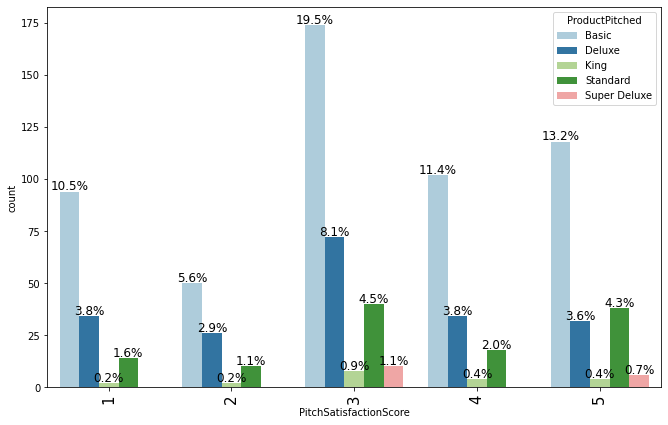

<Figure size 432x288 with 0 Axes>

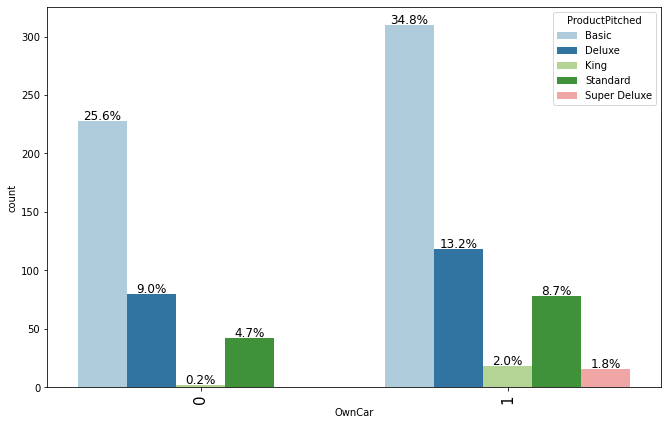

<Figure size 432x288 with 0 Axes>

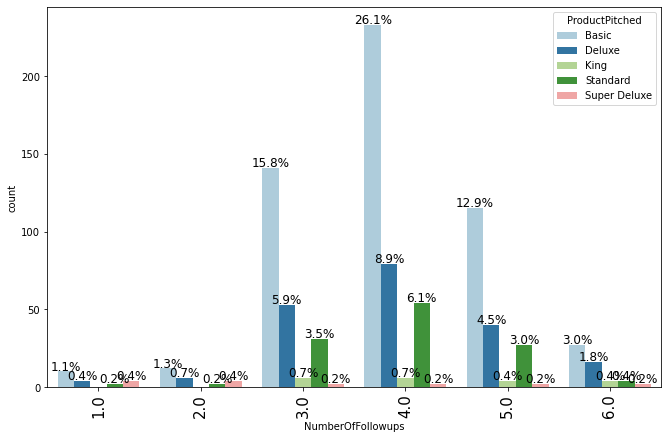

<Figure size 432x288 with 0 Axes>

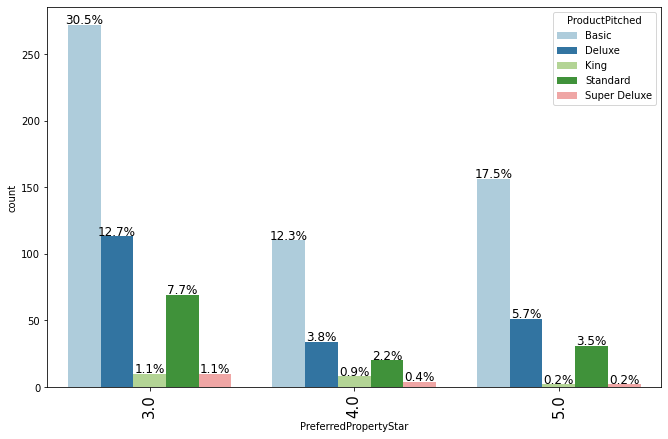

<Figure size 432x288 with 0 Axes>

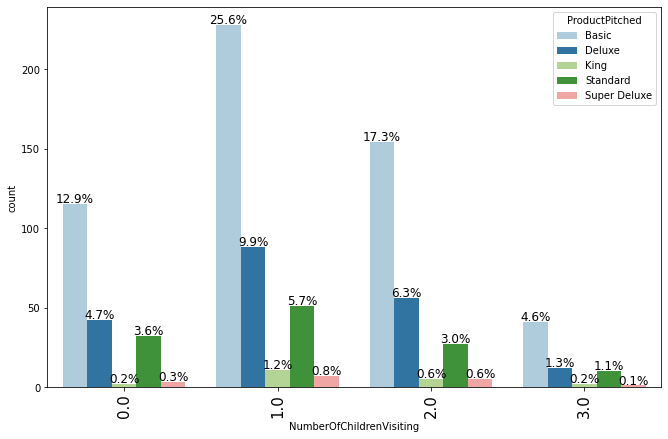

<Figure size 432x288 with 0 Axes>

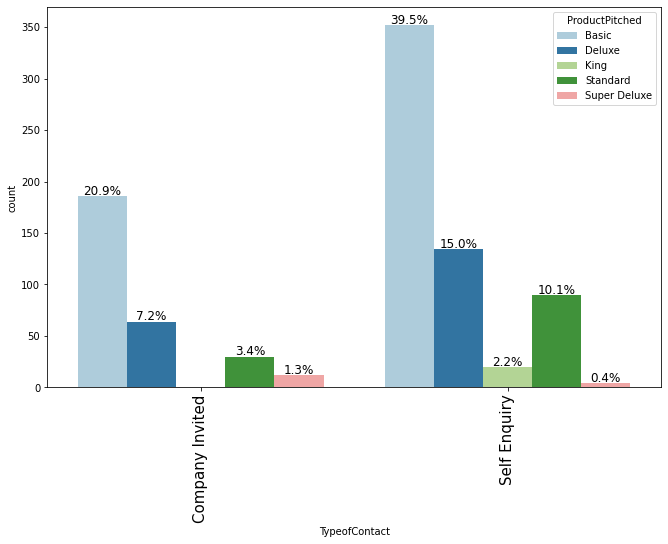

<Figure size 432x288 with 0 Axes>

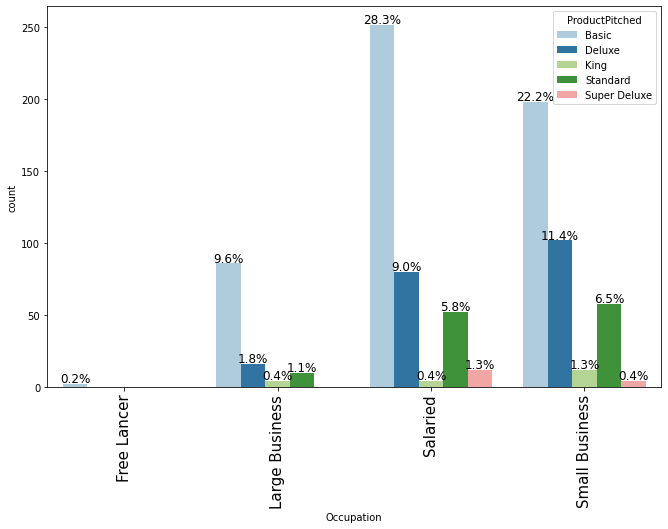

<Figure size 432x288 with 0 Axes>

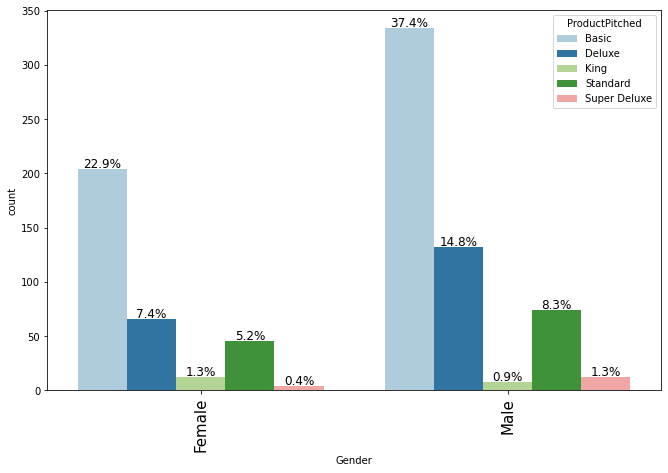

<Figure size 432x288 with 0 Axes>

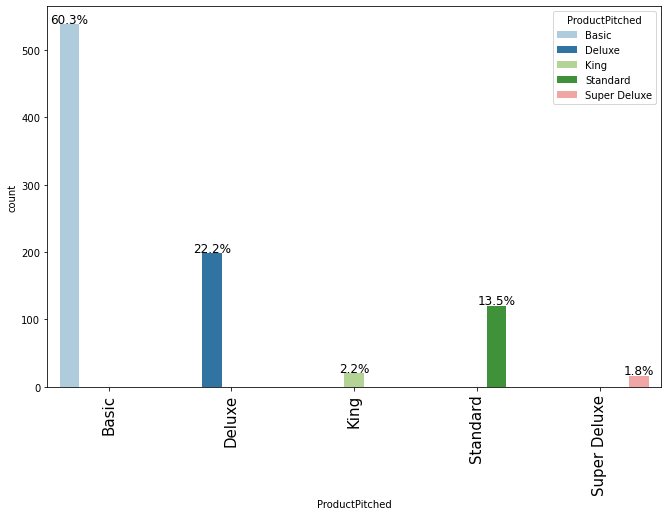

<Figure size 432x288 with 0 Axes>

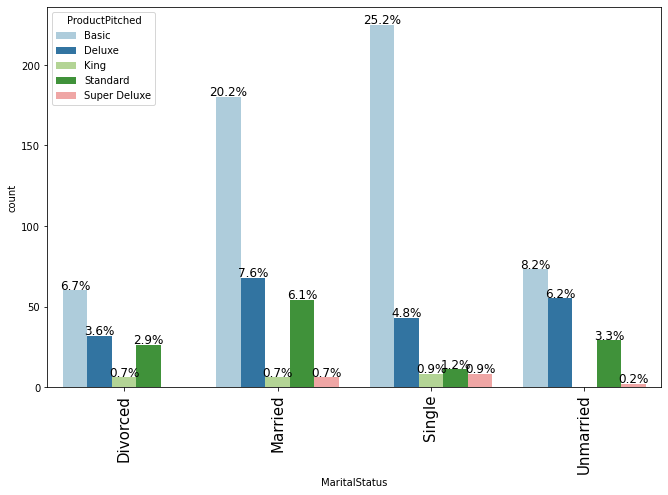

<Figure size 432x288 with 0 Axes>

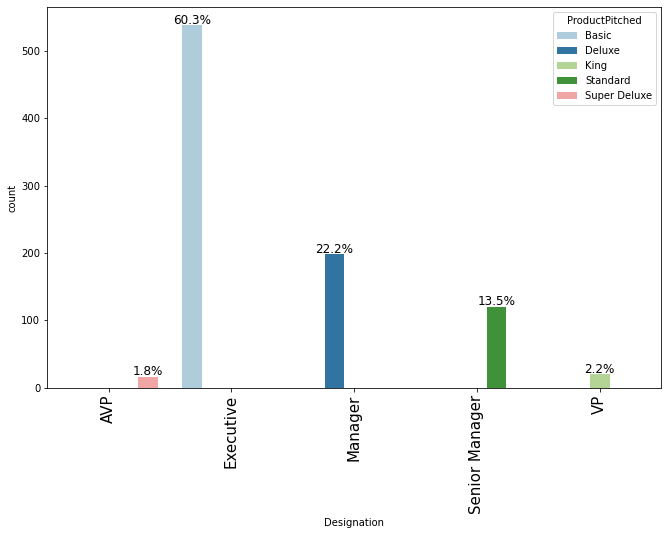

<Figure size 432x288 with 0 Axes>

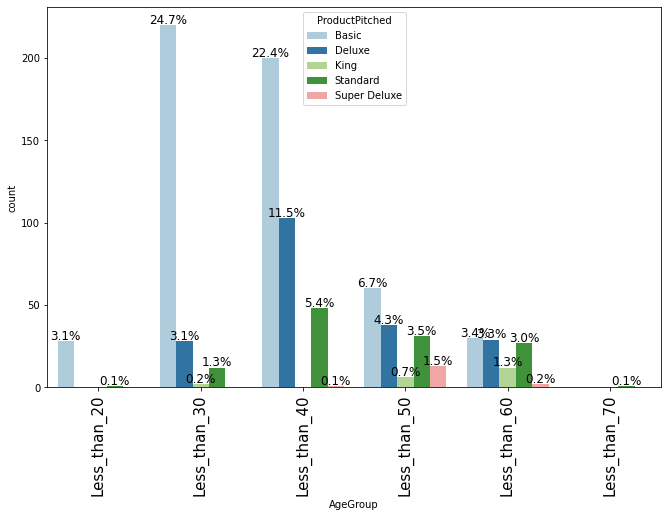

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [83]:
# creating histograms
df_ProdTaken.hist(figsize=(14, 14))
plt.show()

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(df_ProdTaken, cols, perc=True, n=10, hueCol="ProductPitched");
    plt.tight_layout();

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df_ProdTaken, cols, perc=True, n=10, hueCol="ProductPitched");
    plt.tight_layout();


<a id='profile_overall'></a>
#### Observation: Profiling of Customers - Overall
*[Click to return to TOC](#summary_home)*




* The average age of the customers that have procured the products are within the range of 20 - 40 with more number of customers withing the range of 30-40
* Overall 60% of Customers have taken the "Basic" product,followed by "Deluxe" product of 2% and then "Standard" product of 13%
* "Super Deluxe" has been the lowest product purchased by the customers 
* The "Self Inquiry" has been the most type of contact for any product types, though there are successful "Company Invited" type of contacts as well
* For "Super Deluxe" product, the company invited contact type has a better chance of product being taken 
* Most of the Customers have been from Tier 1 & Tier 3 for "Basic" product type. There has been significant "Tier 3" customers for Deluxe product type
* There has been very less customers that procurred the product from the Tier 2 cities
* The max Number of Person Visiting is 3 for almost all the products 
* Salaired and Small Business users have procurred products while Free Lancers were very customers
* Male Customers were the most when compared with the Female customers. One interesting data is the Female Customers seems to have taken "King" product more than the Male customers
* On an average 4 followups are required to convince the customer to purchase the products, in some cases 3 or 5
* Basic product customers seems to prefer star ratings of 3, 4 & 5, but mostly other product customers prefer 3 star rating
* Married & Single type of customers seems to have been taken this product more than the Unmarried and Divorced type
* Most of the customers have taken at least 3 trips with Basic product customers having a range of atleast 5-8 trips, followed by Standard product customers
* When compared with the overall, most of the overall customers who have procurred the products have passports and considerably equal customers dont have passports
* The Pitch satisfaction score  has been high for Basic customers, followed by Deluxe
* Basic & Deluze have had Pitch satisfaction scores ranging from 1-5, while Super Deluxe has got good score of 3 & 5 
* Almost an equal number of customer own cars 
* Customers at Executive designation prefer Basin products, while Managers prefer Deluxe and Senior Managers prefer Standard. VP & AVP prefer King & Super Deluxe


### Profiling of Customers - Basic

In [84]:
df_ProdBasic = df[
    (df["ProductPitched"] == "Basic") & df["ProdTaken"].astype("int") == 1
]

<IPython.core.display.Javascript object>

In [85]:
df_ProdBasic.describe(include="all").T

count unique           top freq          mean  \
ProdTaken                 538.0    NaN           NaN  NaN           1.0   
Age                       538.0    NaN           NaN  NaN     31.548327   
TypeofContact               538      2  Self Enquiry  352           NaN   
CityTier                  538.0    NaN           NaN  NaN      1.520446   
DurationOfPitch           538.0    NaN           NaN  NaN     15.654275   
Occupation                  538      4      Salaried  252           NaN   
Gender                      538      2          Male  334           NaN   
NumberOfPersonVisiting    538.0    NaN           NaN  NaN      2.912639   
NumberOfFollowups         538.0    NaN           NaN  NaN      3.951673   
ProductPitched              538      1         Basic  538           NaN   
PreferredPropertyStar     538.0    NaN           NaN  NaN      3.784387   
MaritalStatus               538      4        Single  225           NaN   
NumberOfTrips             538.0    NaN           NaN  NaN      3.184015   
Passport                  538.0    NaN           NaN  NaN      0.579926   
PitchSatisfactionScore    538.0    NaN           NaN  NaN      3.185874   
OwnCar                    538.0    NaN           NaN  NaN      0.576208   
NumberOfChildrenVisiting  538.0    NaN           NaN  NaN      1.224907   
Designation                 538      1     Executive  538           NaN   
MonthlyIncome             538.0    NaN           NaN  NaN  20255.420074   
AgeGroup                    538      5  Less_than_30  220           NaN   

                                  std      min      25%      50%      75%  \
ProdTaken                         0.0      1.0      1.0      1.0      1.0   
Age                          8.906011     18.0     26.0     30.0     36.0   
TypeofContact                     NaN      NaN      NaN      NaN      NaN   
CityTier                     0.839299      1.0      1.0      1.0      2.0   
DurationOfPitch              7.776881      6.0      9.0     13.0     21.0   
Occupation                        NaN      NaN      NaN      NaN      NaN   
Gender                            NaN      NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.702343      2.0      2.0      3.0      3.0   
NumberOfFollowups            0.965652      1.0      3.0      4.0      5.0   
ProductPitched                    NaN      NaN      NaN      NaN      NaN   
PreferredPropertyStar        0.866282      3.0      3.0      3.0      5.0   
MaritalStatus                     NaN      NaN      NaN      NaN      NaN   
NumberOfTrips                1.835296      1.0      2.0      3.0      3.0   
Passport                      0.49403      0.0      0.0      1.0      1.0   
PitchSatisfactionScore       1.351882      1.0      2.0      3.0      4.0   
OwnCar                       0.494618      0.0      0.0      1.0      1.0   
NumberOfChildrenVisiting     0.869284      0.0      1.0      1.0      2.0   
Designation                       NaN      NaN      NaN      NaN      NaN   
MonthlyIncome             3288.711356  16009.0  17564.0  20721.0  21529.0   
AgeGroup                          NaN      NaN      NaN      NaN      NaN   

                              max  
ProdTaken                     1.0  
Age                          59.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch              36.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37376.5  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

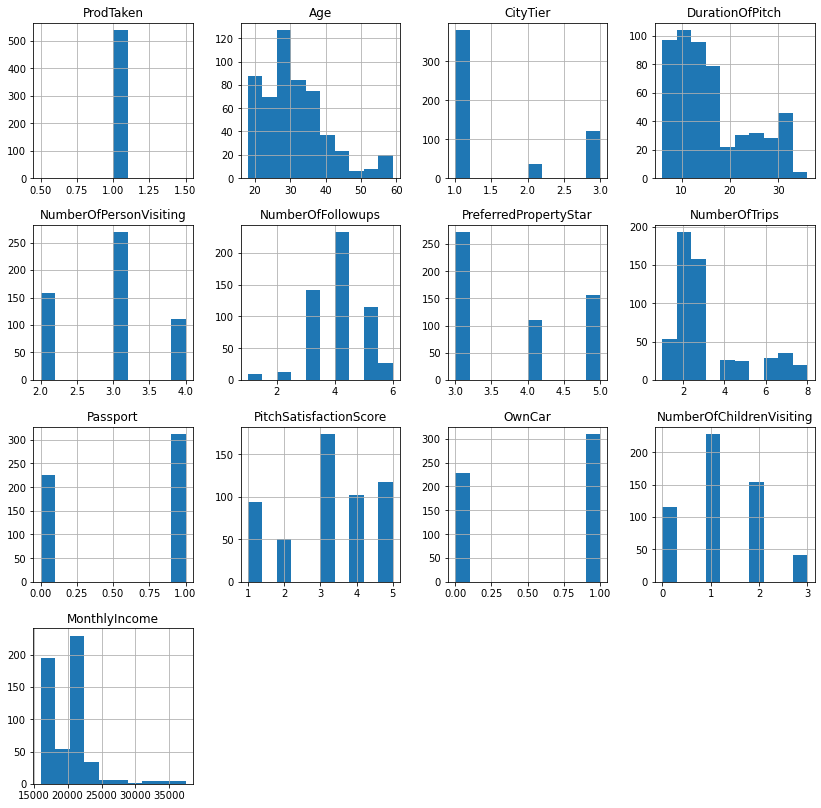

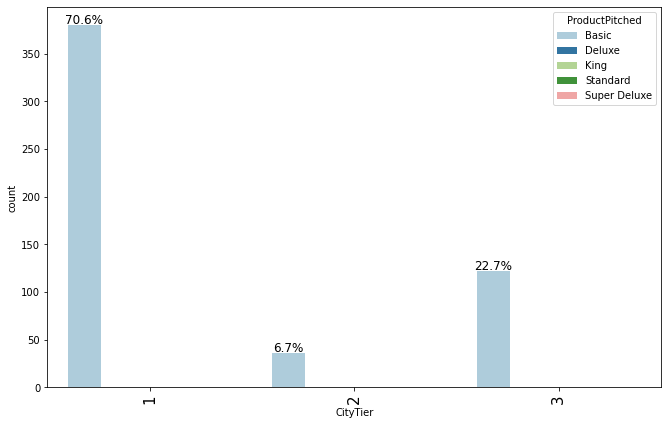

<Figure size 432x288 with 0 Axes>

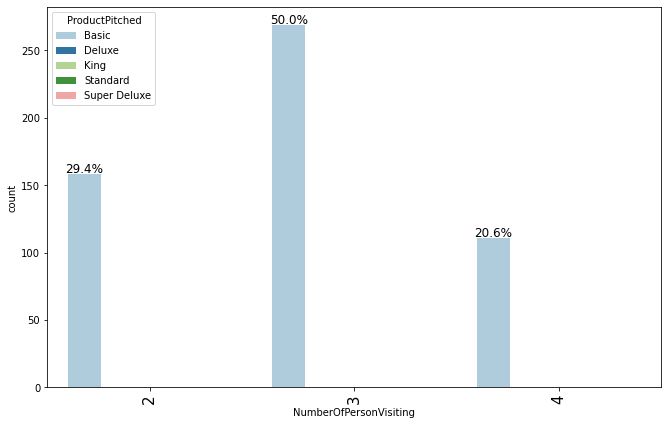

<Figure size 432x288 with 0 Axes>

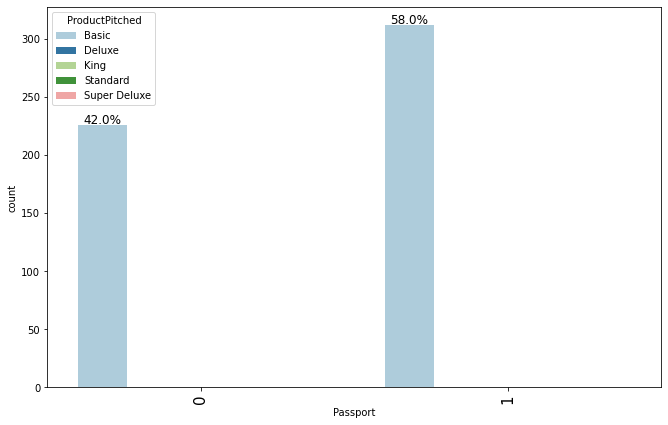

<Figure size 432x288 with 0 Axes>

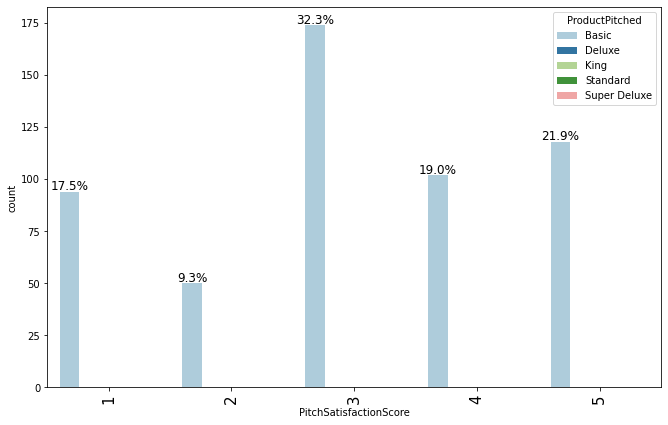

<Figure size 432x288 with 0 Axes>

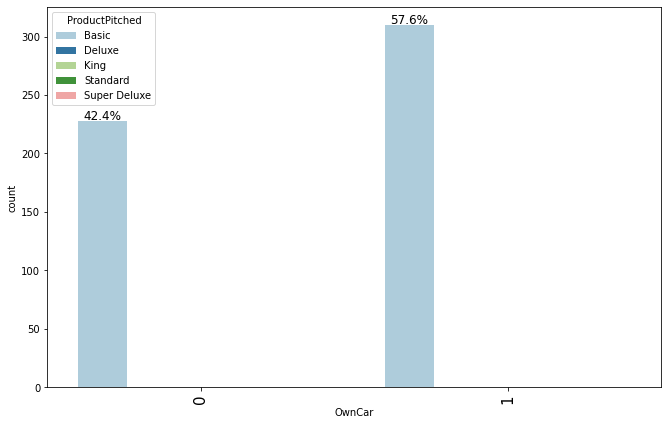

<Figure size 432x288 with 0 Axes>

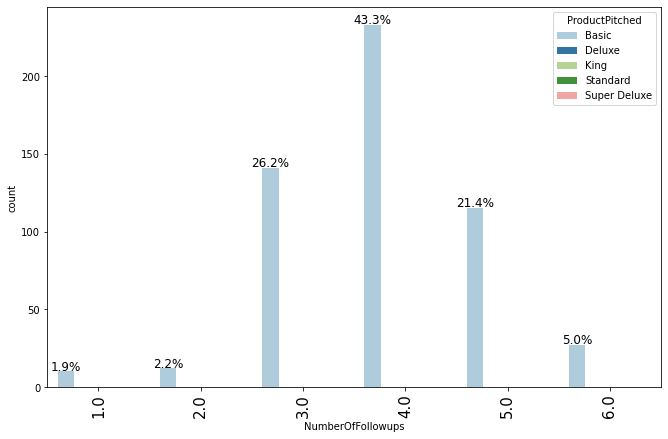

<Figure size 432x288 with 0 Axes>

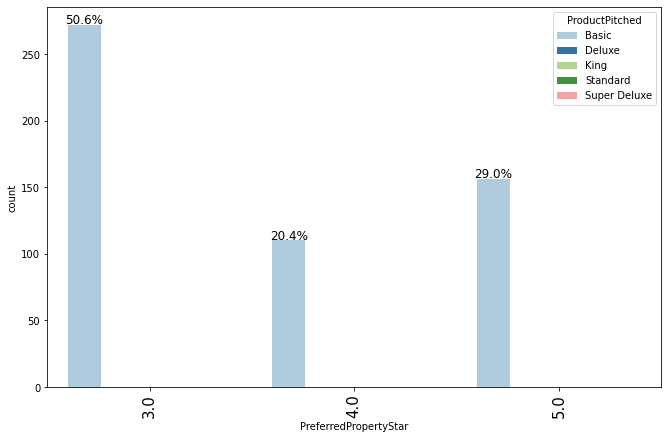

<Figure size 432x288 with 0 Axes>

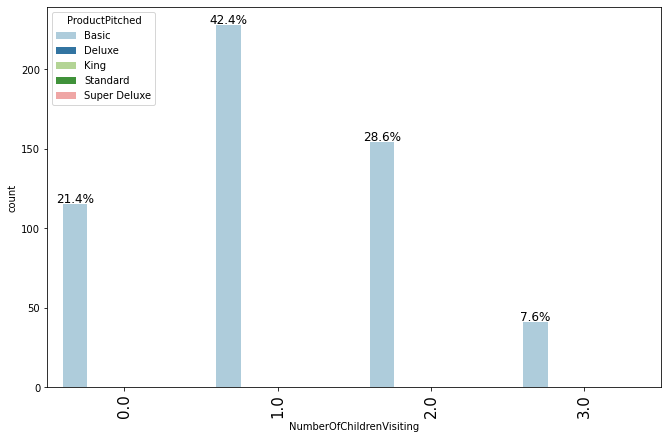

<Figure size 432x288 with 0 Axes>

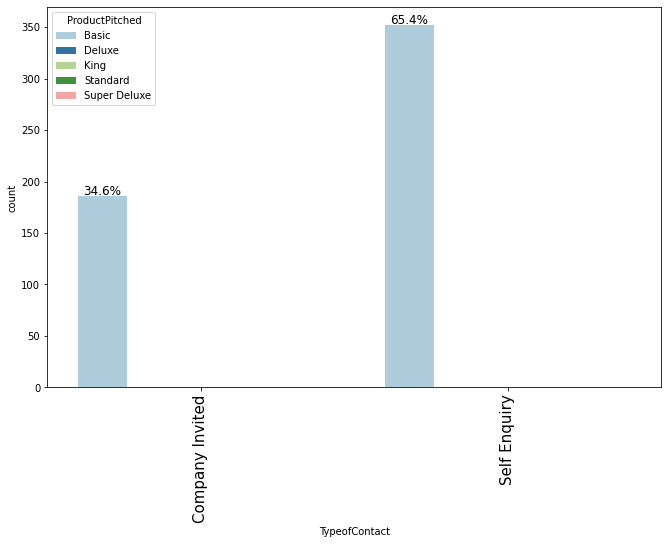

<Figure size 432x288 with 0 Axes>

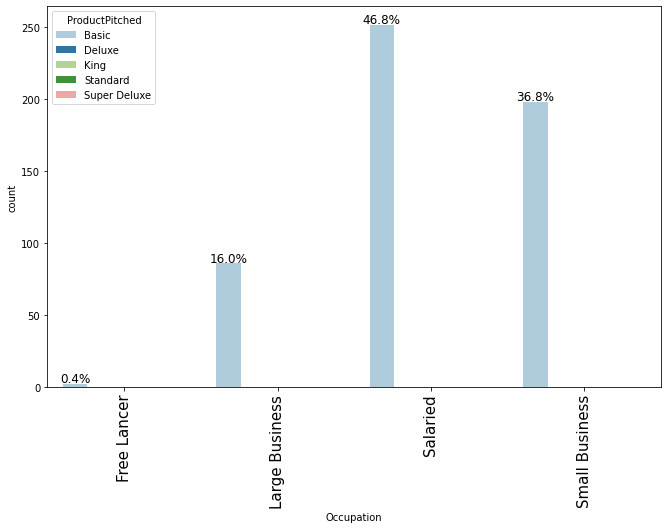

<Figure size 432x288 with 0 Axes>

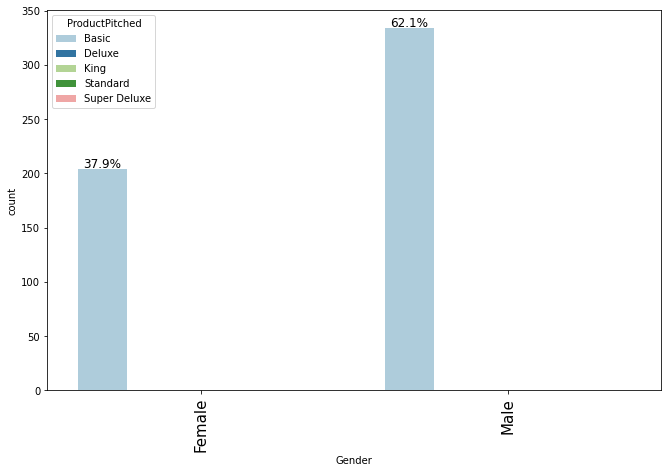

<Figure size 432x288 with 0 Axes>

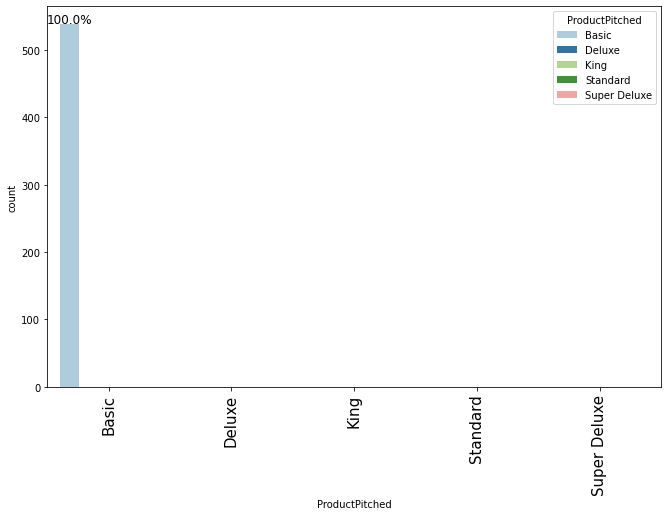

<Figure size 432x288 with 0 Axes>

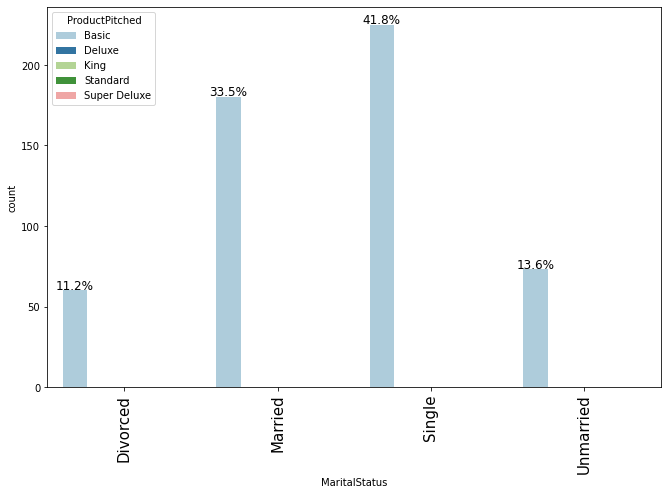

<Figure size 432x288 with 0 Axes>

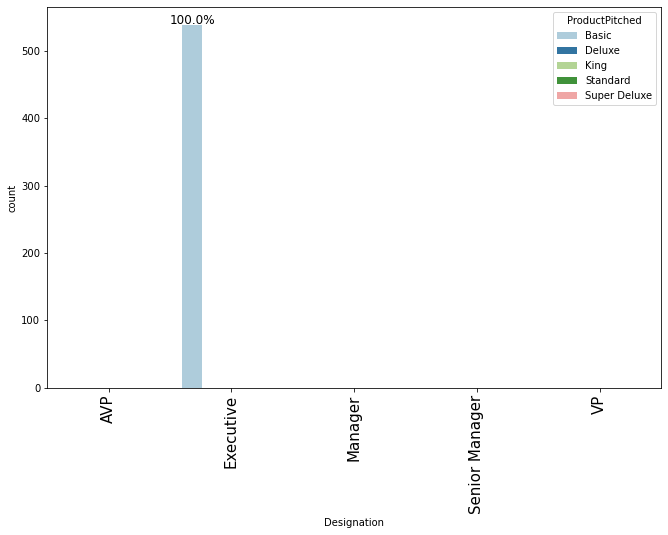

<Figure size 432x288 with 0 Axes>

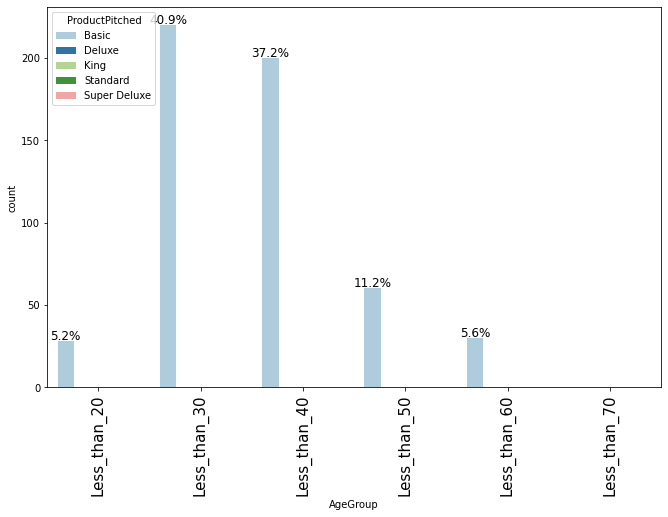

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [86]:
# creating histograms
df_ProdBasic.hist(figsize=(14, 14))
plt.show()

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(df_ProdBasic, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df_ProdBasic, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

<a id='profile_basic'> </a>

*[Click to return to TOC](#summary_home)*


#### Observation: Profiling of Customers - Basic Product

* Mostly 25-30 age customers have availed this product and less than 15 mins of time is spent in pitching to convince them
* Average of 3 persons are visiting and with an avergae of 1 child visiting
* Monthly income is around 17-23K for these customers, with 47% of them are Salaried and 70.7% of them are from Tier 1 cities
* 65% of the customers have purchased based on Self enquiry and almost 62% of them were Male customers
* 58% of the customers own a car and almost all customers are at Executive level
* Almost 50% of them have preferred 3 start ratings property and mostly they are either Single (42%) or Married (33%)
* 60% of them hold a passport and remaining without one
* Almost 4 followups are required with 32% of them providing a pitch satsifaction score of 3
* 70.6% of the customers are from Tier 1 city
* Average of 3 people were visiting and 58%  of them hold passports
* Pitch Satisfaction score is spread across 1-5 ratings


---

### Profiling of Customers - Standard

In [87]:
df_ProdStd = df[
    (df["ProductPitched"] == "Standard") & df["ProdTaken"].astype("int") == 1
]

<IPython.core.display.Javascript object>

In [88]:
df_ProdStd.describe(include="all").T

count unique             top freq          mean  \
ProdTaken                 120.0    NaN             NaN  NaN           1.0   
Age                       120.0    NaN             NaN  NaN     41.166667   
TypeofContact               120      2    Self Enquiry   90           NaN   
CityTier                  120.0    NaN             NaN  NaN      2.083333   
DurationOfPitch           120.0    NaN             NaN  NaN     18.983333   
Occupation                  120      3  Small Business   58           NaN   
Gender                      120      2            Male   74           NaN   
NumberOfPersonVisiting    120.0    NaN             NaN  NaN      2.983333   
NumberOfFollowups         120.0    NaN             NaN  NaN          3.95   
ProductPitched              120      1        Standard  120           NaN   
PreferredPropertyStar     120.0    NaN             NaN  NaN      3.683333   
MaritalStatus               120      4         Married   54           NaN   
NumberOfTrips             120.0    NaN             NaN  NaN      3.066667   
Passport                  120.0    NaN             NaN  NaN      0.366667   
PitchSatisfactionScore    120.0    NaN             NaN  NaN      3.466667   
OwnCar                    120.0    NaN             NaN  NaN          0.65   
NumberOfChildrenVisiting  120.0    NaN             NaN  NaN         1.125   
Designation                 120      1  Senior Manager  120           NaN   
MonthlyIncome             120.0    NaN             NaN  NaN  26007.945833   
AgeGroup                    120      6    Less_than_40   48           NaN   

                                  std      min      25%      50%      75%  \
ProdTaken                         0.0      1.0      1.0      1.0      1.0   
Age                          9.948044     19.0     33.0     38.0     49.0   
TypeofContact                     NaN      NaN      NaN      NaN      NaN   
CityTier                     0.975182      1.0      1.0      3.0      3.0   
DurationOfPitch              9.009783      6.0     11.0     17.0     27.5   
Occupation                        NaN      NaN      NaN      NaN      NaN   
Gender                            NaN      NaN      NaN      NaN      NaN   
NumberOfPersonVisiting       0.709874      2.0      2.0      3.0      3.0   
NumberOfFollowups            0.915322      1.0      3.0      4.0      5.0   
ProductPitched                    NaN      NaN      NaN      NaN      NaN   
PreferredPropertyStar        0.859777      3.0      3.0      3.0      5.0   
MaritalStatus                     NaN      NaN      NaN      NaN      NaN   
NumberOfTrips                1.813735      1.0      2.0      3.0      4.0   
Passport                     0.483915      0.0      0.0      0.0      1.0   
PitchSatisfactionScore       1.328001      1.0      3.0      3.0      5.0   
OwnCar                       0.478969      0.0      0.0      1.0      1.0   
NumberOfChildrenVisiting     0.903425      0.0      0.0      1.0      2.0   
Designation                       NaN      NaN      NaN      NaN      NaN   
MonthlyIncome             3607.826435  17372.0  23722.0  25711.0  28642.5   
AgeGroup                          NaN      NaN      NaN      NaN      NaN   

                              max  
ProdTaken                     1.0  
Age                          60.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch              36.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37376.5  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

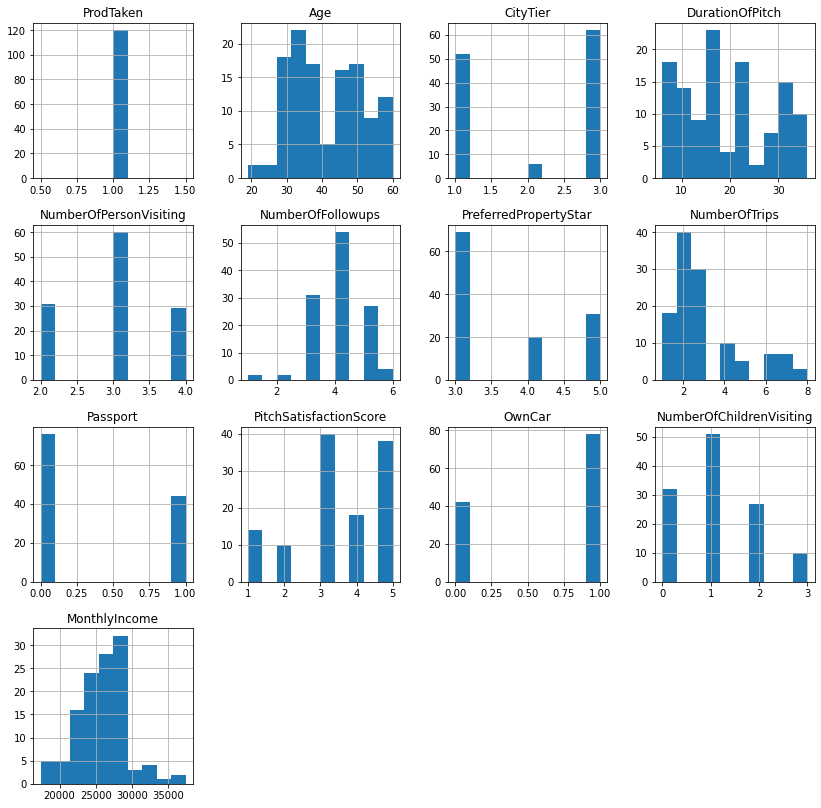

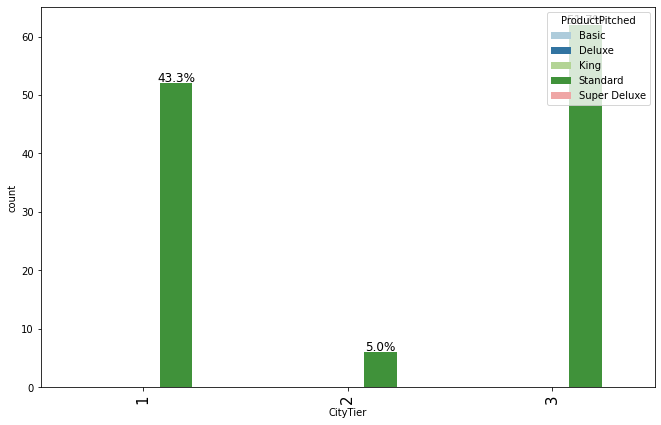

<Figure size 432x288 with 0 Axes>

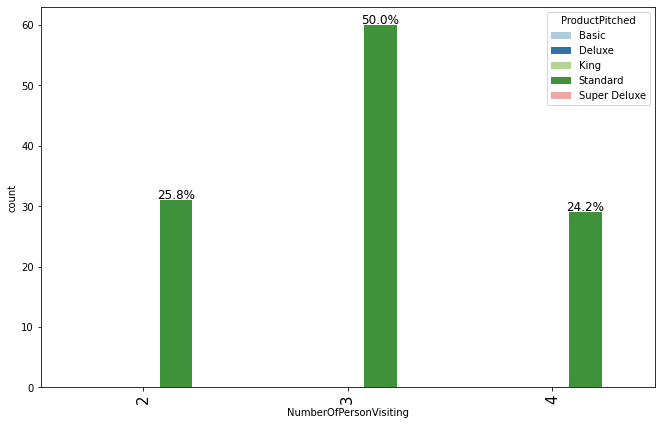

<Figure size 432x288 with 0 Axes>

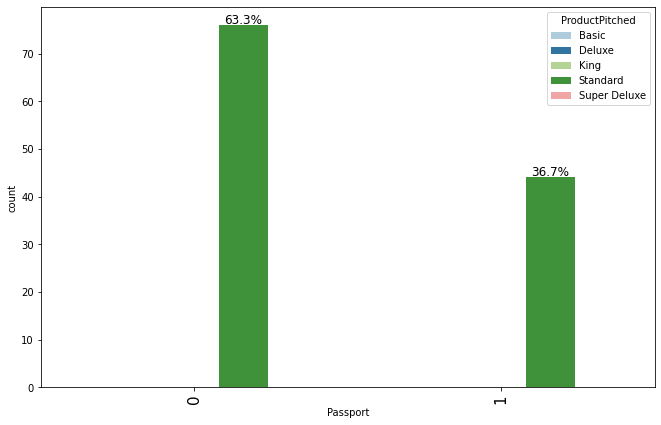

<Figure size 432x288 with 0 Axes>

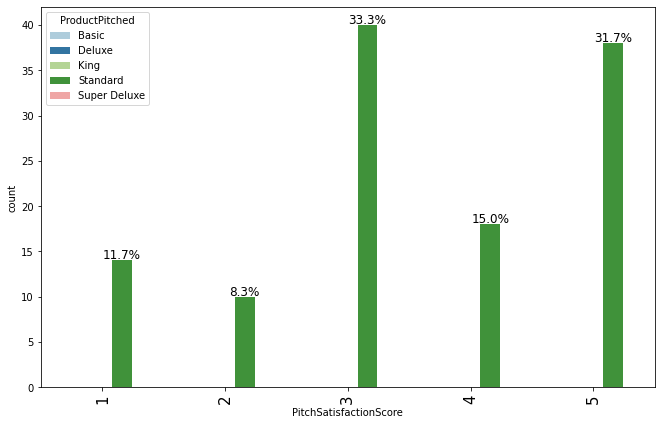

<Figure size 432x288 with 0 Axes>

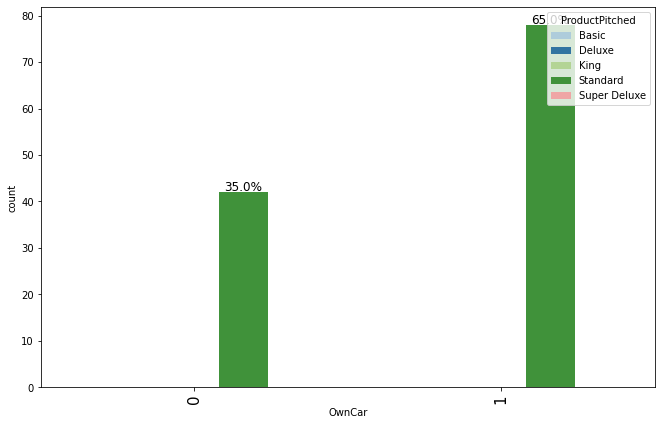

<Figure size 432x288 with 0 Axes>

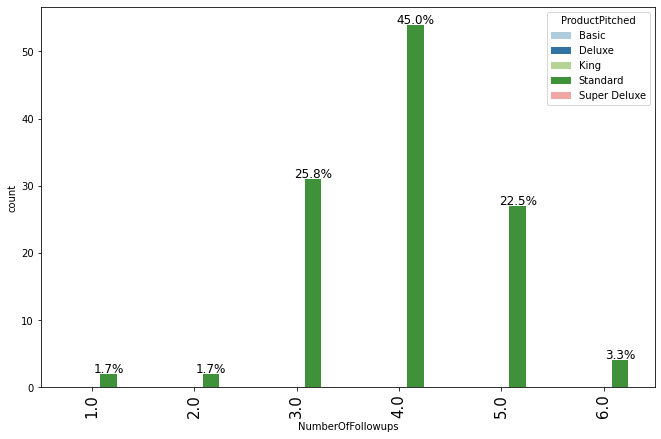

<Figure size 432x288 with 0 Axes>

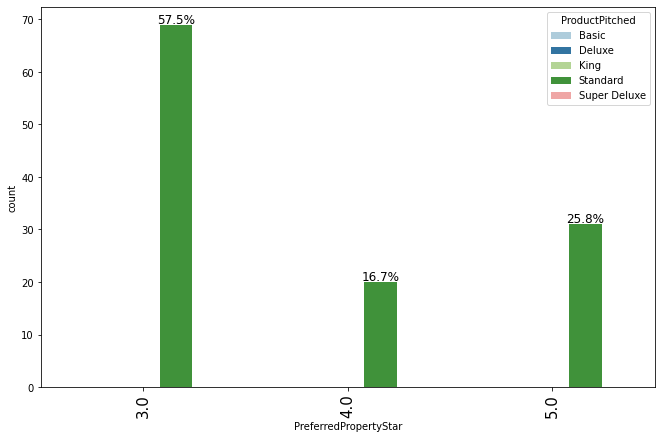

<Figure size 432x288 with 0 Axes>

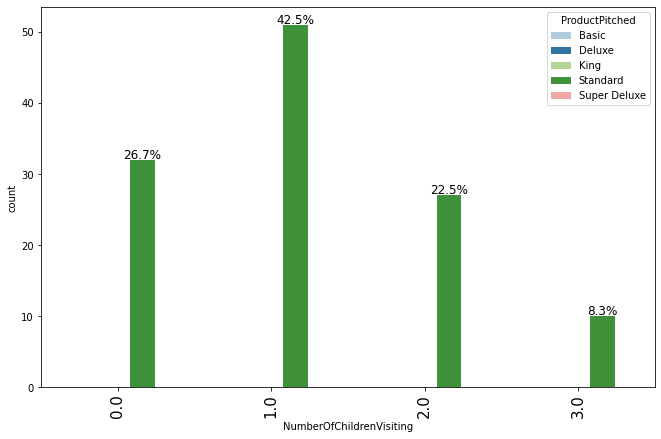

<Figure size 432x288 with 0 Axes>

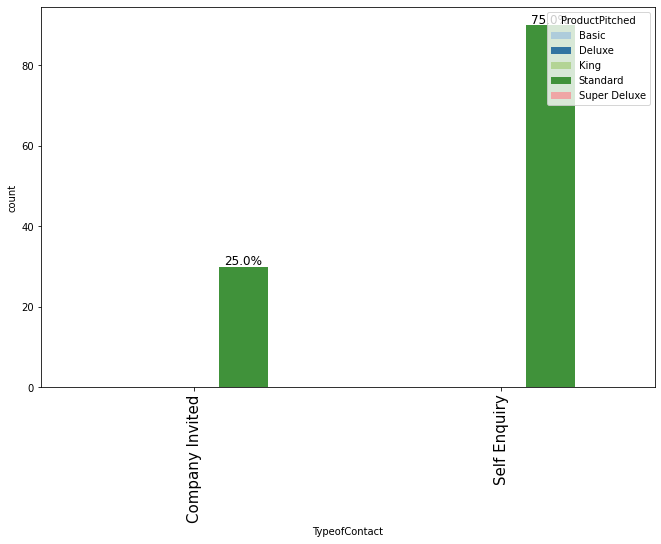

<Figure size 432x288 with 0 Axes>

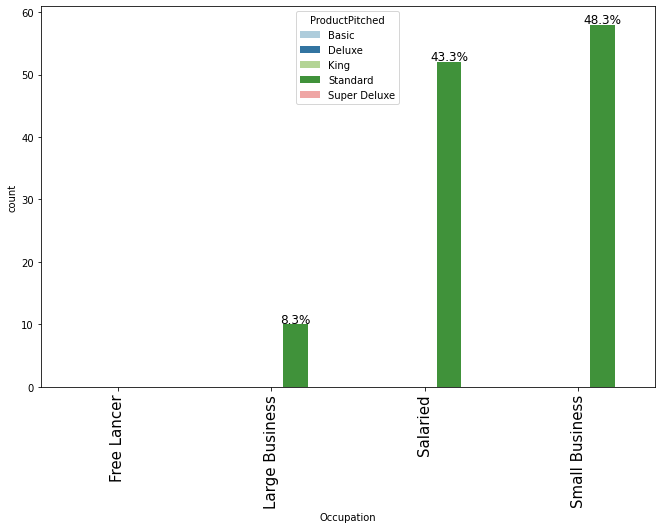

<Figure size 432x288 with 0 Axes>

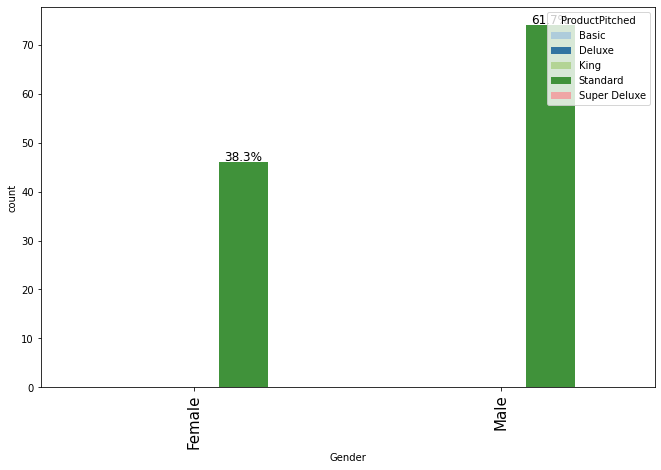

<Figure size 432x288 with 0 Axes>

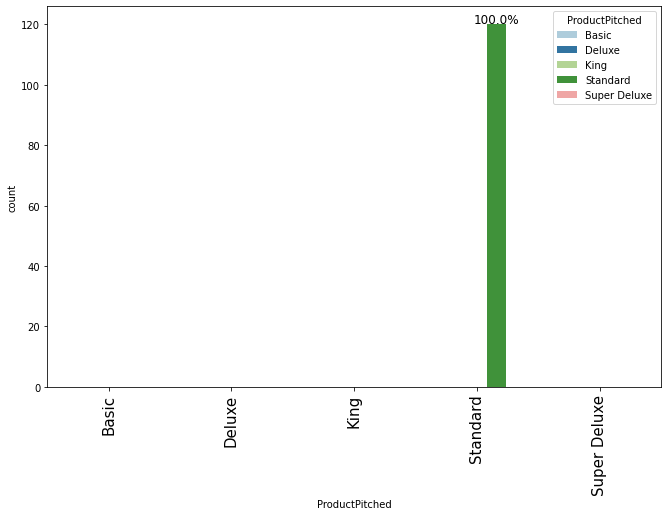

<Figure size 432x288 with 0 Axes>

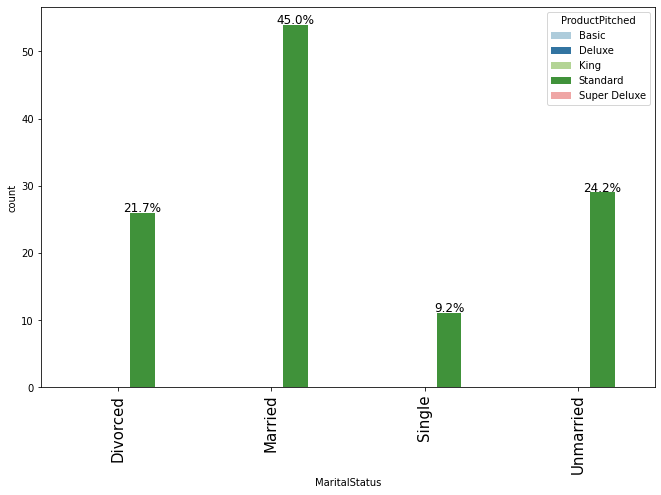

<Figure size 432x288 with 0 Axes>

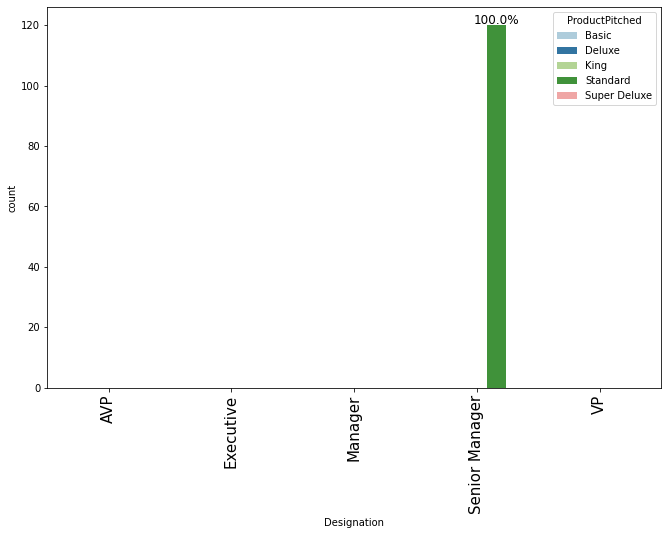

<Figure size 432x288 with 0 Axes>

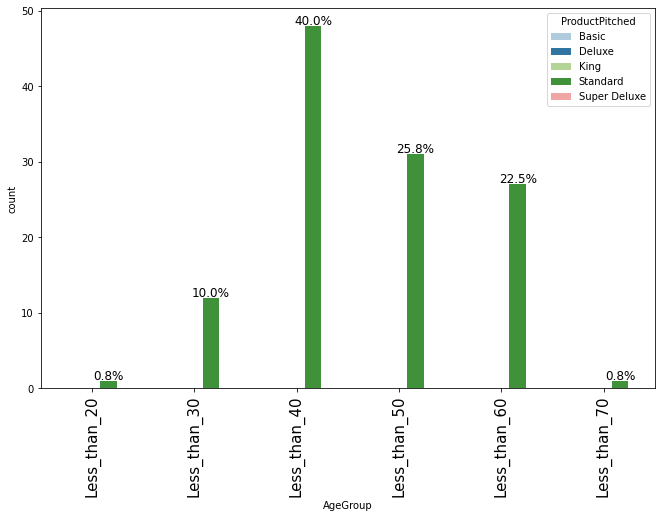

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [89]:
# creating histograms
df_ProdStd.hist(figsize=(14, 14))
plt.show()

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(df_ProdStd, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df_ProdStd, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

<a id='profile_std'> </a>

*[Click to return to TOC](#summary_home)*


#### Observation: Profiling of Customers - Standard Product

* Mostly 35-40 age customers have availed this product and less than 15-25 mins of time is spent in pitching to convince them
* Average of 3 persons are visiting and with an avergae of 1 child visiting
* Monthly income is around 23-30K for these customers, with 48% of them are Small Business owners and 52% of them are from Tier 3 cities
* 75% of the customers have purchased based on Self enquiry and almost 62% of them were Male customers
* 65% of the customers own a car and almost all customers are at Senior Manager level
* Almost 58% of them have preferred 3 start ratings property and mostly they are Married (45%)
* 60% of them hold a passport and remaining without one
* Almost 4 followups are required with 32% of them providing a pitch satsifaction score of 3

---

### Profiling of Customers - Deluxe

In [90]:
df_ProdDel = df[(df["ProductPitched"] == "Deluxe") & df["ProdTaken"].astype("int") == 1]

<IPython.core.display.Javascript object>

In [91]:
df_ProdDel.describe(include="all").T

count unique             top freq          mean  \
ProdTaken                 198.0    NaN             NaN  NaN           1.0   
Age                       198.0    NaN             NaN  NaN     37.636364   
TypeofContact               198      2    Self Enquiry  134           NaN   
CityTier                  198.0    NaN             NaN  NaN      2.414141   
DurationOfPitch           198.0    NaN             NaN  NaN     18.358586   
Occupation                  198      3  Small Business  102           NaN   
Gender                      198      2            Male  132           NaN   
NumberOfPersonVisiting    198.0    NaN             NaN  NaN      2.954545   
NumberOfFollowups         198.0    NaN             NaN  NaN      3.974747   
ProductPitched              198      1          Deluxe  198           NaN   
PreferredPropertyStar     198.0    NaN             NaN  NaN      3.686869   
MaritalStatus               198      4         Married   68           NaN   
NumberOfTrips             198.0    NaN             NaN  NaN      3.691919   
Passport                  198.0    NaN             NaN  NaN      0.505051   
PitchSatisfactionScore    198.0    NaN             NaN  NaN      3.020202   
OwnCar                    198.0    NaN             NaN  NaN       0.59596   
NumberOfChildrenVisiting  198.0    NaN             NaN  NaN      1.191919   
Designation                 198      1         Manager  198           NaN   
MonthlyIncome             198.0    NaN             NaN  NaN  23059.919192   
AgeGroup                    198      4    Less_than_40  103           NaN   

                                  std      min       25%      50%      75%  \
ProdTaken                         0.0      1.0       1.0      1.0      1.0   
Age                          8.444449     21.0      32.0     36.0     44.0   
TypeofContact                     NaN      NaN       NaN      NaN      NaN   
CityTier                      0.91252      1.0       1.0      3.0      3.0   
DurationOfPitch              8.878635      6.0      12.0     15.0     26.0   
Occupation                        NaN      NaN       NaN      NaN      NaN   
Gender                            NaN      NaN       NaN      NaN      NaN   
NumberOfPersonVisiting       0.707433      2.0       2.0      3.0      3.0   
NumberOfFollowups            1.049229      1.0       3.0      4.0      5.0   
ProductPitched                    NaN      NaN       NaN      NaN      NaN   
PreferredPropertyStar        0.856702      3.0       3.0      3.0      5.0   
MaritalStatus                     NaN      NaN       NaN      NaN      NaN   
NumberOfTrips                2.015432      1.0       2.0      3.0      5.0   
Passport                     0.501242      0.0       0.0      1.0      1.0   
PitchSatisfactionScore       1.282287      1.0       2.0      3.0      4.0   
OwnCar                       0.491949      0.0       0.0      1.0      1.0   
NumberOfChildrenVisiting     0.839105      0.0       1.0      1.0      2.0   
Designation                       NaN      NaN       NaN      NaN      NaN   
MonthlyIncome             3508.493985  17086.0  20764.25  22904.5  24479.0   
AgeGroup                          NaN      NaN       NaN      NaN      NaN   

                              max  
ProdTaken                     1.0  
Age                          59.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch              36.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37376.5  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

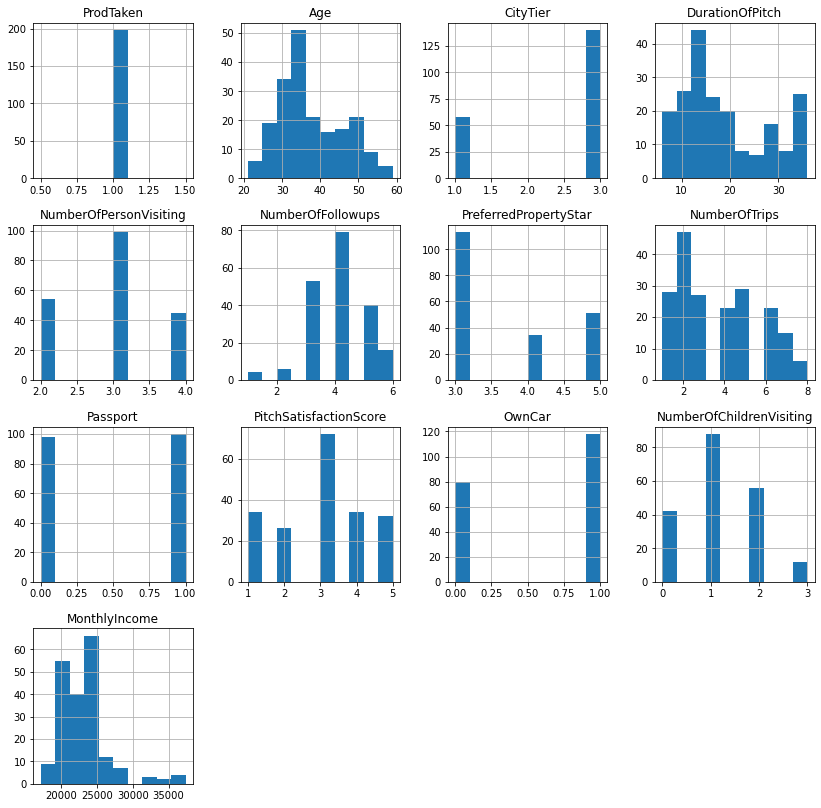

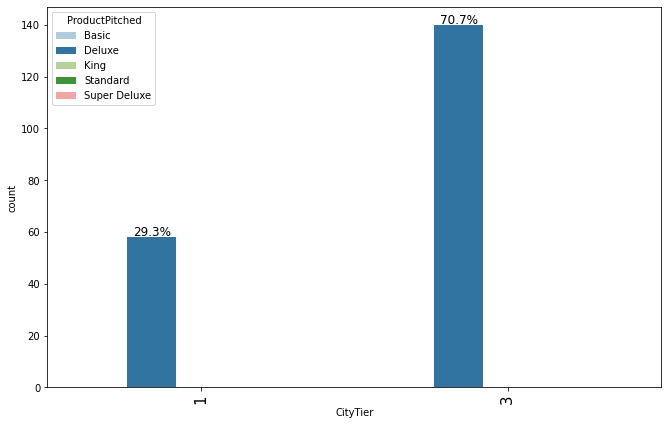

<Figure size 432x288 with 0 Axes>

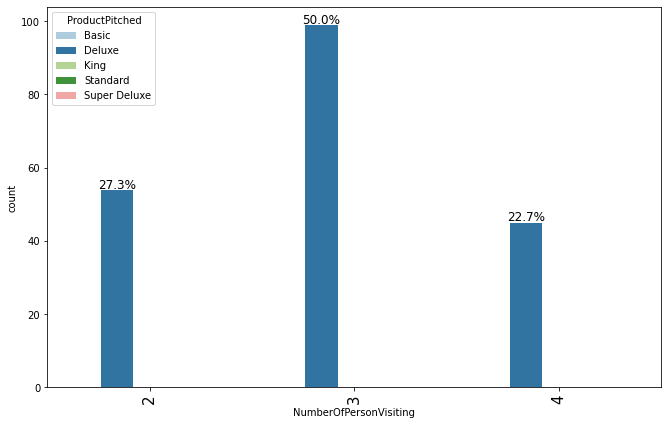

<Figure size 432x288 with 0 Axes>

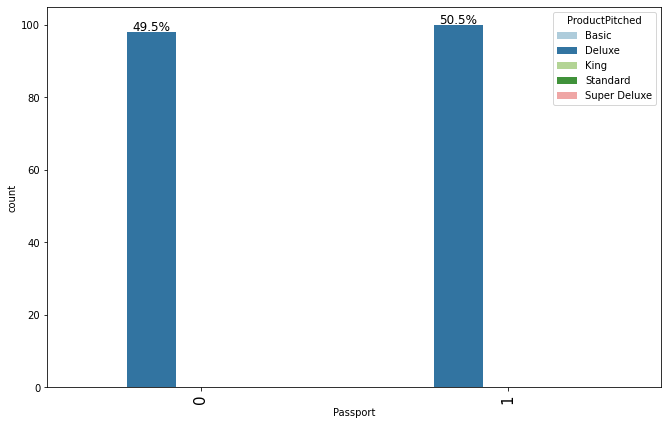

<Figure size 432x288 with 0 Axes>

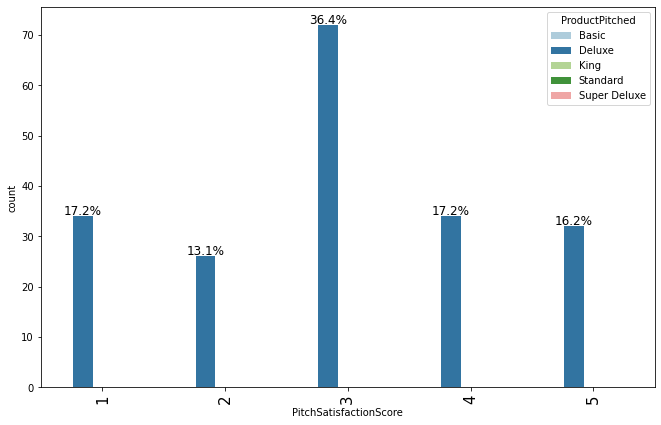

<Figure size 432x288 with 0 Axes>

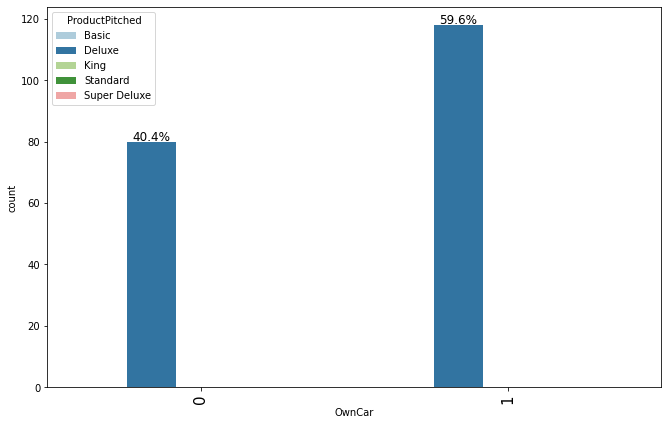

<Figure size 432x288 with 0 Axes>

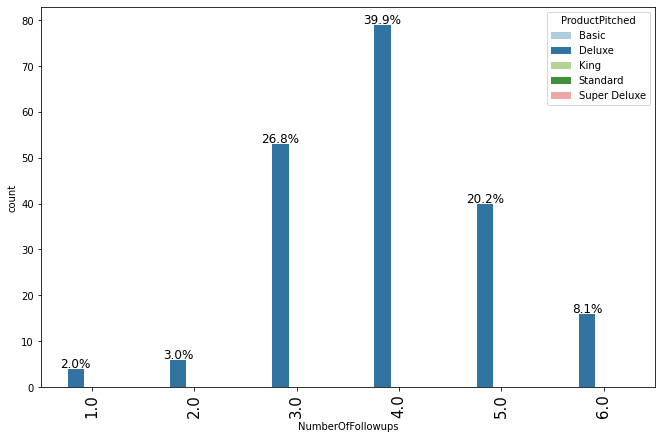

<Figure size 432x288 with 0 Axes>

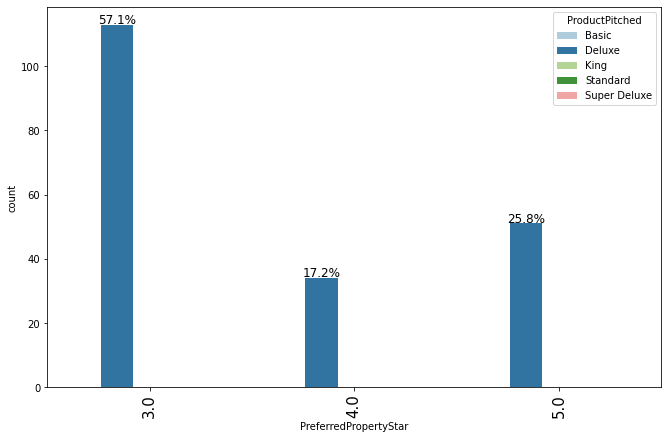

<Figure size 432x288 with 0 Axes>

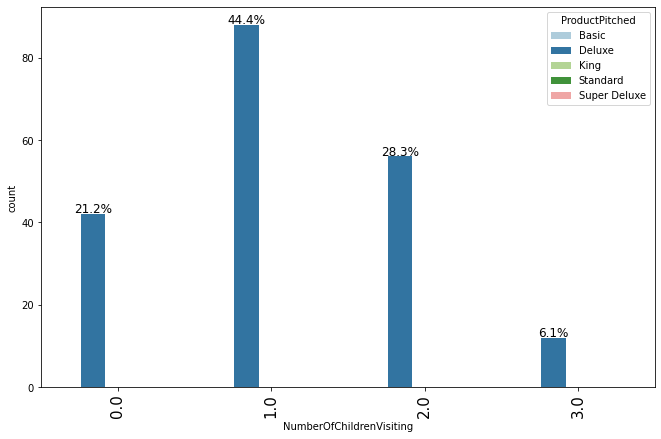

<Figure size 432x288 with 0 Axes>

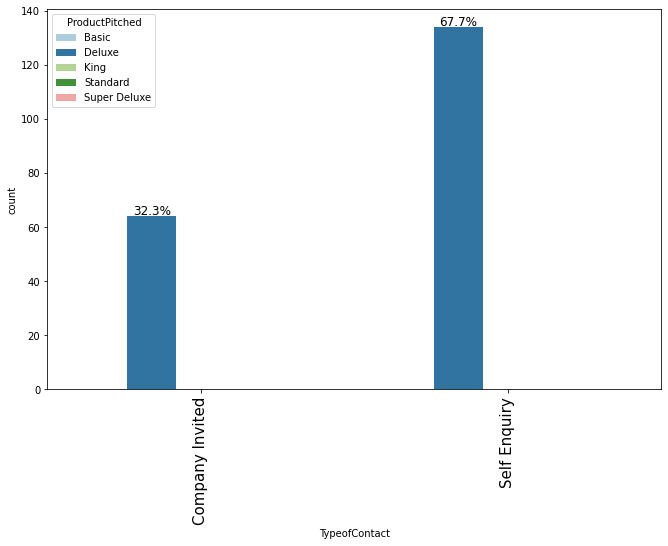

<Figure size 432x288 with 0 Axes>

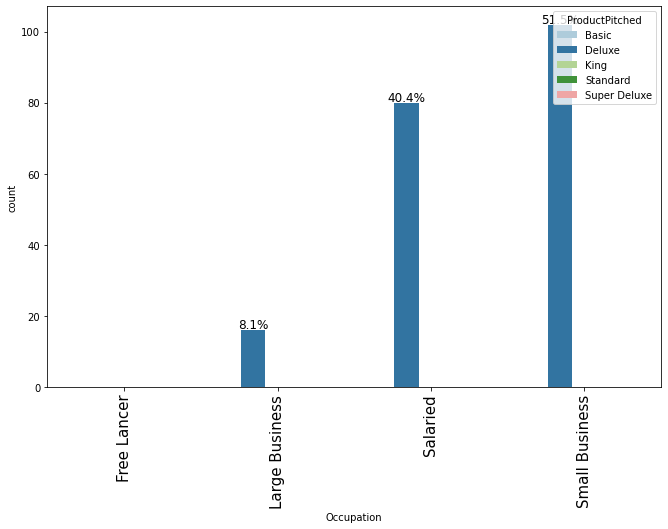

<Figure size 432x288 with 0 Axes>

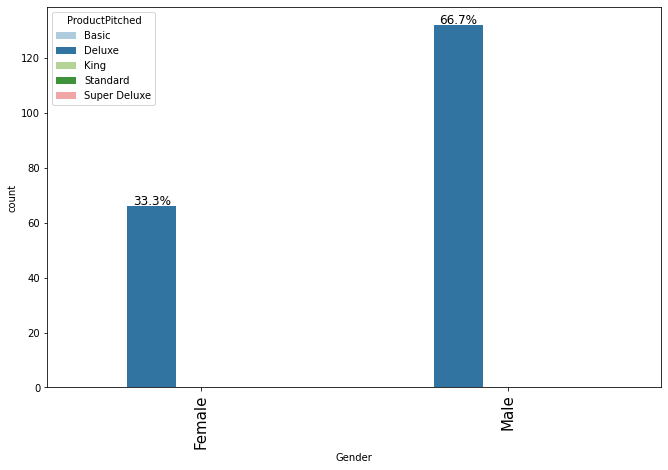

<Figure size 432x288 with 0 Axes>

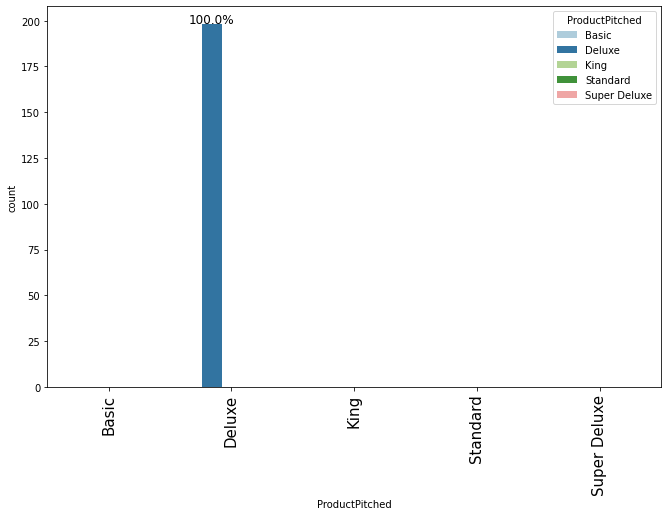

<Figure size 432x288 with 0 Axes>

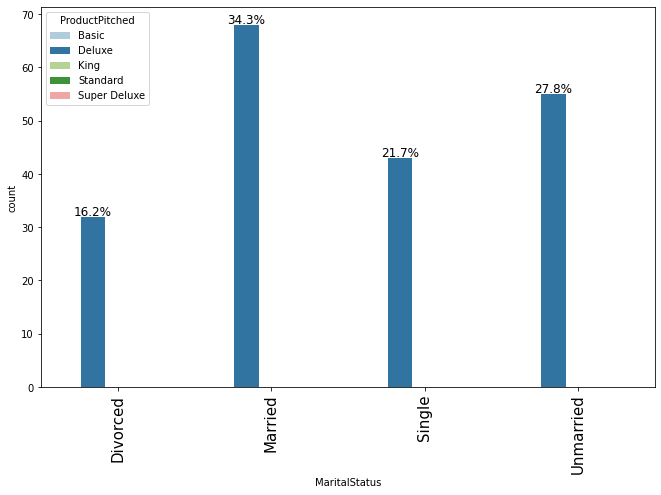

<Figure size 432x288 with 0 Axes>

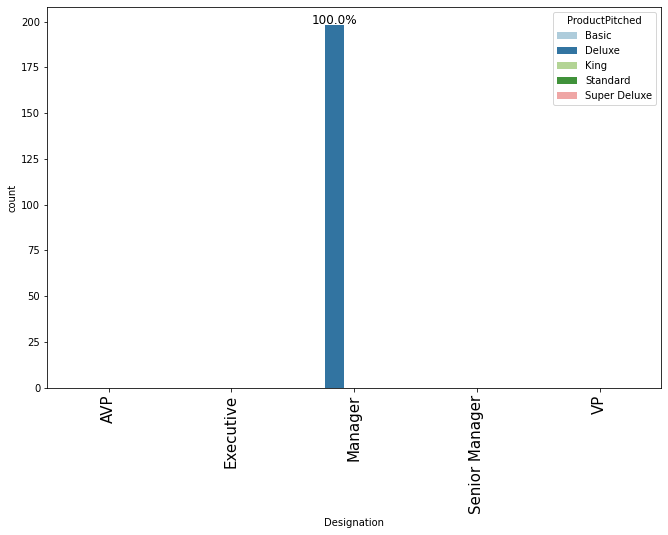

<Figure size 432x288 with 0 Axes>

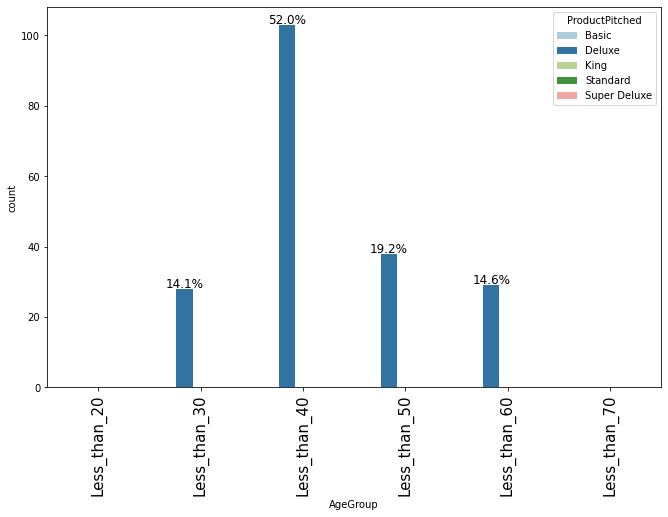

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [92]:
# creating histograms
df_ProdDel.hist(figsize=(14, 14))
plt.show()

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(df_ProdDel, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df_ProdDel, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

<a id='profile_deluxe'> </a>

*[Click to return to TOC](#summary_home)*


#### Observation: Profiling of Customers - Deluxe

* Mostly 25-30 age customers have availed this product and around 10-20 mins of time is spent in pitching to convince them
* Average of 3 persons are visiting and with an avergae of 1 child visiting
* Monthly income is around 21-26K for these customers, with 52% of them are Small Business customers and 70.7% of them are from Tier 3 cities
* 68% of the customers have purchased based on Self enquiry and almost 67% of them were Male customers
* 60% of the customers own a car and almost all customers are at Manager level
* Almost 57% of them have preferred 3 start ratings property and mostly they are either Married (34%) or UnMarried (28%)
* Almost 50% of people hold a passport and remaining without one
* Almost 4 followups are required with 36% of them providing a pitch satsifaction score of 3
* 70.6% of the customers are from Tier 3 city
* Pitch Satisfaction score is spread across 1-5 ratings with 3 being the highest

### Profiling of Customers - Super Deluxe

In [93]:
df_ProdSupDeluxe = df[
    (df["ProductPitched"] == "Super Deluxe") & df["ProdTaken"].astype("int") == 1
]

<IPython.core.display.Javascript object>

In [94]:
df_ProdSupDeluxe.describe(include="all").T

count unique              top freq         mean  \
ProdTaken                 16.0    NaN              NaN  NaN          1.0   
Age                       16.0    NaN              NaN  NaN       44.125   
TypeofContact               16      2  Company Invited   12          NaN   
CityTier                  16.0    NaN              NaN  NaN         2.75   
DurationOfPitch           16.0    NaN              NaN  NaN        19.75   
Occupation                  16      2         Salaried   12          NaN   
Gender                      16      2             Male   12          NaN   
NumberOfPersonVisiting    16.0    NaN              NaN  NaN         2.75   
NumberOfFollowups         16.0    NaN              NaN  NaN          3.0   
ProductPitched              16      1     Super Deluxe   16          NaN   
PreferredPropertyStar     16.0    NaN              NaN  NaN          3.5   
MaritalStatus               16      3           Single    8          NaN   
NumberOfTrips             16.0    NaN              NaN  NaN       3.6875   
Passport                  16.0    NaN              NaN  NaN        0.625   
PitchSatisfactionScore    16.0    NaN              NaN  NaN         3.75   
OwnCar                    16.0    NaN              NaN  NaN          1.0   
NumberOfChildrenVisiting  16.0    NaN              NaN  NaN         1.25   
Designation                 16      1              AVP   16          NaN   
MonthlyIncome             16.0    NaN              NaN  NaN  29821.28125   
AgeGroup                    16      3     Less_than_50   13          NaN   

                                  std      min      25%      50%       75%  \
ProdTaken                         0.0      1.0      1.0      1.0       1.0   
Age                          5.188127     39.0    40.75     42.0     46.25   
TypeofContact                     NaN      NaN      NaN      NaN       NaN   
CityTier                      0.68313      1.0      3.0      3.0       3.0   
DurationOfPitch               7.28011      8.0    15.75     19.0      22.5   
Occupation                        NaN      NaN      NaN      NaN       NaN   
Gender                            NaN      NaN      NaN      NaN       NaN   
NumberOfPersonVisiting        0.68313      2.0      2.0      3.0       3.0   
NumberOfFollowups            1.788854      1.0     1.75      2.5      4.25   
ProductPitched                    NaN      NaN      NaN      NaN       NaN   
PreferredPropertyStar        0.730297      3.0      3.0      3.0       4.0   
MaritalStatus                     NaN      NaN      NaN      NaN       NaN   
NumberOfTrips                  2.5224      1.0     1.75      2.5       6.0   
Passport                          0.5      0.0      0.0      1.0       1.0   
PitchSatisfactionScore            1.0      3.0      3.0      3.0       5.0   
OwnCar                            0.0      1.0      1.0      1.0       1.0   
NumberOfChildrenVisiting     0.856349      0.0      1.0      1.0       2.0   
Designation                       NaN      NaN      NaN      NaN       NaN   
MonthlyIncome             3807.962185  21151.0  28129.5  29802.5  31997.25   
AgeGroup                          NaN      NaN      NaN      NaN       NaN   

                              max  
ProdTaken                     1.0  
Age                          56.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch              31.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 8.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37376.5  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

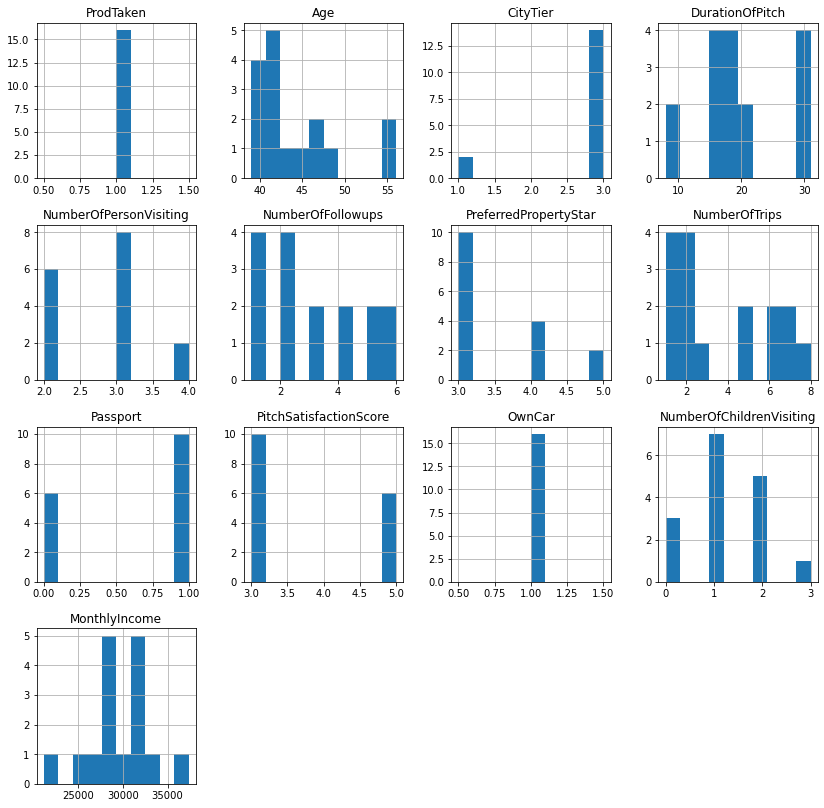

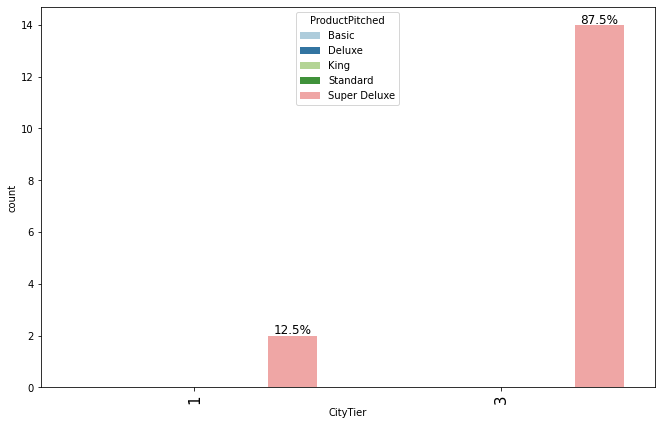

<Figure size 432x288 with 0 Axes>

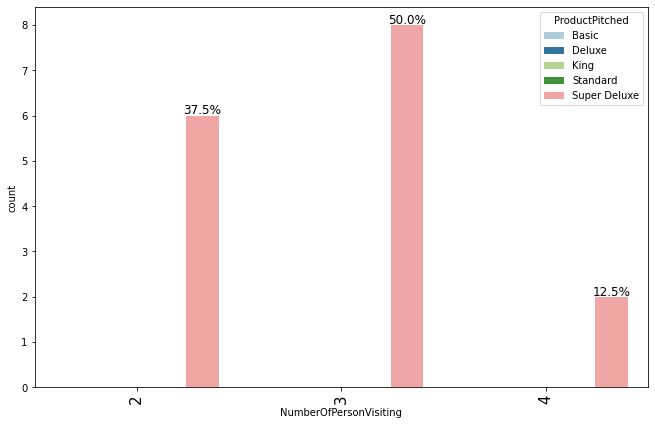

<Figure size 432x288 with 0 Axes>

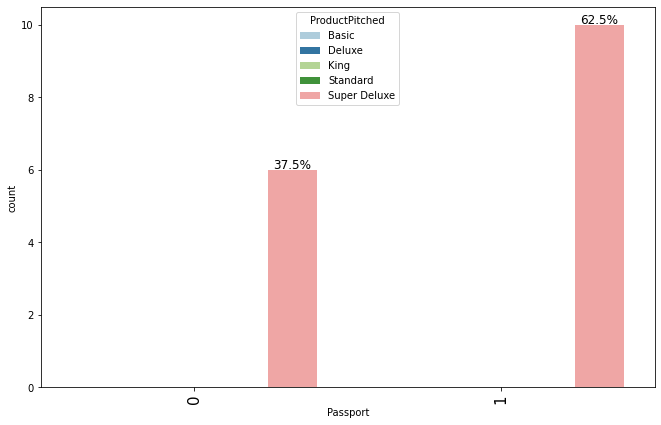

<Figure size 432x288 with 0 Axes>

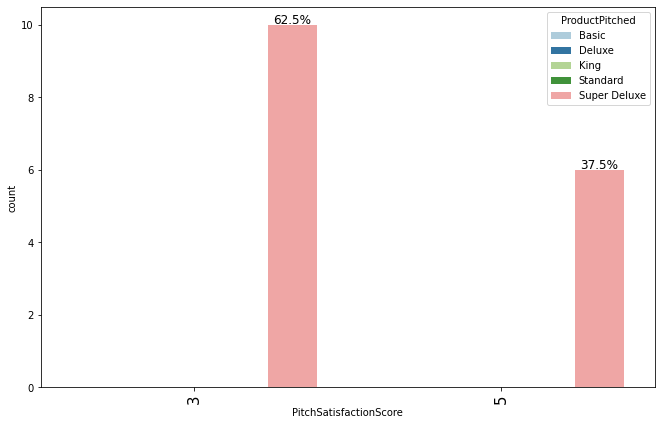

<Figure size 432x288 with 0 Axes>

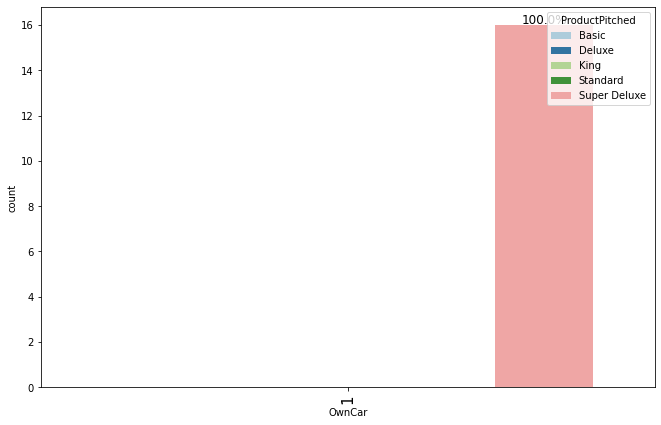

<Figure size 432x288 with 0 Axes>

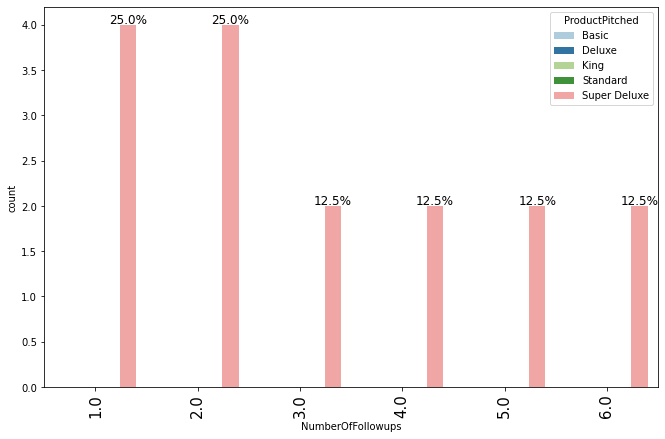

<Figure size 432x288 with 0 Axes>

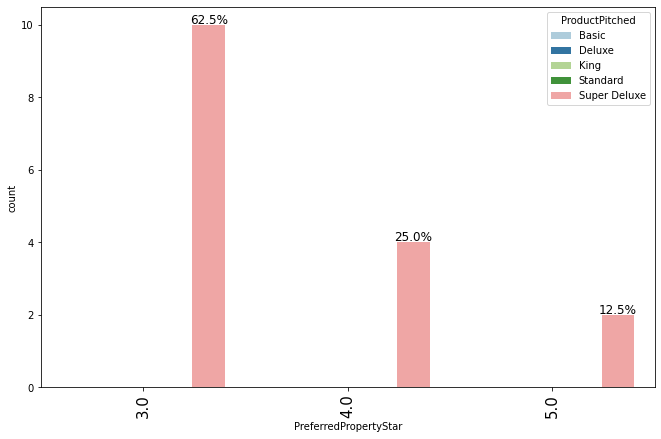

<Figure size 432x288 with 0 Axes>

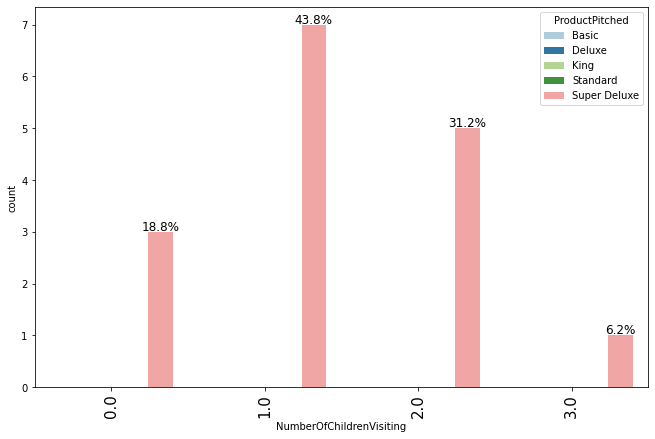

<Figure size 432x288 with 0 Axes>

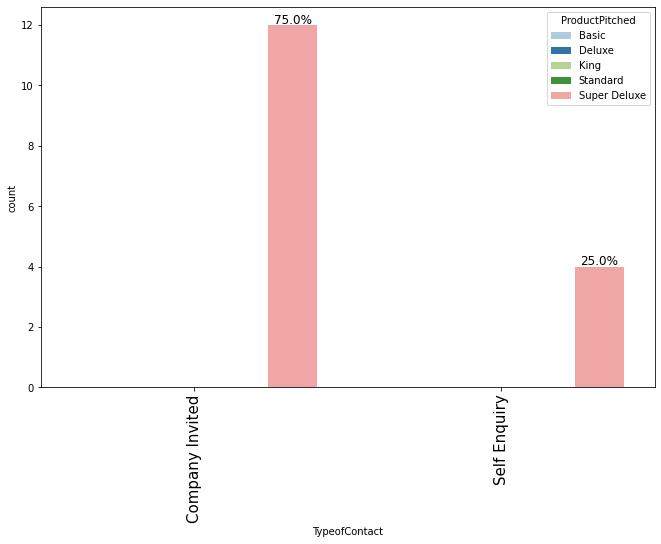

<Figure size 432x288 with 0 Axes>

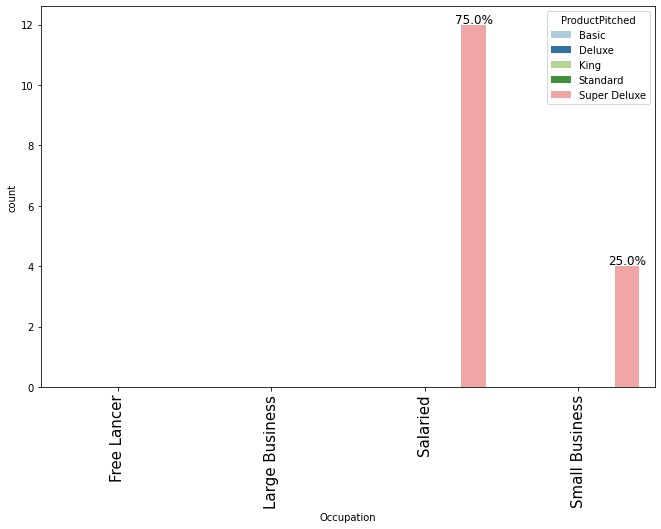

<Figure size 432x288 with 0 Axes>

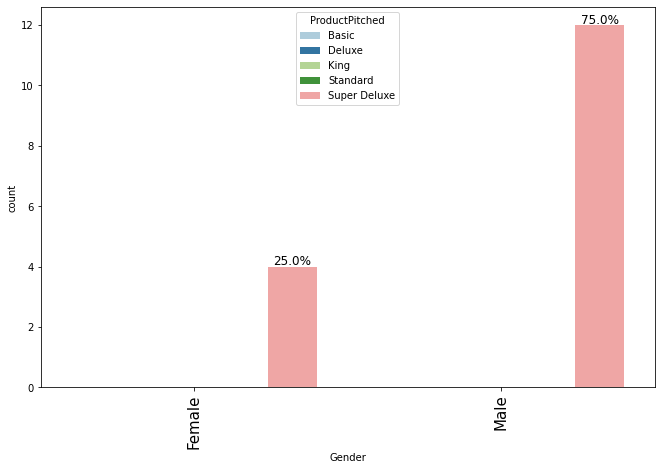

<Figure size 432x288 with 0 Axes>

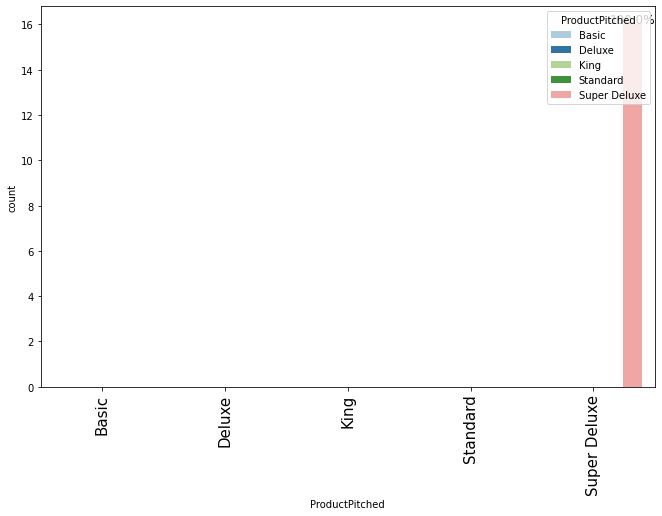

<Figure size 432x288 with 0 Axes>

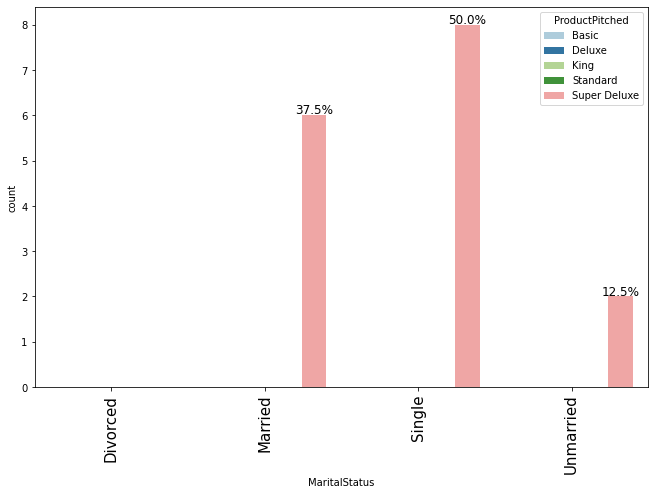

<Figure size 432x288 with 0 Axes>

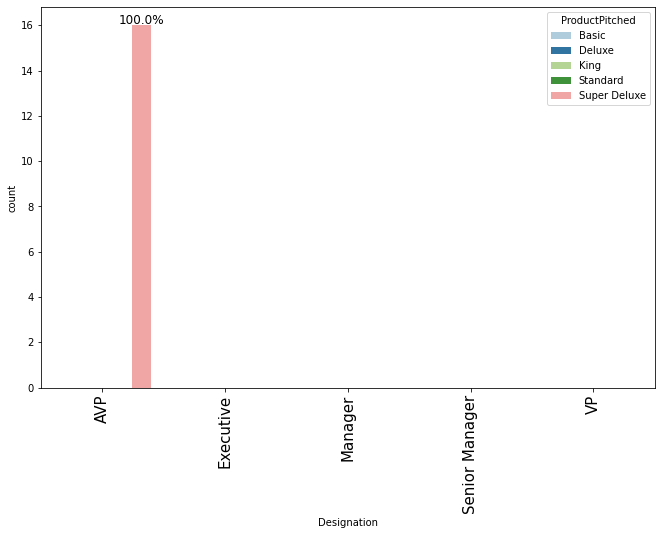

<Figure size 432x288 with 0 Axes>

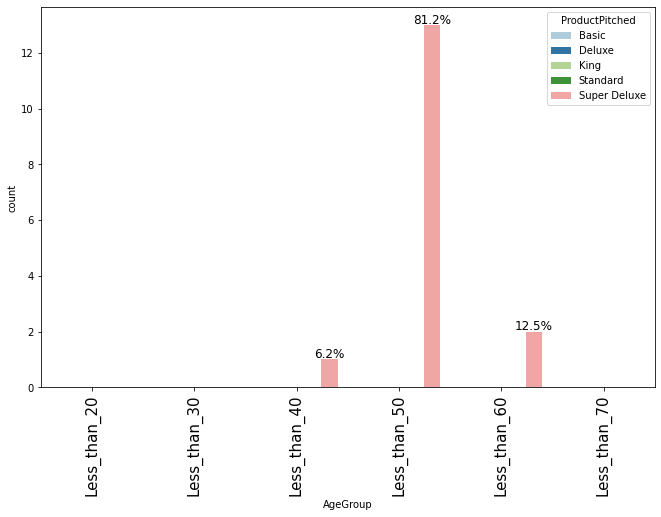

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [95]:
# creating histograms
df_ProdSupDeluxe.hist(figsize=(14, 14))
plt.show()
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(df_ProdSupDeluxe, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df_ProdSupDeluxe, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

<a id='profile_sdeluxe'> </a>

*[Click to return to TOC](#summary_home)*


#### Observation: Profiling of Customers - Super Deluxe

* Mostly 45-30 age customers have availed this product and around 15-20 mins, sometimes 30 mins of time is spent in pitching to convince them
* Average of 3 persons are visiting and with an avergae of 1 child visiting
* Monthly income is around 25-35K for these customers, with 75% of them are Salaried customers and 87.5% of them are from Tier 3 cities
* 75% of the customers have purchased based on Company Invited and almost 75% of them were Male customers
* All of the customers own a car and almost all customers are at AVP level
* Almost 57% of them have preferred 3 start ratings property and mostly they are either Married (38%) or Single (50%)
* Almost 62.5% of people hold a passport and remaining without one
* Almost 1-2 followups are required with 63% of them providing a pitch satsifaction score of 3
* 87.5% of the customers are from Tier 3 city
* Pitch Satisfaction score has been very good for this product with mostly 3 & 5. There are no 1-2 ratings for this product

### Profiling of Customers - King

In [96]:
df_ProdKing = df[(df["ProductPitched"] == "King") & df["ProdTaken"].astype("int") == 1]

<IPython.core.display.Javascript object>

In [97]:
df_ProdKing.describe(include="all").T

count unique             top freq       mean  \
ProdTaken                 20.0    NaN             NaN  NaN        1.0   
Age                       20.0    NaN             NaN  NaN       48.9   
TypeofContact               20      1    Self Enquiry   20        NaN   
CityTier                  20.0    NaN             NaN  NaN        1.8   
DurationOfPitch           20.0    NaN             NaN  NaN       10.5   
Occupation                  20      3  Small Business   12        NaN   
Gender                      20      2          Female   12        NaN   
NumberOfPersonVisiting    20.0    NaN             NaN  NaN        2.9   
NumberOfFollowups         20.0    NaN             NaN  NaN        4.3   
ProductPitched              20      1            King   20        NaN   
PreferredPropertyStar     20.0    NaN             NaN  NaN        3.6   
MaritalStatus               20      3          Single    8        NaN   
NumberOfTrips             20.0    NaN             NaN  NaN       3.35   
Passport                  20.0    NaN             NaN  NaN        0.6   
PitchSatisfactionScore    20.0    NaN             NaN  NaN        3.3   
OwnCar                    20.0    NaN             NaN  NaN        0.9   
NumberOfChildrenVisiting  20.0    NaN             NaN  NaN       1.35   
Designation                 20      1              VP   20        NaN   
MonthlyIncome             20.0    NaN             NaN  NaN  34295.725   
AgeGroup                    20      3    Less_than_60   12        NaN   

                                  std      min       25%      50%      75%  \
ProdTaken                         0.0      1.0       1.0      1.0      1.0   
Age                          9.618513     27.0      42.0     52.5     56.0   
TypeofContact                     NaN      NaN       NaN      NaN      NaN   
CityTier                     1.005249      1.0       1.0      1.0      3.0   
DurationOfPitch              4.135851      8.0       8.0      9.0      9.0   
Occupation                        NaN      NaN       NaN      NaN      NaN   
Gender                            NaN      NaN       NaN      NaN      NaN   
NumberOfPersonVisiting       0.718185      2.0       2.0      3.0      3.0   
NumberOfFollowups            1.128576      3.0       3.0      4.0      5.0   
ProductPitched                    NaN      NaN       NaN      NaN      NaN   
PreferredPropertyStar        0.680557      3.0       3.0      3.5      4.0   
MaritalStatus                     NaN      NaN       NaN      NaN      NaN   
NumberOfTrips                1.785173      1.0       2.0      3.0     3.25   
Passport                     0.502625      0.0       0.0      1.0      1.0   
PitchSatisfactionScore       1.218282      1.0       3.0      3.0      4.0   
OwnCar                       0.307794      0.0       1.0      1.0      1.0   
NumberOfChildrenVisiting     0.812728      0.0       1.0      1.0      2.0   
Designation                       NaN      NaN       NaN      NaN      NaN   
MonthlyIncome             5331.953768  17517.0  34470.25  34859.0  37376.5   
AgeGroup                          NaN      NaN       NaN      NaN      NaN   

                              max  
ProdTaken                     1.0  
Age                          59.0  
TypeofContact                 NaN  
CityTier                      3.0  
DurationOfPitch              19.0  
Occupation                    NaN  
Gender                        NaN  
NumberOfPersonVisiting        4.0  
NumberOfFollowups             6.0  
ProductPitched                NaN  
PreferredPropertyStar         5.0  
MaritalStatus                 NaN  
NumberOfTrips                 7.0  
Passport                      1.0  
PitchSatisfactionScore        5.0  
OwnCar                        1.0  
NumberOfChildrenVisiting      3.0  
Designation                   NaN  
MonthlyIncome             37376.5  
AgeGroup                      NaN

<IPython.core.display.Javascript object>

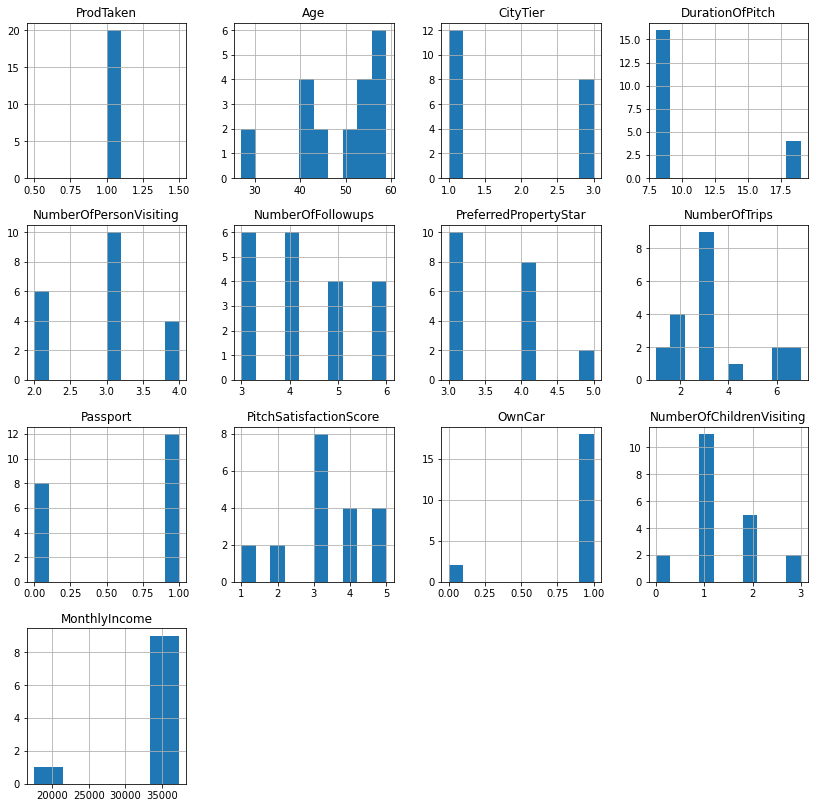

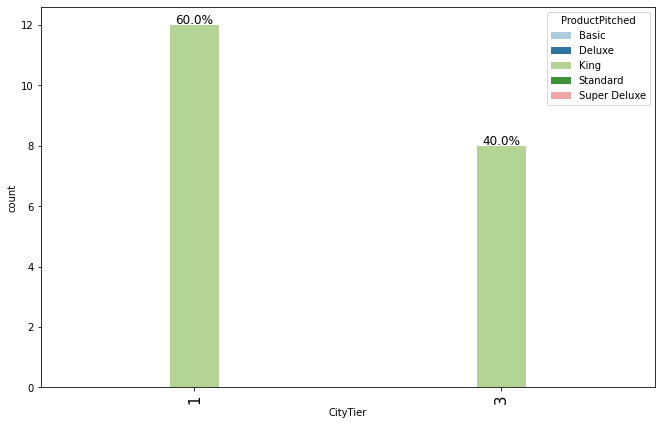

<Figure size 432x288 with 0 Axes>

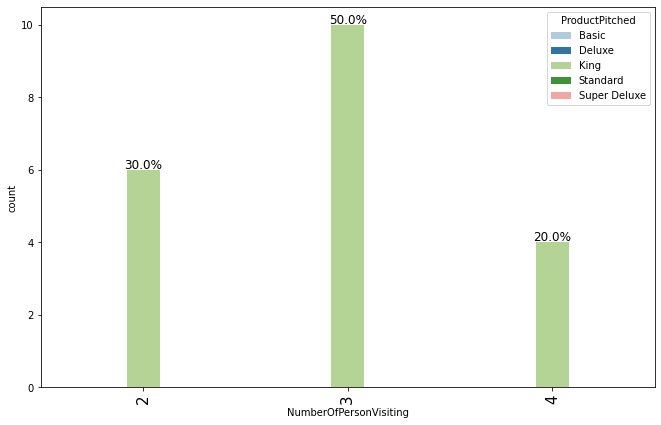

<Figure size 432x288 with 0 Axes>

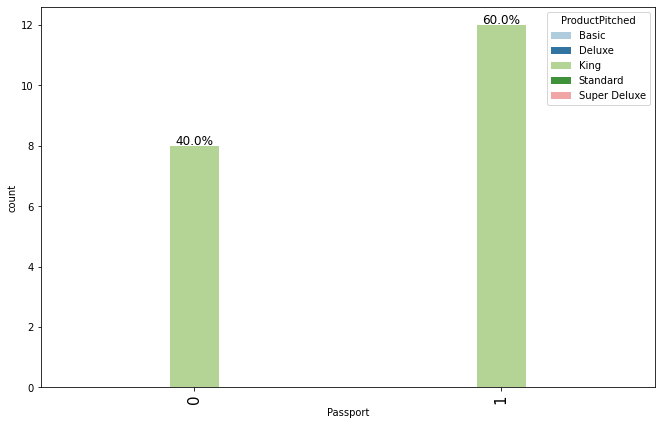

<Figure size 432x288 with 0 Axes>

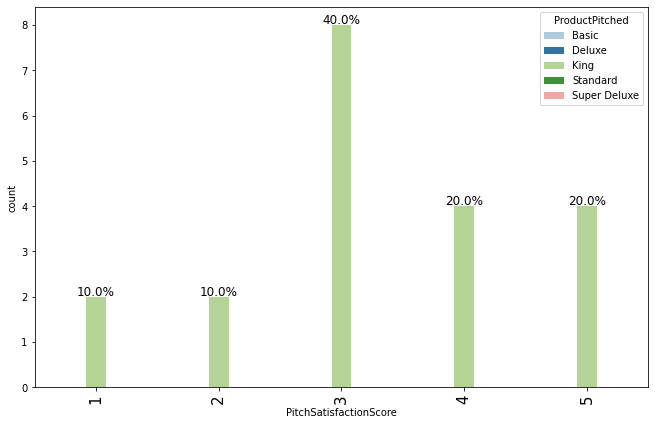

<Figure size 432x288 with 0 Axes>

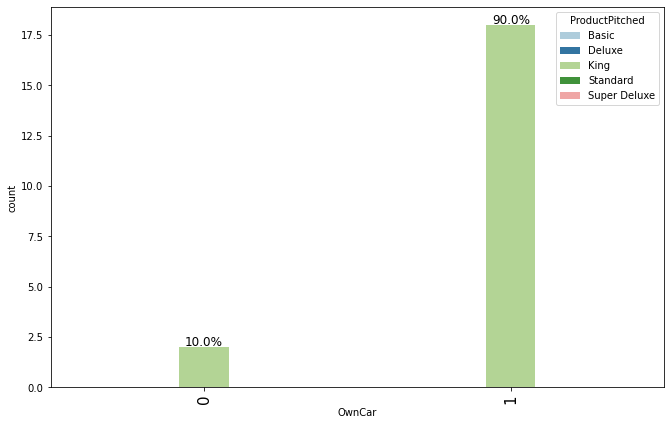

<Figure size 432x288 with 0 Axes>

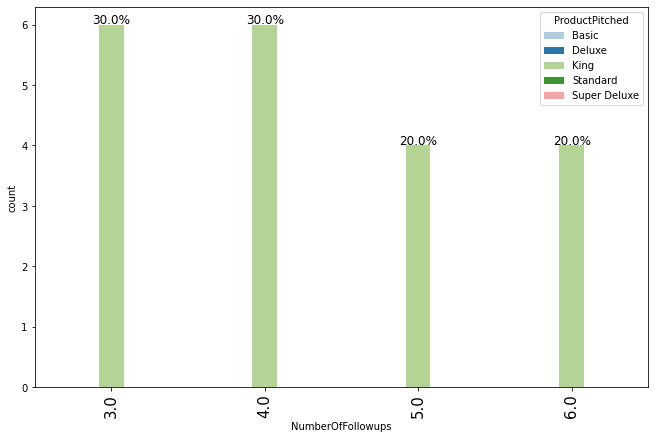

<Figure size 432x288 with 0 Axes>

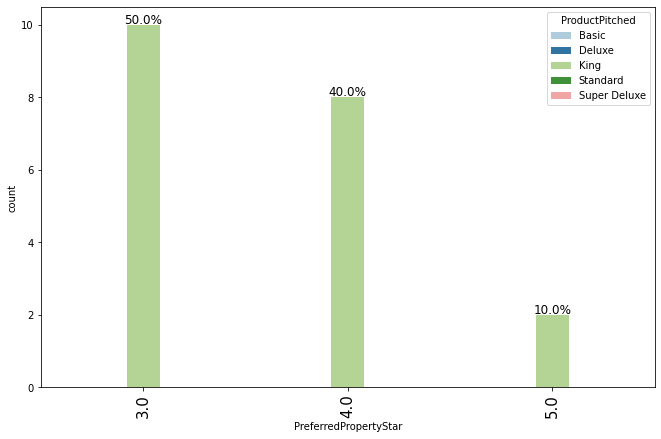

<Figure size 432x288 with 0 Axes>

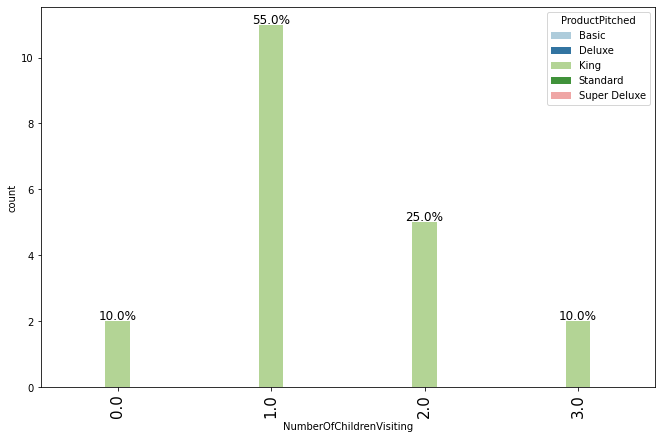

<Figure size 432x288 with 0 Axes>

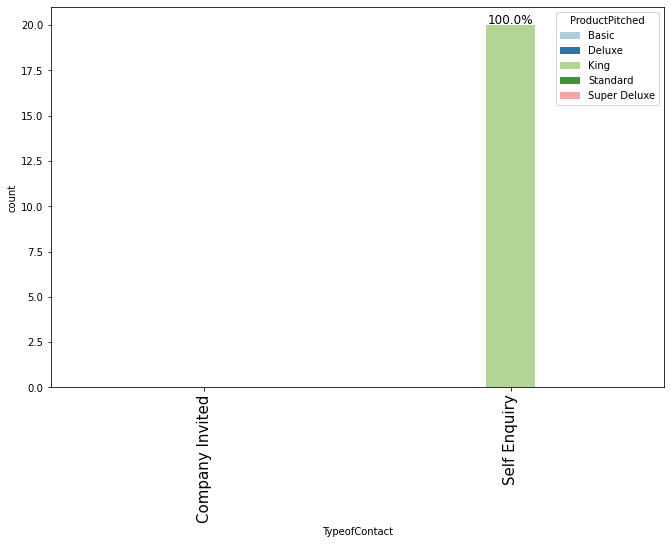

<Figure size 432x288 with 0 Axes>

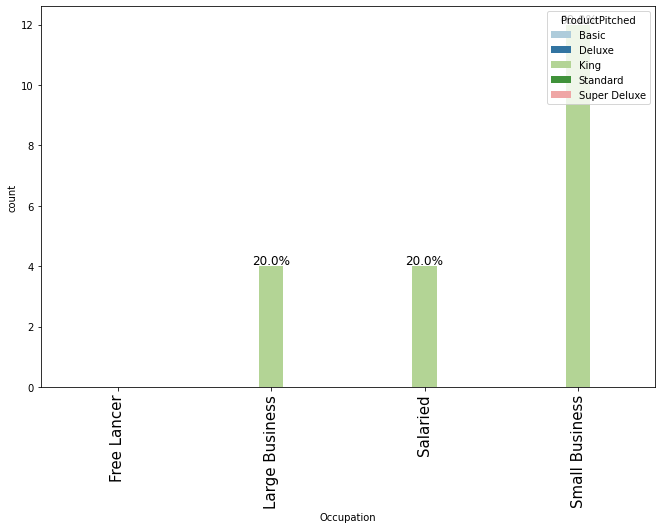

<Figure size 432x288 with 0 Axes>

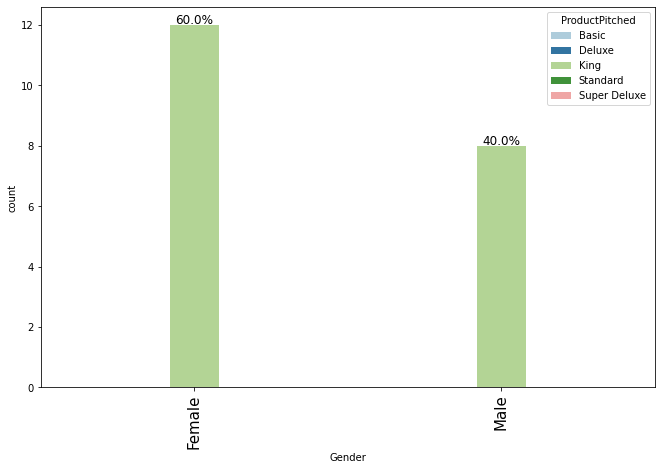

<Figure size 432x288 with 0 Axes>

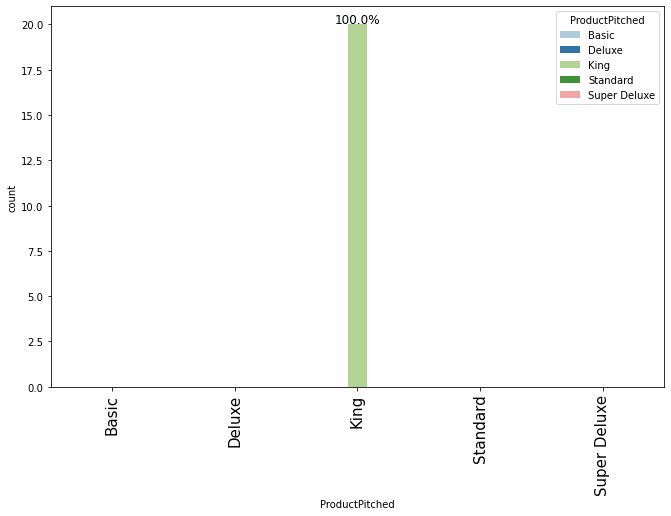

<Figure size 432x288 with 0 Axes>

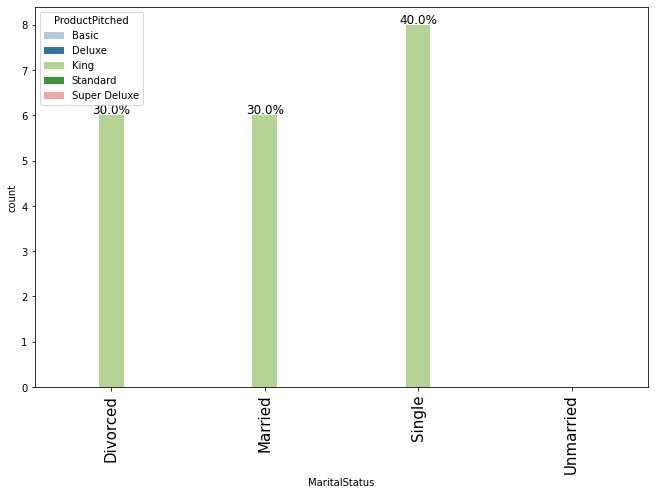

<Figure size 432x288 with 0 Axes>

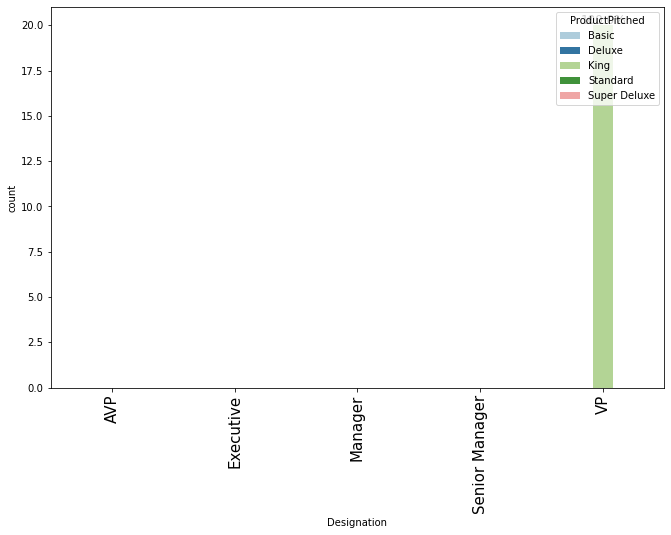

<Figure size 432x288 with 0 Axes>

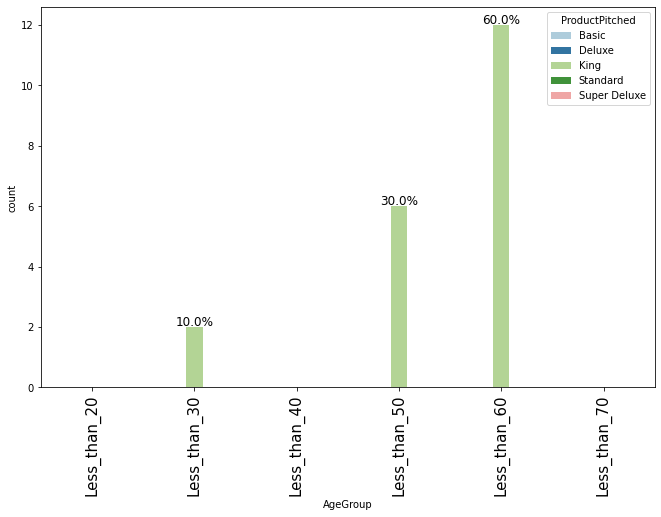

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [98]:
# creating histograms
df_ProdKing.hist(figsize=(14, 14))
plt.show()
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(df_ProdKing, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    labeled_barplot(df_ProdKing, cols, perc=True, n=10, hueCol="ProductPitched")
    plt.tight_layout()

<a id='profile_king'> </a>

*[Click to return to TOC](#summary_home)*


#### Observation: Profiling of Customers - King

* Mostly 50-60 age customers have availed this product and around 8-20 mins of time is spent in pitching to convince them
* Average of 3 persons are visiting and with an avergae of 1 child visiting
* Monthly income is around 35K+ for these customers, with most of them are Small Business customers and 60% of them are from Tier 1 cities
* Almost all customers have purchased based on Self Inquiry and almost 60% of them were Female customers
* A90% customers own a car and all customers are at VP level
* Almost 50% of them have preferred 3 start ratings property and mostly they are Single (40%)
* Almost 60% of people hold a passport and remaining without one
* Almost 3-6 followups are required with 63% of them providing a pitch satsifaction score of 3
* 60% of the customers are from Tier 1 city
* Pitch Satisfaction score has been ranging from 1-5 for this product

---

<a id="model"> </a>

## Model Building
---

<a id='evaluation1'></a> 

*[Click to return to TOC](#summary_home)*



### Model evaluation criterion:

### Model can make wrong predictions as:

1. Predicting a customer will apply for the product but in reality the customer would not apply - Loss of resources

2. Predicting a customer will not apply for the product but in reality the customer would have applied for the product. - Loss of opportunity

### Which case is more important? 
* In the current context, the travel agency is planning to identify customers who will be availing products and its more of an opportunity, but we also dont want to predict the incorrect customers whom we assume they will purchase but dont. We need to look at a higher F1 score value to to balance both cases - increase the opportunity and also loss of resources. 


### How to increase the customer to avail Personal loan i.e need to reduce False Negatives?
*  Higher the `F1 Score` value, we will able to identify the right Customers for the marketing team to help convince Customers to get loans. We will also look at the `Recall` to be maximized to avoid the loss of resources.

In [1]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1] 
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    #target, pred
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [2]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]  # Probability answer.
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Split Data

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4741 non-null   int64   
 1   Age                       4741 non-null   float64 
 2   TypeofContact             4741 non-null   category
 3   CityTier                  4741 non-null   int64   
 4   DurationOfPitch           4741 non-null   float64 
 5   Occupation                4741 non-null   category
 6   Gender                    4741 non-null   category
 7   NumberOfPersonVisiting    4741 non-null   int64   
 8   NumberOfFollowups         4741 non-null   float64 
 9   MaritalStatus             4741 non-null   category
 10  NumberOfTrips             4741 non-null   float64 
 11  Passport                  4741 non-null   int64   
 12  PitchSatisfactionScore    4741 non-null   int64   
 13  OwnCar                    4741 non-null   int64 

<IPython.core.display.Javascript object>

In [109]:
# Dropping off the following columns since they will not play a part in determing the model for the customers purchasing the new product
df.drop(["AgeGroup"], axis=1, inplace=True)
df.drop(["ProductPitched"], axis=1, inplace=True)
df.drop(["PreferredPropertyStar"], axis=1, inplace=True)

KeyError: "['AgeGroup'] not found in axis"

<IPython.core.display.Javascript object>

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4741 non-null   int64   
 1   Age                       4741 non-null   float64 
 2   TypeofContact             4741 non-null   category
 3   CityTier                  4741 non-null   int64   
 4   DurationOfPitch           4741 non-null   float64 
 5   Occupation                4741 non-null   category
 6   Gender                    4741 non-null   category
 7   NumberOfPersonVisiting    4741 non-null   int64   
 8   NumberOfFollowups         4741 non-null   float64 
 9   MaritalStatus             4741 non-null   category
 10  NumberOfTrips             4741 non-null   float64 
 11  Passport                  4741 non-null   int64   
 12  PitchSatisfactionScore    4741 non-null   int64   
 13  OwnCar                    4741 non-null   int64 

<IPython.core.display.Javascript object>

In [111]:
X = df.drop(["ProdTaken"], axis=1)
Y = df["ProdTaken"]
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
XX_train, XX_test, YY_train, YY_test = train_test_split(
    X, Y, test_size=0.30, random_state=1,
)

<IPython.core.display.Javascript object>

In [112]:
print("Shape of X Training set : ", XX_train.shape)
print("Shape of X test set : ", XX_test.shape)
print("Shape of Y Training set : ", YY_train.shape)
print("Shape of Y test set : ", YY_test.shape)

print("Percentage of classes in training set:")
print(YY_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(YY_test.value_counts(normalize=True))

Shape of X Training set :  (3318, 23)
Shape of X test set :  (1423, 23)
Shape of Y Training set :  (3318,)
Shape of Y test set :  (1423,)
Percentage of classes in training set:
0    0.806811
1    0.193189
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.823612
1    0.176388
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

* The Training & Test sets are uniformally split

<a id="bagging"> </a>

## Model building using Bagging Technique
*[Click to return to TOC](#summary_home)*

---

### Modeling using Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.990054  0.950078   0.998361  0.973621
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.911455  0.569721   0.888199  0.694175


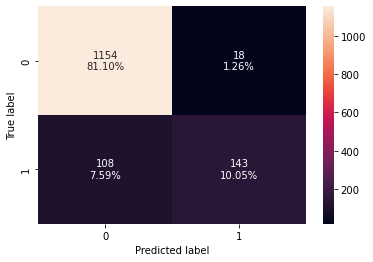

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [266]:
# base_estimator for bagging classifier is a decision tree by default
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(XX_train, YY_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging_classifier, XX_train, YY_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging_classifier, XX_test, YY_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(bagging_classifier, XX_test, YY_test)

**Observations:**
* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of F1 score and overfitting.

### Modeling using Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.898805  0.505976   0.863946  0.638191


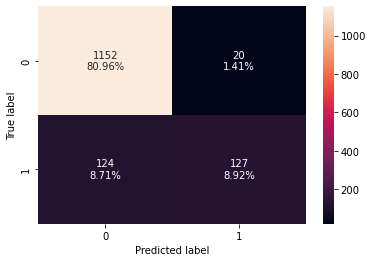

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [267]:
# Fitting the model
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(XX_train, YY_train)

# Calculating different metrics
rf_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    rf_classifier, XX_train, YY_train
)
print("Training performance:\n", rf_classifier_model_train_perf)
rf_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    rf_classifier, XX_test, YY_test
)
print("Testing performance:\n", rf_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(rf_classifier, XX_test, YY_test)

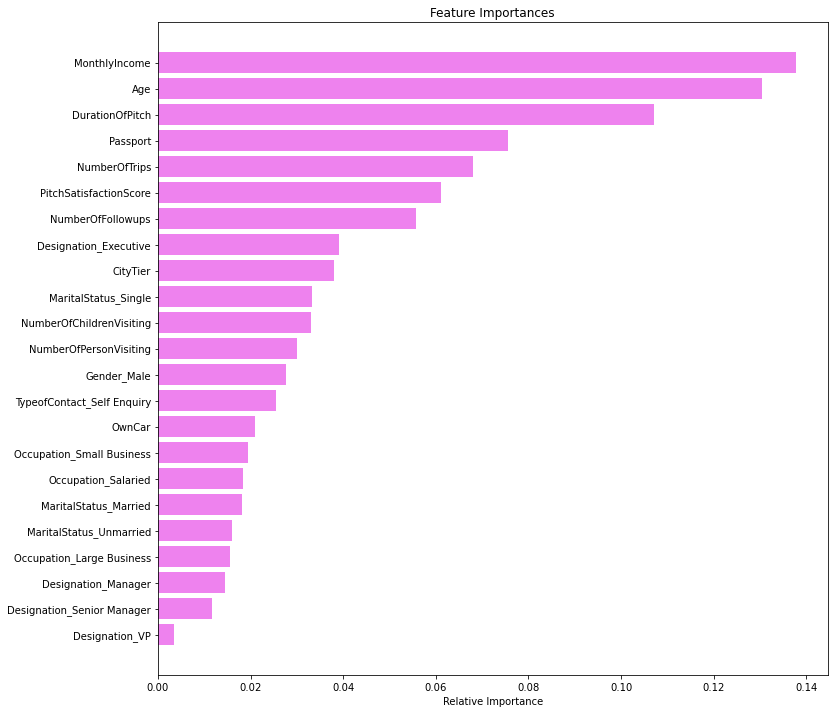

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [268]:
feature_names = XX_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Random Forest classifier is overfitting on the training set 
* Age, Monthly Income, Duration of Pitch, Passport, Number of Trips and there are multiple features that are of importance 

### Modeling using Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.882642  0.701195   0.656716  0.678227


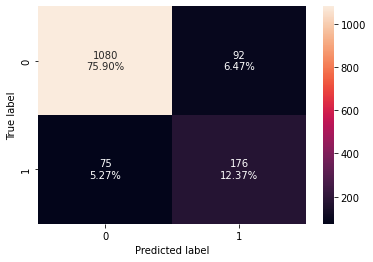

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [269]:
# Fitting the model
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(XX_train, YY_train)

# Calculating different metrics
dt_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    dt_classifier, XX_train, YY_train
)
print("Training performance:\n", dt_classifier_model_train_perf)
dt_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    dt_classifier, XX_test, YY_test
)
print("Testing performance:\n", dt_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(dt_classifier, XX_test, YY_test)

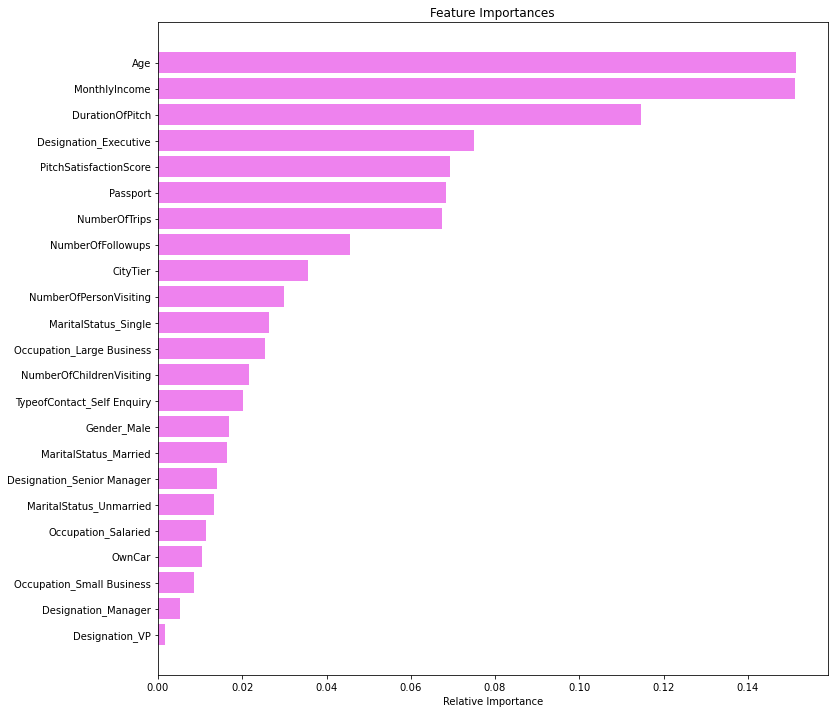

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [270]:
feature_names = XX_train.columns
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Decision Tree classifier is overfitting on the training set 
* Monthly Income, Age, Duration of Pitch, Pitch Satisfaction Score, Designation_Executive and there are multiple features that are of importance 

### Modeling post Tuning Bagging Classifier

In [271]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

cl1 = DecisionTreeClassifier(random_state=1)
# Grid of parameters to choose from
parameters = {
    "base_estimator": [cl1],
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned,
    parameters,
    scoring=acc_scorer,
    cv=5,
    n_jobs=5,
    return_train_score=True,
)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(XX_train, YY_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.8, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.999397  0.99688        1.0  0.998437
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.917779  0.589641    0.91358  0.716707


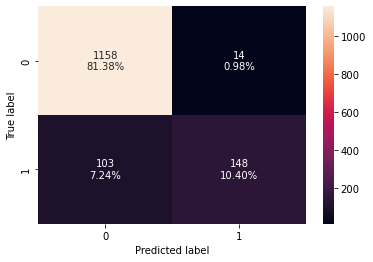

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [272]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging_estimator_tuned, XX_train, YY_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging_estimator_tuned, XX_test, YY_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(bagging_estimator_tuned, XX_test, YY_test)

**Observations:**
* Bagging post tuning classifier is still overfitting on the training set though the F1 score has increased

### Modeling Bagging Classifier with Weighted Decision Tree

In [273]:
# Choose the type of classifier.
bagging_estimator_dTree = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.19, 1: 0.81}, random_state=1
    ),
    random_state=1,
)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_dTree,
    parameters,
    scoring=acc_scorer,
    cv=5,
    n_jobs=5,
    return_train_score=True,
)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
bagging_estimator_dTree = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_dTree.fit(XX_train, YY_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision       F1
0  0.998794  0.99376        1.0  0.99687
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.91286  0.573705    0.89441  0.699029


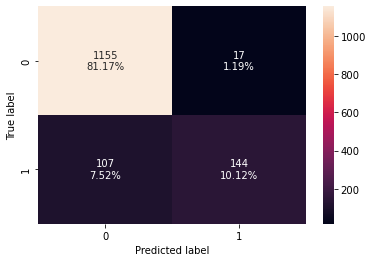

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [274]:
# Calculating different metrics
bagging_estimator_dTree_model_train_perf = model_performance_classification_sklearn_with_threshold(
    bagging_estimator_dTree, XX_train, YY_train
)
print("Training performance:\n", bagging_estimator_dTree_model_train_perf)
bagging_estimator_dTree_model_test_perf = model_performance_classification_sklearn_with_threshold(
    bagging_estimator_dTree, XX_test, YY_test
)
print("Testing performance:\n", bagging_estimator_dTree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(bagging_estimator_dTree, XX_test, YY_test)

**Observations:**
* Bagging with weighted Decision Tree looks better but the F1 score has decreased

### Modeling using Random Forest tuning

In [275]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0: 0.20, 1: 0.80}, random_state=1)

parameters = {
    "max_depth": list(np.arange(3, 10)),
    "n_estimators": [10, 20, 30, 40, 50],
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=5, return_train_score=True
)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(XX_train, YY_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       max_features=0.8, max_samples=0.8, n_estimators=20,
                       random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.957806  0.878315     0.9008  0.889415
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.888264  0.621514   0.709091  0.66242


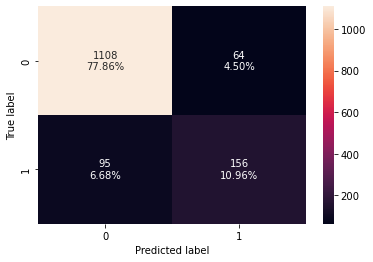

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [276]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    rf_tuned, XX_train, YY_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    rf_tuned, XX_test, YY_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(rf_tuned, XX_test, YY_test)

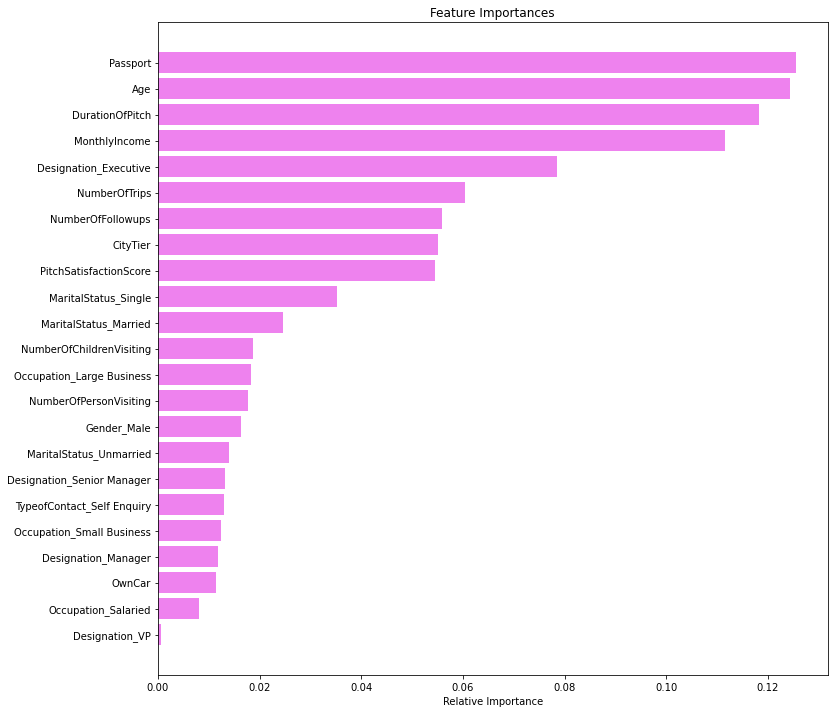

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [277]:
feature_names = XX_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Random Forest with tuning is providing a desired high stability of F1 score 
* Passport, Monthly Income, Age, Duration of Pitch, Designation_Executive, Pitch Satisfaction Score and there are multiple features that are of importance 

### Modeling using Tuned Decision Tree

In [278]:
# Choose the type of classifier.
dtree_estimator_tuned = DecisionTreeClassifier(
    class_weight={0: 0.20, 1: 0.80}, random_state=1, criterion="entropy"
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10),
    "min_samples_leaf": [5, 7, 10, 15],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator_tuned,
    parameters,
    scoring=scorer,
    cv=5,
    n_jobs=5,
    return_train_score=True,
)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
dtree_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator_tuned.fit(XX_train, YY_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=6, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.751356  0.75195   0.419861  0.538849
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.724526  0.681275   0.354037  0.46594


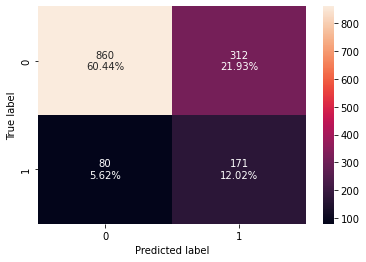

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [279]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn_with_threshold(
    dtree_estimator_tuned, XX_train, YY_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn_with_threshold(
    dtree_estimator_tuned, XX_test, YY_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(dtree_estimator_tuned, XX_test, YY_test)

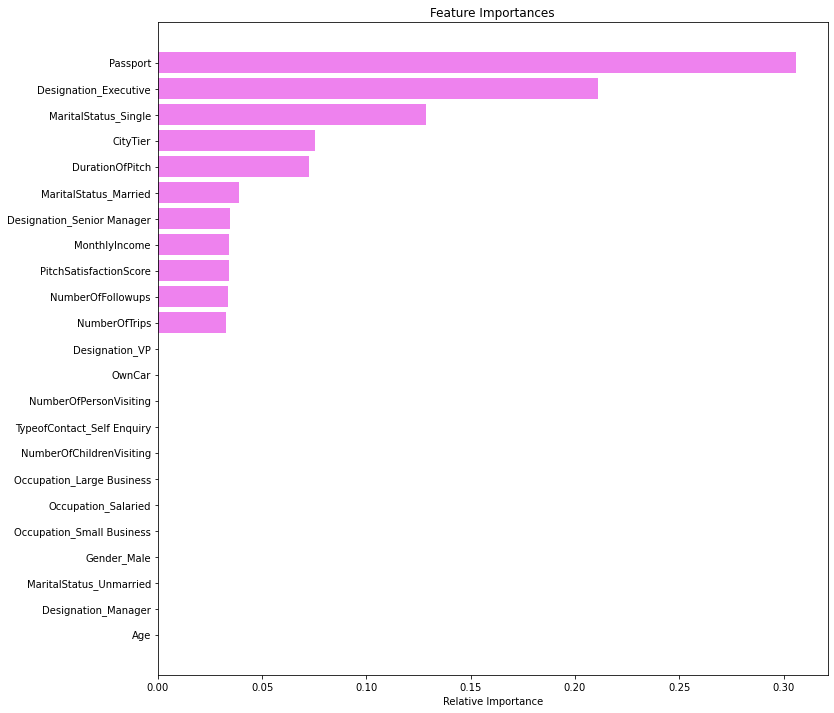

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [280]:
feature_names = XX_train.columns
importances = dtree_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Decision tree with tuning * Bagging classifier is overfitting on the training set and is performing poorly on the test set
* Passport, Decision tree, Marital Status, City & Duration of Pitch seems to be the importan features identified in this model

### Comparing Bagging Models Performance Summary

In [281]:
# training performance comparison

baggingtech_models_train_comp_df = pd.concat(
    [
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        bagging_estimator_dTree_model_train_perf.T,
        rf_classifier_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        dt_classifier_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
    ],
    axis=1,
)
baggingtech_models_train_comp_df.columns = [
    "Bagging",
    "Bagging Tuned",
    "Bagging Weighted DTree",
    "Random Forest",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned"
]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [282]:
# testing performance comparison

baggingtech_models_test_comp_df = pd.concat(
    [
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        bagging_estimator_dTree_model_test_perf.T,
        rf_classifier_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        dt_classifier_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
    ],
    axis=1,
)
baggingtech_models_test_comp_df.columns = [
    "Bagging",
    "Bagging Tuned",
    "Bagging Weighted DTree",
    "Random Forest",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned"
]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [283]:
print("Bagging Technique: Training performance comparison:")
baggingtech_models_train_comp_df

Bagging Technique: Training performance comparison:


Bagging  Bagging Tuned  Bagging Weighted DTree  Random Forest  \
Accuracy   0.990054       0.999397                0.998794            1.0   
Recall     0.950078       0.996880                0.993760            1.0   
Precision  0.998361       1.000000                1.000000            1.0   
F1         0.973621       0.998437                0.996870            1.0   

           Random Forest Tuned  Decision Tree  Decision Tree Tuned  
Accuracy              0.957806            1.0             0.751356  
Recall                0.878315            1.0             0.751950  
Precision             0.900800            1.0             0.419861  
F1                    0.889415            1.0             0.538849

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [284]:
print("Bagging Technique: Test set performance comparison:")
baggingtech_models_test_comp_df

Bagging Technique: Test set performance comparison:


Bagging  Bagging Tuned  Bagging Weighted DTree  Random Forest  \
Accuracy   0.911455       0.917779                0.912860       0.898805   
Recall     0.569721       0.589641                0.573705       0.505976   
Precision  0.888199       0.913580                0.894410       0.863946   
F1         0.694175       0.716707                0.699029       0.638191   

           Random Forest Tuned  Decision Tree  Decision Tree Tuned  
Accuracy              0.888264       0.882642             0.724526  
Recall                0.621514       0.701195             0.681275  
Precision             0.709091       0.656716             0.354037  
F1                    0.662420       0.678227             0.465940

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='modelbuilding1'> </a>

### Summary of Model Building - Bagging Techniques
*[Click to return to TOC](#summary_home)*



- The tuned Bagging model is the best model that can be used to build a predictive model that can be used by the travel agency to find the customers who will avail the new Product. It has the highest F1 score of approx 99.8% on training data but is overfitting the training data.

- The Bagging weighted Decision Tree also has a better F1 score on the training data but has a lesser F1 score on the test data and overfitting

- The Tuned Random Forest has the next better F1 score when compared with the remaining models. It is giving a more generalized performance as compared to the bagging models.

- From the model analysis, features such as Passport, Monthly Income, Age, Duration of Pitch, Designation, Number of trips, Number of followups and city play an important part in identifying the possible customers


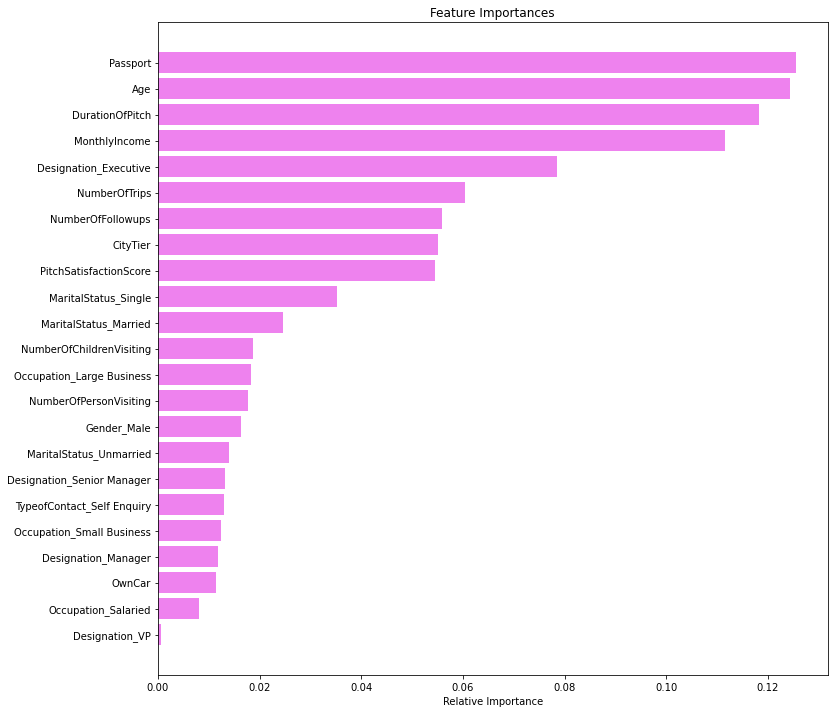

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [285]:
feature_names = XX_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

---

<a id="boosting"> </a>

## Model building using Boosting Technique
*[Click to return to TOC](#summary_home)*

---

### Modeling using Adaboost Classifier

   Accuracy    Recall  Precision        F1
0  0.848704  0.372855   0.705015  0.487755
   Accuracy    Recall  Precision        F1
0  0.847505  0.302789   0.644068  0.411924


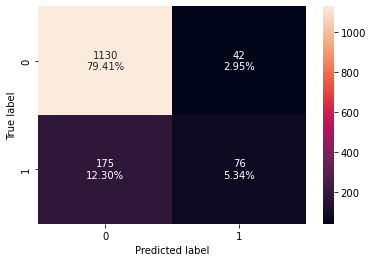

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [286]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(XX_train, YY_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    ab_classifier, XX_train, YY_train
)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    ab_classifier, XX_test, YY_test
)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(ab_classifier, XX_test, YY_test)

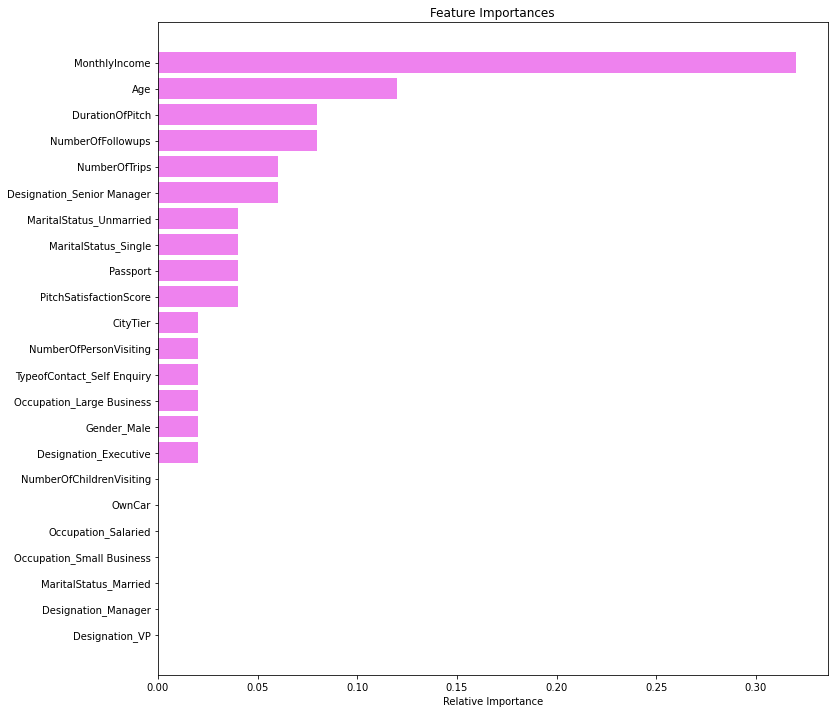

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [287]:
feature_names = XX_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Adaboost Classifier is having a very low F1 score which needs to be tuned 
* Monthly Income, Age, Duration of Pitch, Number of followups, Marital status and there are multiple features that are of importance in this model

### Modeling using Gradient Boosting

   Accuracy    Recall  Precision        F1
0   0.88909  0.482059   0.895652  0.626775
   Accuracy    Recall  Precision        F1
0  0.878426  0.414343        0.8  0.545932


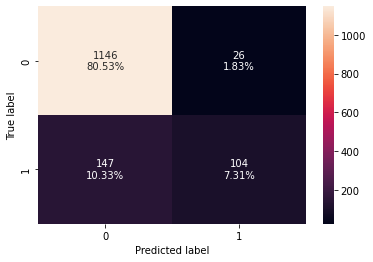

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [288]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(XX_train, YY_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    gb_classifier, XX_train, YY_train
)
print(gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    gb_classifier, XX_test, YY_test
)
print(gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(gb_classifier, XX_test, YY_test)

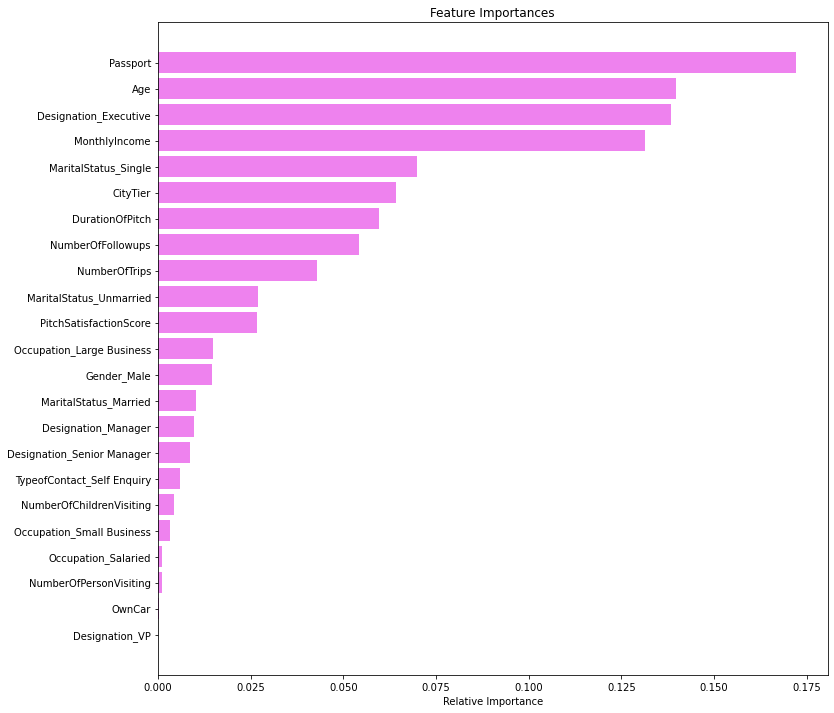

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [289]:
feature_names = XX_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Gradient Classifier is having a better F1 score compared with Adaboost 
* Passport, Designation, Monthly Income, Age, Marital status, City Tier, Duration of Pitch and there are multiple features that are of importance in this model

### Modeling using XGBoost

Training performance:
    Accuracy   Recall  Precision        F1
0  0.999699  0.99844        1.0  0.999219
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.923401  0.657371    0.87766  0.751708


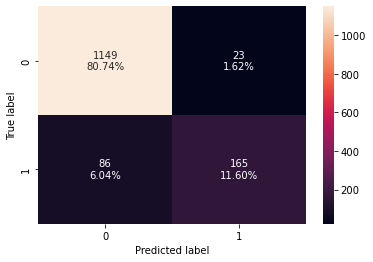

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [290]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(XX_train, YY_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn_with_threshold(
    xgb_classifier, XX_train, YY_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn_with_threshold(
    xgb_classifier, XX_test, YY_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(xgb_classifier, XX_test, YY_test)

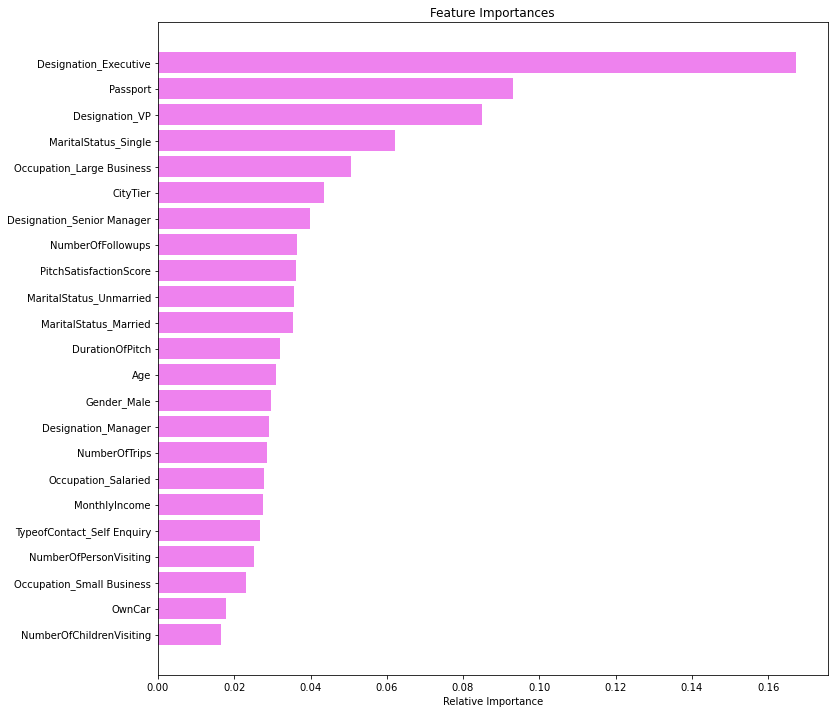

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [291]:
feature_names = XX_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* XGBoost Classifier is having a much improved F1 score compared with Adaboost & Gradient
* Designation_Executive, Passport, Marital status Single, Occupation_LB, City Tier, Marital Status Married, Duration of Pitch and there are multiple features that are of importance in this model

### Modeling using Adaboost Classifier Hyper Tuning

   Accuracy    Recall  Precision        F1
0  0.985835  0.946958   0.979032  0.962728
   Accuracy    Recall  Precision        F1
0  0.860155  0.609562   0.602362  0.605941


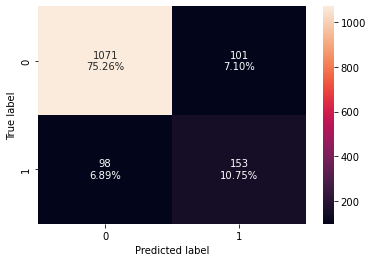

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [292]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    abc_tuned, parameters, scoring=scorer, cv=5, n_jobs=5, return_train_score=True,
)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(XX_train, YY_train)

# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    abc_tuned, XX_train, YY_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    abc_tuned, XX_test, YY_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(abc_tuned, XX_test, YY_test)

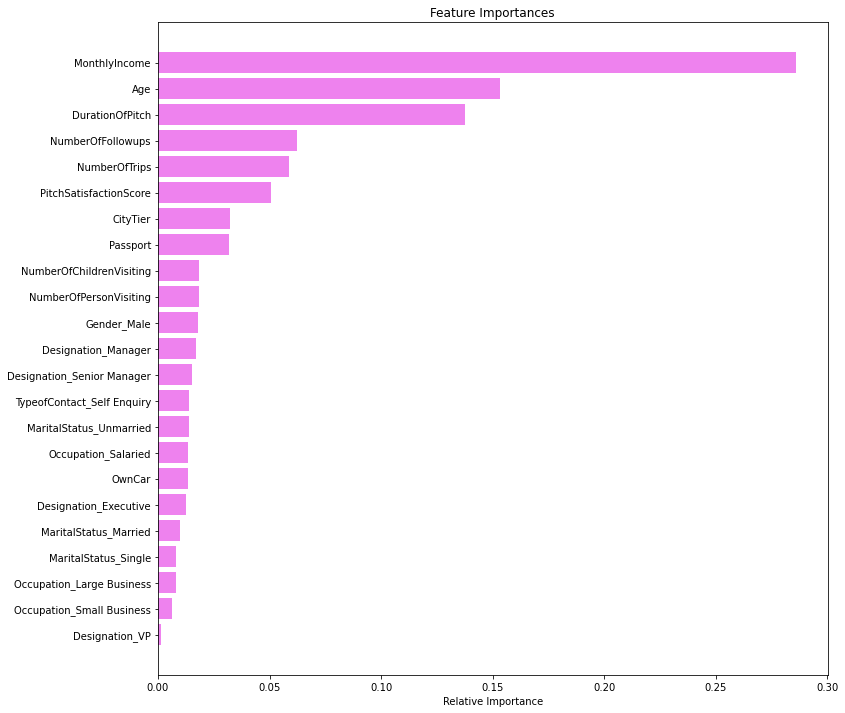

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [293]:
feature_names = XX_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Tuned AdaBoost Classifier is having a much improved F1 score compared with Adaboost but its still lesser than the XGBoost
* Monthly Income, Age, Duration of Pitch, Pitch Satisfaction Score, Number of Trips, Number of followups, Preferred property Star and there are multiple features that are of importance in this model

### Modeling using Gradient Boosting Hyper Tuning

Training performance:
    Accuracy    Recall  Precision        F1
0  0.927667  0.652106    0.96092  0.776952
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.885453  0.47012   0.797297  0.591479


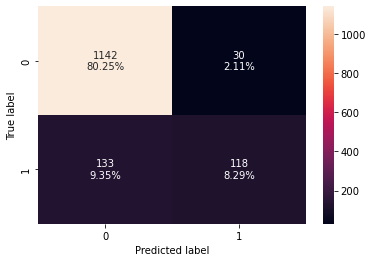

<IPython.core.display.Javascript object>

In [115]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=5, return_train_score=True
)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(XX_train, YY_train)

# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    gbc_tuned, XX_train, YY_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    gbc_tuned, XX_test, YY_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(gbc_tuned, XX_test, YY_test)

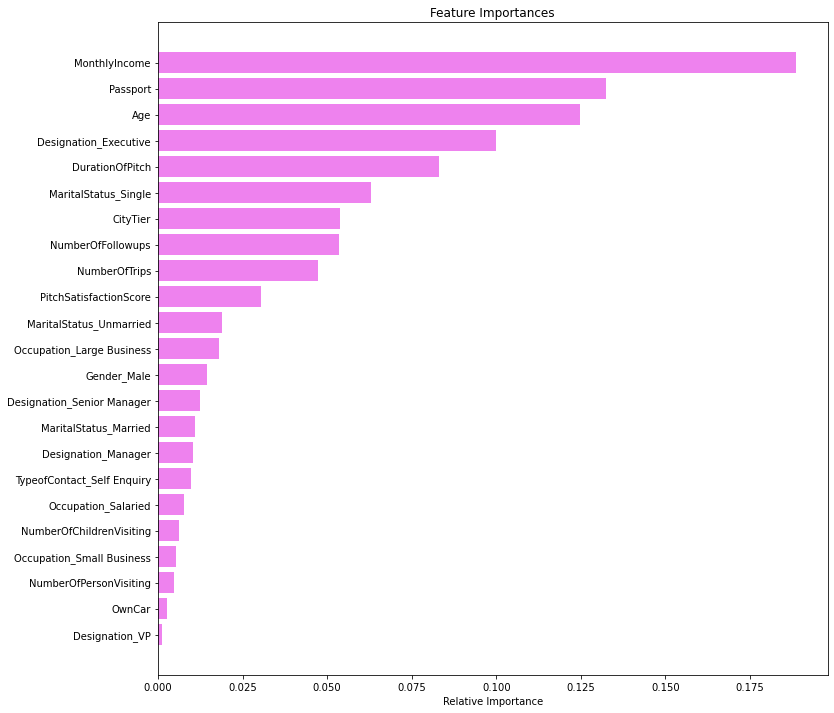

<IPython.core.display.Javascript object>

In [116]:
feature_names = XX_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Gradient Classifier with Tuning is having a better F1 score compared with default Gradient parameters 
* Monthly Income, Passport, Age, Designation_Exec, Duration of Pitch, Marital status Single, Number of Followups, City Tier,  and there are multiple features that are of importance in this model

### Modeling using XGBoost Hyper Tuning

In [113]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(XX_train, YY_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(XX_train, YY_train)

# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn_with_threshold(
    xgb_tuned, XX_train, YY_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    xgb_tuned, XX_test, YY_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(xgb_tuned, XX_test, YY_test)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
feature_names = XX_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* XGBoost Classifier is having a reduced F1 score compared to default XGBoost, but its generalize well than the default
* Passport,Designation_Executive, Marital status Single, Product Pitched_Deluxe, Designation_SM and there are multiple features that are of importance in this model

### Compairing Boosting Models Performance Summary

In [298]:
# training performance comparison

boostingtech_models_train_comp_df = pd.concat(
    [
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
boostingtech_models_train_comp_df.columns = [
    "AdaBoost",
    "AdaBoost Tuned",
    "Gradient",
    "Gradient Tuned",
    "XGBoost",
    "XGBoost Tuned"
]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [299]:
# testing performance comparison

boostingtech_models_test_comp_df = pd.concat(
    [
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
    ],
    axis=1,
)
boostingtech_models_test_comp_df.columns = [
    "AdaBoost",
    "AdaBoost Tuned",
    "Gradient",
    "Gradient Tuned",
    "XGBoost",
    "XGBoost Tuned"
]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
print("Boosting Technique: Training performance comparison:")
boostingtech_models_train_comp_df

Boosting Technique: Training performance comparison:


AdaBoost  AdaBoost Tuned  Gradient  Gradient Tuned   XGBoost  \
Accuracy   0.848704        0.985835  0.889090        0.927667  0.999699   
Recall     0.372855        0.946958  0.482059        0.652106  0.998440   
Precision  0.705015        0.979032  0.895652        0.960920  1.000000   
F1         0.487755        0.962728  0.626775        0.776952  0.999219   

           XGBoost Tuned  
Accuracy        0.971971  
Recall          0.990640  
Precision       0.879501  
F1              0.931768

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [301]:
print("Boosting Technique: Test set performance comparison:")
boostingtech_models_test_comp_df

Boosting Technique: Test set performance comparison:


AdaBoost  AdaBoost Tuned  Gradient  Gradient Tuned   XGBoost  \
Accuracy   0.847505        0.860155  0.878426        0.885453  0.923401   
Recall     0.302789        0.609562  0.414343        0.470120  0.657371   
Precision  0.644068        0.602362  0.800000        0.797297  0.877660   
F1         0.411924        0.605941  0.545932        0.591479  0.751708   

           XGBoost Tuned  
Accuracy        0.894589  
Recall          0.808765  
Precision       0.665574  
F1              0.730216

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='modelbuilding2'></a>
### Summary of Model Building - Boosting Technique
*[Click to return to TOC](#summary_home)*



- The XGBoost model is the best model in the Boosting techniques that can be used to build a predictive model by the travel agency to find the customers who will avail the new Product. It has the highest F1 score of approx 99.9% on training data but is overfitting considering the F1 score with test data.

- The AdaBoost Tuned model has the next better F1 score of 96.3% on the training data  but has a larger variance considering the F1 score with test data.

- The XGBoost Tuned model has the next better F1 score on the training data. Its having a more generalized performance compared to the other boosting models. 

- The Gradient Tuned model is the next best fit with a score of 77.7% and has a more generalized fitment and working well with the Training & Test data.

- From the model analysis, features such as Passport, Designation_Exec, Maritial Status Single, Occupation, City Tier, Marital Status_Married and Desgination SM play an important part in identifying the possible customers


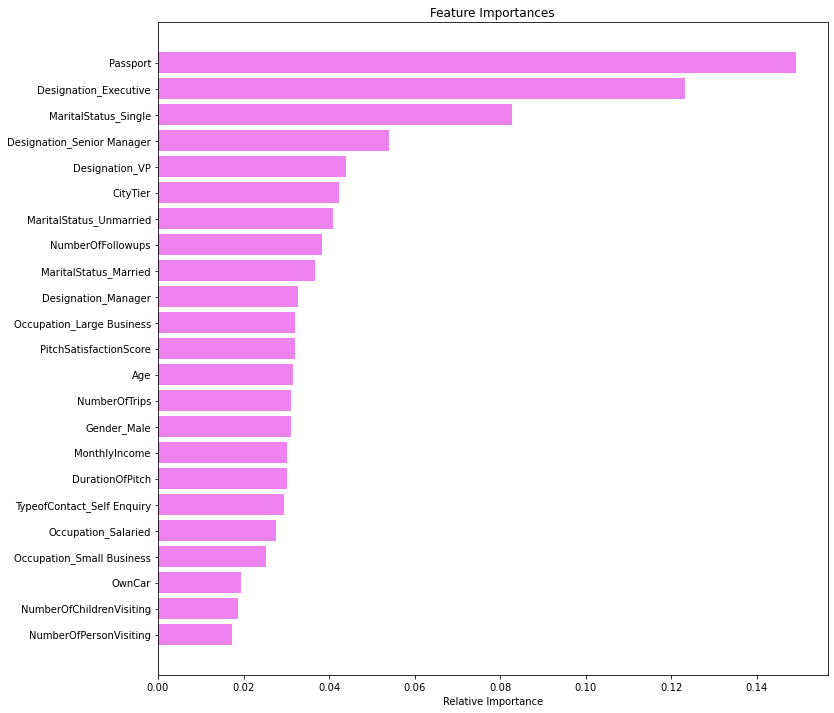

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [302]:
feature_names = XX_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<a id="stacking"> </a>

## Model building using Stacking Technique
*[Click to return to TOC](#summary_home)*

---

### Stacking Model - Base estimators(DecisionTree Tuned, Bagging Tuned, Gradient) & Final estimator(RandomForest Tuned)

In [303]:
estimators = [
    ("Bagging Tuned", bagging_estimator_tuned),
    ("Gradient Boosting", gb_classifier),
    ("Decision Tree Tuned", dtree_estimator_tuned),
]

final_estimator = rf_tuned

stacking_classifier_BagT_Grad_DTreeT_RFT = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier_BagT_Grad_DTreeT_RFT.fit(XX_train, YY_train)

StackingClassifier(estimators=[('Bagging Tuned',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                                  max_features=0.8,
                                                  max_samples=0.9,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree Tuned',
                                DecisionTreeClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       criterion='entropy',
                                                       max_depth=6,
                                                       max_leaf_nodes=15,
                  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0   0.99789  0.99532   0.993769  0.994544
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.907238  0.760956   0.726236  0.743191


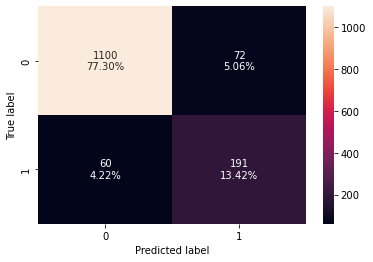

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [304]:
# Calculating different metrics
stacking_classifier_BagT_Grad_DTreeT_RFT_Train = model_performance_classification_sklearn_with_threshold(
    stacking_classifier_BagT_Grad_DTreeT_RFT, XX_train, YY_train
)
print("Training performance:\n", stacking_classifier_BagT_Grad_DTreeT_RFT_Train)
stacking_classifier_BagT_Grad_DTreeT_RFT_Test = model_performance_classification_sklearn_with_threshold(
    stacking_classifier_BagT_Grad_DTreeT_RFT, XX_test, YY_test
)
print("Testing performance:\n", stacking_classifier_BagT_Grad_DTreeT_RFT_Test)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    stacking_classifier_BagT_Grad_DTreeT_RFT, XX_test, YY_test
)

**Observations:** 

- Stacking Model - Base estimators(DecisionTree Tuned, Bagging Tuned, Gradient) & Final estimator(RandomForest Tuned)

    * This stacking model has a very good F1 score on the testing & training data though overfitting and is well generalized


### Stacking Model - Base estimators(AdaBoost Tuned, Gradient Tuned, DecisionTree) & Final estimator(XGBoost Tuned)

In [305]:
estimators = [
    ("AdaBoost Tuned", abc_tuned),
    ("Gradient Tuned", gbc_tuned),
    ("Decision Tree", dt_classifier),
]

final_estimator = xgb_tuned

stacking_classifier_AdaT_GradT_DTree_XGBT = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier_AdaT_GradT_DTree_XGBT.fit(XX_train, YY_train)

StackingClassifier(estimators=[('AdaBoost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.5000000000000002,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=250,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',...
                                                 eval_metric='logloss', gamma=0,
                                    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision        F1
0  0.959916     1.0   0.828165  0.906007
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.853127  0.808765   0.557692  0.660163


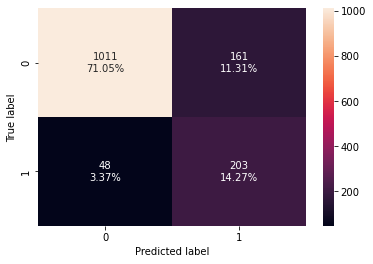

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [306]:
# Calculating different metrics
stacking_classifier_AdaT_GradT_DTree_XGBT_Train = model_performance_classification_sklearn_with_threshold(
    stacking_classifier_AdaT_GradT_DTree_XGBT, XX_train, YY_train
)
print("Training performance:\n", stacking_classifier_AdaT_GradT_DTree_XGBT_Train)
stacking_classifier_AdaT_GradT_DTree_XGBT_Test = model_performance_classification_sklearn_with_threshold(
    stacking_classifier_AdaT_GradT_DTree_XGBT, XX_test, YY_test
)
print("Testing performance:\n", stacking_classifier_AdaT_GradT_DTree_XGBT_Test)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    stacking_classifier_AdaT_GradT_DTree_XGBT, XX_test, YY_test
)

**Observations:** 
- Stacking Model - Base estimators(AdaBoost Tuned, Gradient Tuned, DecisionTree) & Final estimator(XGBoost Tuned)
    * This stacking model has F1 score less than the previous model but not over fitting. The scores are well generalized between training & testing date and close to each other


### Stacking Model - Base estimators(Weighted Bagging, DecisionTree Tuned, AdaBoost Tuned, Random Forest Tuned) & Final estimator(XGBoost Tuned)

In [307]:
estimators = [
    ("Bagging Weighted DTree", bagging_estimator_dTree),
    ("AdaBoost Tuned", abc_tuned),
    ("Random Forest Tuned", rf_tuned),
    ("Decision Tree Tuned", dtree_estimator_tuned),
]

final_estimator = xgb_tuned

stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT.fit(XX_train, YY_train)

StackingClassifier(estimators=[('Bagging Weighted DTree',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                                      1: 0.81},
                                                                                        random_state=1),
                                                  max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('AdaBoost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.5000000000000002,
                                                   n_estima...
                                           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision        F1
0  0.991863     1.0   0.959581  0.979374
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.888967  0.856574   0.637982  0.731293


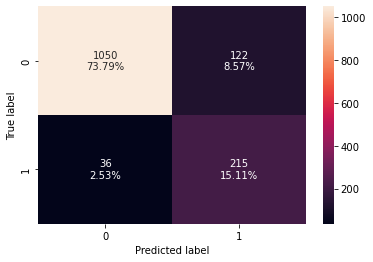

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [308]:
# Calculating different metrics
stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Train = model_performance_classification_sklearn_with_threshold(
    stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT, XX_train, YY_train
)
print(
    "Training performance:\n", stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Train
)
stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Test = model_performance_classification_sklearn_with_threshold(
    stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT, XX_test, YY_test
)
print("Testing performance:\n", stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Test)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT, XX_test, YY_test
)

**Observations:** 

- Stacking Model - Base estimators(DecisionTree Tuned, AdaBoost Tuned, Random Forest Tuned) & Final estimator(XGBoost Tuned)

    * This stacking model has better F1 score less than the previous model but there is over fitting with training data. The scores are well generalized between training & testing date.


### Compairing Stacking Models Performance Summary

In [309]:
# training performance comparison

stacking_models_train_comp_df = pd.concat(
    [
        stacking_classifier_BagT_Grad_DTreeT_RFT_Train.T,
        stacking_classifier_AdaT_GradT_DTree_XGBT_Train.T,
        stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Train.T,
    ],
    axis=1,
)
stacking_models_train_comp_df.columns = [
    "BagT_Grad_DTreeT_RFT",
    "AdaT_GradT_DTree_XGBT",
    "BagDtree_AdaT_RFT_DTreeT_XGBT"
]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [310]:
# training performance comparison

stacking_models_test_comp_df = pd.concat(
    [
        stacking_classifier_BagT_Grad_DTreeT_RFT_Test.T,
        stacking_classifier_AdaT_GradT_DTree_XGBT_Test.T,
        stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Test.T,
    ],
    axis=1,
)
stacking_models_test_comp_df.columns = [
    "BagT_Grad_DTreeT_RFT",
    "AdaT_GradT_DTree_XGBT",
    "BagDtree_AdaT_RFT_DTreeT_XGBT"
]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [311]:
print("Bagging Technique: Training performance comparison:")
stacking_models_train_comp_df

Bagging Technique: Training performance comparison:


BagT_Grad_DTreeT_RFT  AdaT_GradT_DTree_XGBT  \
Accuracy               0.997890               0.959916   
Recall                 0.995320               1.000000   
Precision              0.993769               0.828165   
F1                     0.994544               0.906007   

           BagDtree_AdaT_RFT_DTreeT_XGBT  
Accuracy                        0.991863  
Recall                          1.000000  
Precision                       0.959581  
F1                              0.979374

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [312]:
print("Bagging Technique: Test set performance comparison:")
stacking_models_test_comp_df

Bagging Technique: Test set performance comparison:


BagT_Grad_DTreeT_RFT  AdaT_GradT_DTree_XGBT  \
Accuracy               0.907238               0.853127   
Recall                 0.760956               0.808765   
Precision              0.726236               0.557692   
F1                     0.743191               0.660163   

           BagDtree_AdaT_RFT_DTreeT_XGBT  
Accuracy                        0.888967  
Recall                          0.856574  
Precision                       0.637982  
F1                              0.731293

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='modelbuilding3'> </a>

### Summary of Model Building - Stacking Technique
*[Click to return to TOC](#summary_home)*



- Stacking Model - Base estimators(DecisionTree Tuned, Bagging Tuned, Gradient) & Final estimator(RandomForest Tuned)

    * This stacking model has a very good F1 score on the testing & training data and is well generalized
    
- Stacking Model - Base estimators(AdaBoost Tuned, Gradient Tuned, DecisionTree) & Final estimator(XGBoost Tuned)

    * This stacking model has F1 score less than the previous model but not over fitting. The scores are well generalized between training & testing date and close to each other

- Stacking Model - Base estimators(Weighted Bagging, DecisionTree Tuned, AdaBoost Tuned, Random Forest Tuned) & Final estimator(XGBoost Tuned)
    
    * This stacking model has better F1 score less than the previous model but also not over fitting. The scores are well generalized between training & testing date.


---

<a id='comparison1'></a>
### <a id='comparison2'>Comparisons - Bagging VS Boosting VS Stacked </a>

In [313]:
# training performance comparison for the 3 best models from each technique

comparison_models_train_comp_df = pd.concat(
    [
        bagging_estimator_tuned_model_train_perf.T,
        bagging_estimator_dTree_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_BagT_Grad_DTreeT_RFT_Train.T,
        stacking_classifier_AdaT_GradT_DTree_XGBT_Train.T,
        stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Train.T,
    ],
    axis=1,
)
comparison_models_train_comp_df.columns = [
    "Bagging Tuned",
    "Bagging Weighted DTree",
    "Random Forest Tuned",
    "AdaBoost Tuned",
    "Gradient Tuned",
    "XGBoost",
    "XGBoost Tuned",
    "Stack BagT Grad DTreeT RFT",
    "Stack AdaT GradT DTree XGBT",
    "Stack BDtree AdaT RFT DTreeT XGBT",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [314]:
# training performance comparison for the 3 best models from each technique

comparison_models_test_comp_df = pd.concat(
    [
        bagging_estimator_tuned_model_test_perf.T,
        bagging_estimator_dTree_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_BagT_Grad_DTreeT_RFT_Test.T,
        stacking_classifier_AdaT_GradT_DTree_XGBT_Test.T,
        stacking_classifier_BagDtree_AdaT_RFT_DTreeT_XGBT_Test.T,
    ],
    axis=1,
)
comparison_models_test_comp_df.columns = [
    "Bagging Tuned",
    "Bagging Weighted DTree",
    "Random Forest Tuned",
    "AdaBoost Tuned",
    "Gradient Tuned",
    "XGBoost",
    "XGBoost Tuned",
    "Stack BagT Grad DTreeT RFT",
    "Stack AdaT GradT DTree XGBT",
    "Stack BDtree AdaT RFT DTreeT XGBT",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [315]:
print(
    "Overall Comparison (Top 3 models from each technique): Training set performance:"
)
comparison_models_train_comp_df.mul(100).round(decimals=2).astype(str).add("%")

Overall Comparison (Top 3 models from each technique): Training set performance:


Bagging Tuned Bagging Weighted DTree Random Forest Tuned  \
Accuracy         99.94%                 99.88%              95.78%   
Recall           99.69%                 99.38%              87.83%   
Precision        100.0%                 100.0%              90.08%   
F1               99.84%                 99.69%              88.94%   

          AdaBoost Tuned Gradient Tuned XGBoost XGBoost Tuned  \
Accuracy          98.58%         92.77%  99.97%         97.2%   
Recall             94.7%         65.21%  99.84%        99.06%   
Precision          97.9%         96.09%  100.0%        87.95%   
F1                96.27%          77.7%  99.92%        93.18%   

          Stack BagT Grad DTreeT RFT Stack AdaT GradT DTree XGBT  \
Accuracy                      99.79%                      95.99%   
Recall                        99.53%                      100.0%   
Precision                     99.38%                      82.82%   
F1                            99.45%                       90.6%   

          Stack BDtree AdaT RFT DTreeT XGBT  
Accuracy                             99.19%  
Recall                               100.0%  
Precision                            95.96%  
F1                                   97.94%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [316]:
print("Overall Comparison (Top 3 models from each technique): Test set performance:")
comparison_models_test_comp_df.mul(100).round(decimals=2).astype(str).add("%")

Overall Comparison (Top 3 models from each technique): Test set performance:


Bagging Tuned Bagging Weighted DTree Random Forest Tuned  \
Accuracy         91.78%                 91.29%              88.83%   
Recall           58.96%                 57.37%              62.15%   
Precision        91.36%                 89.44%              70.91%   
F1               71.67%                  69.9%              66.24%   

          AdaBoost Tuned Gradient Tuned XGBoost XGBoost Tuned  \
Accuracy          86.02%         88.55%  92.34%        89.46%   
Recall            60.96%         47.01%  65.74%        80.88%   
Precision         60.24%         79.73%  87.77%        66.56%   
F1                60.59%         59.15%  75.17%        73.02%   

          Stack BagT Grad DTreeT RFT Stack AdaT GradT DTree XGBT  \
Accuracy                      90.72%                      85.31%   
Recall                         76.1%                      80.88%   
Precision                     72.62%                      55.77%   
F1                            74.32%                      66.02%   

          Stack BDtree AdaT RFT DTreeT XGBT  
Accuracy                              88.9%  
Recall                               85.66%  
Precision                             63.8%  
F1                                   73.13%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [317]:
# Calculating variance of F1 score between Training & Testing data
variance_df = comparison_models_train_comp_df - comparison_models_test_comp_df
variance_df[variance_df.index == "F1"].mul(100).round(decimals=2).astype(str).add("%")

Bagging Tuned Bagging Weighted DTree Random Forest Tuned AdaBoost Tuned  \
F1        28.17%                 29.78%               22.7%         35.68%   

   Gradient Tuned XGBoost XGBoost Tuned Stack BagT Grad DTreeT RFT  \
F1         18.55%  24.75%        20.16%                     25.14%   

   Stack AdaT GradT DTree XGBT Stack BDtree AdaT RFT DTreeT XGBT  
F1                      24.58%                            24.81%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

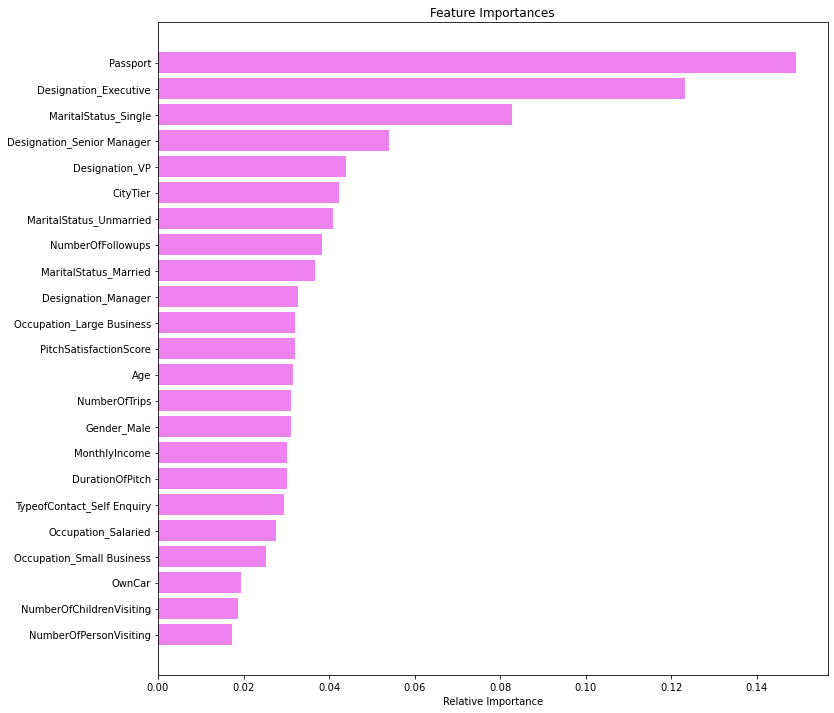

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [318]:
feature_names = XX_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

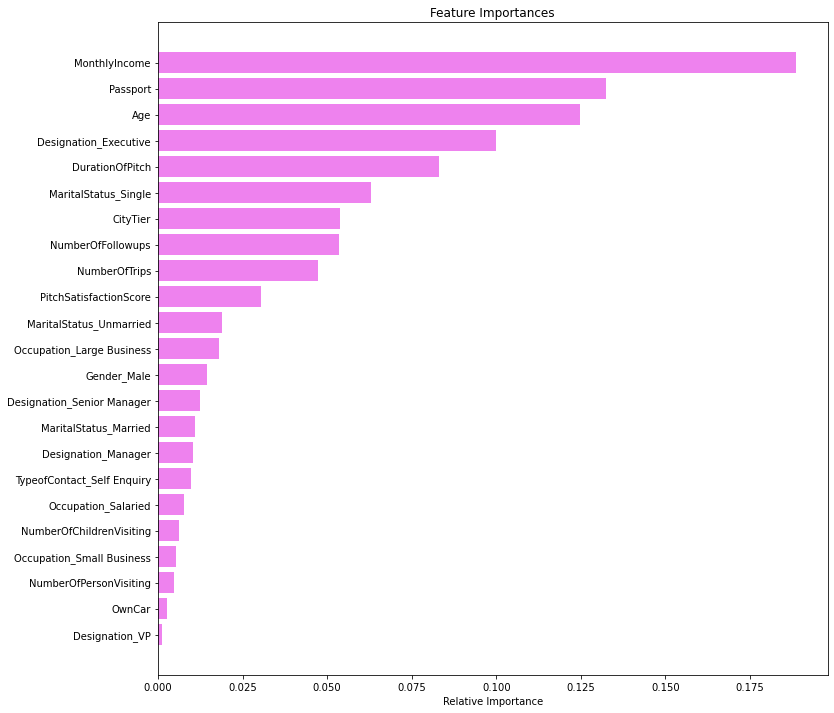

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [319]:
feature_names = XX_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<a id='modelbuilding4'></a>
### <a id='link4'>Summary compairing the various Ensemble Technique Models</a>
*[Click to return to TOC](#summary_home)*



**Model Analysis:**

    Based on the comparison of the top models picked from each technique: 

    - Considering the F1 score of the Training data, default XGBoost has the highest score of 99.92%, followed by "Bagging Weighted DTree" with 99.69%, followed by "Stack BagT Grad DTreeT RFT" model with 99.45%. All these models are over fitting considering the variance (approximately around >25%) with the testing F2 scores

    - "XGBoost Tuned" has the next better fitting model with a F1 score of 93.18% on training data and 73.02% on the testing data, with a variance of 20.2%. Accuracy is at 97.2%. This model doesnt seem to be overfitting and has a better predictive model with the testing data

    - "Gradient Tuned" has a better generalization with the F1 score of 77.7% on training data and 59.15% on the testing date, with a variance of 18.6% only. Accuracy is at 92.77%. This model doesnt seem to be overfitting and has a better predictive model with the testing data

**Important Features:**

    - From the "XGBoost Tuned" model analysis, features such as Passport, Designation_Exec, Maritial Status Single, Product Pitched Deluxe, Desgination SM, Product Pitched Super Deluxe and City Tier play an important part in identifying the possible customers

    - From the "Gradient Tuned" model analysis, features such as Monthly Income, Passport, Age, Designation_Exec, DurationOfPitch, Status_Single, Number of Followups, City Tier and Number of Trips play an importan part in identifying the possible customers

**Observation:**

    - As the final results depend on the parameters used/checked using GridSearchCV, there may be yet better parameters which may result in a better F1 performance and can be tuned further.

<a id='recommend1'></a>

### Recommendations:
*[Click to return to TOC](#summary_home)*



Based on the Customer Information:

   * Self Inquiry has been more than the Customer Initiated
   * Customers are mostly Salaried & Small Business and maximum they are Male Customers
   * Basic & Deluxe products have been preferred, followed by Standard product when compared with others
   * Mostly they are Married Customer and more at designations level of Executives & Managers
   * More customers in the age range of 30-40 and from Tier 1 city
   * Atleast a min of 4 followps are required and have recieved 3 or more pitch satisfaction scores
   * Large number of customers have passports 
    
Based on the Products taken by the Customers, we found the following insights that can be leveraged as recommendations for understanding the Customers: 

   * Monthly Income drives the number of times peope visit & # of people travel. Larger the income, chances are people will purchase the product. Especially, Salary is higher for VP & AVP and they can be targeted
   * Though Self Inquiry has been the most in terms of contact type, we see that the conversion rate of Self Inquiry to Product purchased is vey low (17%) compared to Company initiated (21%). More analysis can ben done to understand and get feedback/reasosn to have a higher conversion rate for Self Inquiry
   * Similary, we can increase the number of Company initiated contacts, since analysis shows there is a higher conversion rate
   * Conversion rate for VP & AVP approached by Company initiated contacts, have higher chance of buying the product and required very less follow ups
   * Though data shows that Salaried & Small Business customers have taken the product, but based on the customer popluation, we can see that the conversion rate to product taken is more for  Large Business customers (27.4%) when compared with others
   * Based on marital status, we see the rate of customers who have taken the product are - Single (34%) & Unmarried (25%). The  Married (14%) & Divorced (13%). Focus can be done for Single & Unmaaried status for new product
   * Executive members have higher chance of taking the product when compared with other designation levels. Especially, customers at Executive & Managers at the age of 20-40 have a higher range of taking the products
   * People between 30-40 (chances of purchase 52%) can be focused since they seem to purchase products more than the other age groups
   * Though Tier 1 has been the higher number of customer population & Tier 2 the lowest, the conversion rate is 24% for Tier 3 and 22% for tier 2. We can focus more on tier 3  cities to market the new product
   * Number of followups play a crucial role in higher conversion rate. With repated follow ups, it can incrase the chance of making customers purchase the product
   * Similary, more time spent in pitch duration also helps in conversion rate of making customer purchase the products
   * There is a significant number of Pitch satisfaction score is the raneg of 1-2, though the overall satisfaction scores where more than 3. We can try to understand the reasons for the lower scores for the feedback and try to provide corrections or alternate options during pitch discussions
   * Customers holding Passports have a higher chance of taking the tourism products and they can be approached
    


---

<a id="summary_home"></a>
## Table of Contents (TOC)


##### - *[Importing Packages](#import)*

##### - *[Unwrapping Customer Information](#unwrap)*
- *[Data Description](#datadesc)*

##### - *[Data Pre-Processing & Sanity Checks](#preprocess)*

##### - *[Summary of Data Analysis](#dataanalysis1)*

##### - *[EDA Analysis](#edaanalysis)*
- *[Insights from Categorical Data](#inCategory1)*
- *[Insights from Numerical Data](#inNumber1)*
- *[Univariate Analysis](#UnivariateAnalysis1)*
- *[Bivariate Analysis](#bivariate)*
    - *[Bivariate Analysis Summary](#BivariateAnalysis1)*
    - *[Categorical Data vs ProductTaken Summary](#BivariateCat)*
    - *[Numberical Data vs ProductTaken Summary](#BivariateNum)*
- *[Multivariate Analysis](#multivariate)*    

##### - *[Customer Profiling - Based on Products](#profile)*
- *[Overall observation](#profile_overall)*
- *[Basic Product Summary](#profile_basic)*
- *[Standard Product Summary](#profile_std)*
- *[Deluxe Product Summary](#profile_deluxe)*
- *[Super Deluxe Product Summary](#profile_sdeluxe)*
- *[King Product Summary](#profile_king)*

##### - *[Model Building](#model)*
- *[Model evaluation criterion](#evaluation1)*

##### - *[Bagging Technique Models](#bagging)*
- *[Bagging Models Summary](#modelbuilding1)*

##### - *[Boosting Technique Models](#boosting)*
- *[Boosting Models Summary](#modelbuilding2)*

##### - *[Stacking Technique Models](#stacking)*
- *[Stacking Models Summary](#modelbuilding3)*

##### - *[Comparison - Bagging vs Boosting vs Stacking ](#modelbuilding4)*

##### - *[Recommendations](#recommend1)*

---

In [126]:
predictions = gbc_tuned.predict(X)

X['model_predictions'] = predictions


<IPython.core.display.Javascript object>

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4741 non-null   float64
 1   CityTier                    4741 non-null   int64  
 2   DurationOfPitch             4741 non-null   float64
 3   NumberOfPersonVisiting      4741 non-null   int64  
 4   NumberOfFollowups           4741 non-null   float64
 5   NumberOfTrips               4741 non-null   float64
 6   Passport                    4741 non-null   int64  
 7   PitchSatisfactionScore      4741 non-null   int64  
 8   OwnCar                      4741 non-null   int64  
 9   NumberOfChildrenVisiting    4741 non-null   float64
 10  MonthlyIncome               4741 non-null   float64
 11  TypeofContact_Self Enquiry  4741 non-null   uint8  
 12  Occupation_Large Business   4741 non-null   uint8  
 13  Occupation_Salaried         4741 

<IPython.core.display.Javascript object>

In [132]:
X[X["model_predictions"] == 1]

Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
2     37.0         1              8.0                       3   
14    28.0         1             30.0                       2   
19    36.0         1              8.0                       2   
26    36.0         1             22.0                       3   
33    39.0         3             11.0                       2   
...    ...       ...              ...                     ...   
4735  37.0         2             20.0                       3   
4736  49.0         3              9.0                       3   
4737  28.0         1             31.0                       4   
4739  19.0         3             16.0                       3   
4740  36.0         1             14.0                       4   

      NumberOfFollowups  NumberOfTrips  Passport  PitchSatisfactionScore  \
2                   4.0            7.0         1                       3   
14                  4.0            6.0         1                       2   
19                  3.0            6.0         1                       4   
26                  5.0            2.0         1                       4   
33                  3.0            4.0         0                       2   
...                 ...            ...       ...                     ...   
4735                5.0            6.0         1                       5   
4736                5.0            2.0         1                       1   
4737                5.0            3.0         1                       3   
4739                4.0            3.0         0                       5   
4740                4.0            3.0         1                       3   

      OwnCar  NumberOfChildrenVisiting  MonthlyIncome  \
2          0                       0.0        17090.0   
14         0                       0.0        17028.0   
19         0                       1.0        22311.0   
26         1                       2.0        22311.0   
33         0                       1.0        17086.0   
...      ...                       ...            ...   
4735       1                       2.0        23317.0   
4736       1                       1.0        26576.0   
4737       1                       2.0        21212.0   
4739       0                       2.0        20289.0   
4740       1                       2.0        24041.0   

      TypeofContact_Self Enquiry  Occupation_Large Business  \
2                              1                          0   
14                             1                          0   
19                             1                          0   
26                             0                          0   
33                             1                          1   
...                          ...                        ...   
4735                           1                          0   
4736                           1                          0   
4737                           0                          0   
4739                           1                          0   
4740                           1                          0   

      Occupation_Salaried  Occupation_Small Business  Gender_Male  \
2                       0                          0            1   
14                      1                          0            1   
19                      1                          0            1   
26                      1                          0            0   
33                      0                          0            1   
...                   ...                        ...          ...   
4735                    1                          0            1   
4736                    0                          1            1   
4737                    1                          0            1   
4739                    0                          1            1   
4740                    1                          0            1   

      MaritalStatus_Married  MaritalStatus

<IPython.core.display.Javascript object>